<a href="https://colab.research.google.com/github/LuanPCunha/TCC/blob/main/ProduzGraficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from itertools import cycle

import regex as re

# Carrega arquivo de saída (resultados)

In [ ]:
# Caminho arquivo de saída
PATH_ARQ_SAIDA = "/content/drive/MyDrive/TCC/resultados/resultados.csv"

# CORES = list(matplotlib.colors.get_named_colors_mapping().keys())

resultados = pd.read_csv(PATH_ARQ_SAIDA, index_col=0)
resultados.head()

rede    base funcao_ativacao otimizador  acuracia  \
0  CNN  BASE 2         SIGMOID      Nadam  0.933333   
1  CNN  BASE 2         SIGMOID      Nadam  0.932388   
2  CNN  BASE 2         SIGMOID      Nadam  0.932860   
3  CNN  BASE 2         SIGMOID    RMSProp  0.935225   
4  CNN  BASE 2         SIGMOID    RMSProp  0.931915   

                                           roc_curve  \
0  {"false_positive_rate": [0.0, 0.0, 0.0, 0.0, 0...   
1  {"false_positive_rate": [0.0, 0.0, 0.0, 0.0, 0...   
2  {"false_positive_rate": [0.0, 0.0, 0.0, 0.0, 0...   
3  {"false_positive_rate": [0.0, 0.0, 0.0, 0.0, 0...   
4  {"false_positive_rate": [0.0, 0.0, 0.0, 0.0, 0...   

                                        train_resume  \
0  {"epoch": {"0": 0, "1": 1, "2": 2, "3": 3, "4"...   
1  {"epoch": {"0": 0, "1": 1, "2": 2, "3": 3, "4"...   
2  {"epoch": {"0": 0, "1": 1, "2": 2, "3": 3, "4"...   
3  {"epoch": {"0": 0, "1": 1, "2": 2, "3": 3, "4"...   
4  {"epoch": {"0": 0, "1": 1, "2": 2, "3": 3, "4"...   

                              confusion_matrix  
0  {"00": 973, "01": 74, "10": 67, "11": 1001}  
1   {"00": 986, "01": 61, "10": 82, "11": 986}  
2   {"00": 994, "01": 53, "10": 89, "11": 979}  
3  {"00": 978, "01": 69, "10": 68, "11": 1000}  
4  {"00": 966, "01": 81, "10": 63, "11": 1005}

In [ ]:
# Plot de Gráficos

def plot_accuracy(history, rede, base, otimizador):
    plt.figure(figsize=(16, 12), dpi=100)
    _,accuracy,loss,val_accuracy,val_loss = list(history.keys())
    acc = list(history[accuracy].values())
    test_acc = list(history[val_accuracy].values())
    epochs = range(len(acc))
    plt.plot(epochs, acc)
    plt.plot(epochs, test_acc)
    plt.legend(['train', 'test'], loc='upper left')
    plt.title('Gráfico da acurácia para ' + rede + ' com a base ' + base + ' usando o otimizador '+ otimizador + '.') 
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

def plot_loss(history, rede, base, otimizador):
    plt.figure(figsize=(16, 12), dpi=100)
    _,accuracy,loss,val_accuracy,val_loss = list(history.keys())
    loss = list(history[loss].values())
    val_loss = list(history[val_loss].values())
    epochs = range(len(loss))
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.legend(['train', 'test'], loc="lower left")
    plt.title('Gráfico da perda para ' + rede + ' com a base ' + base + ' usando o otimizador '+ otimizador + '.') 
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

def plot_roc_curve(roc_curves):        
    plt.figure(figsize=(16, 12), dpi=100)
    colors = ["red", "blue", "darkorange", "aqua", "magenta", "lime", "cornflowerblue"]
    for roc_curve in roc_curves:
      
      false_positive_rate, true_positive_rate, score = list(roc_curve[0].keys())
      false_positive_rate = roc_curve[0][false_positive_rate]
      true_positive_rate = roc_curve[0][true_positive_rate]
      score = roc_curve[0][score]
      
      if roc_curve[2] == 'Nadam':
        color = colors[0]
      if roc_curve[2] == 'RMSProp':
        color = colors[1]  
      if roc_curve[2] == 'SGD':
        color = colors[2]
      
      plt.plot(false_positive_rate, true_positive_rate, color=color, label="{0} {1} (area = {2:0.2f})".format(roc_curve[1], roc_curve[2], score))

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 0.6])
    plt.ylim([0.4, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('Gráfico da curva ROC de todas as redes pesquisadas.')
    plt.legend(loc="lower right")
    plt.show()
    
    # zoom
    # plt.xlim([0.0, 0.2])
    # plt.ylim([0.8, 1.05])
  

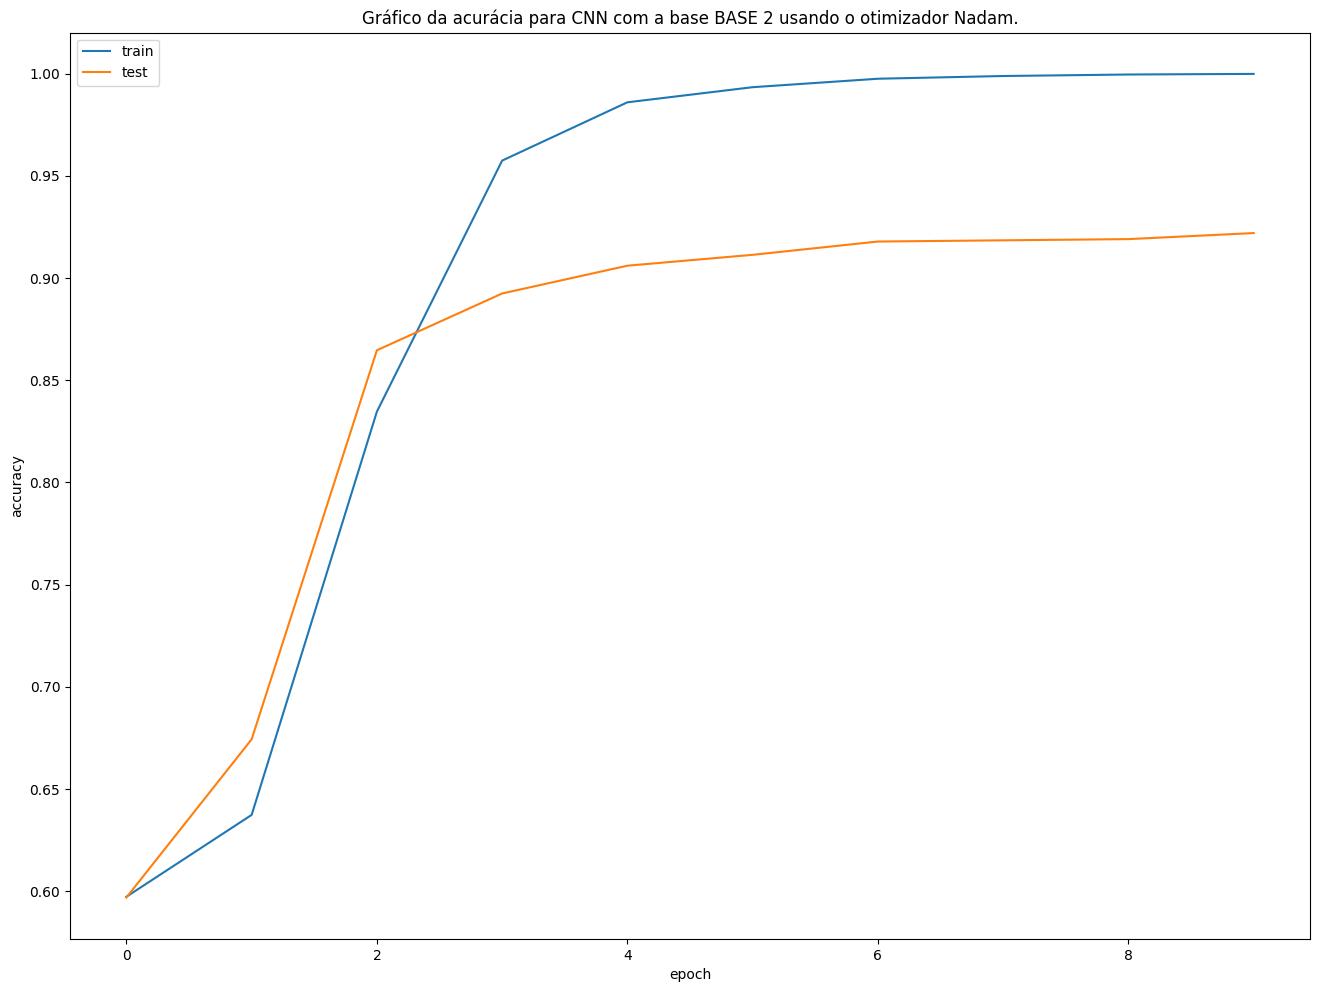

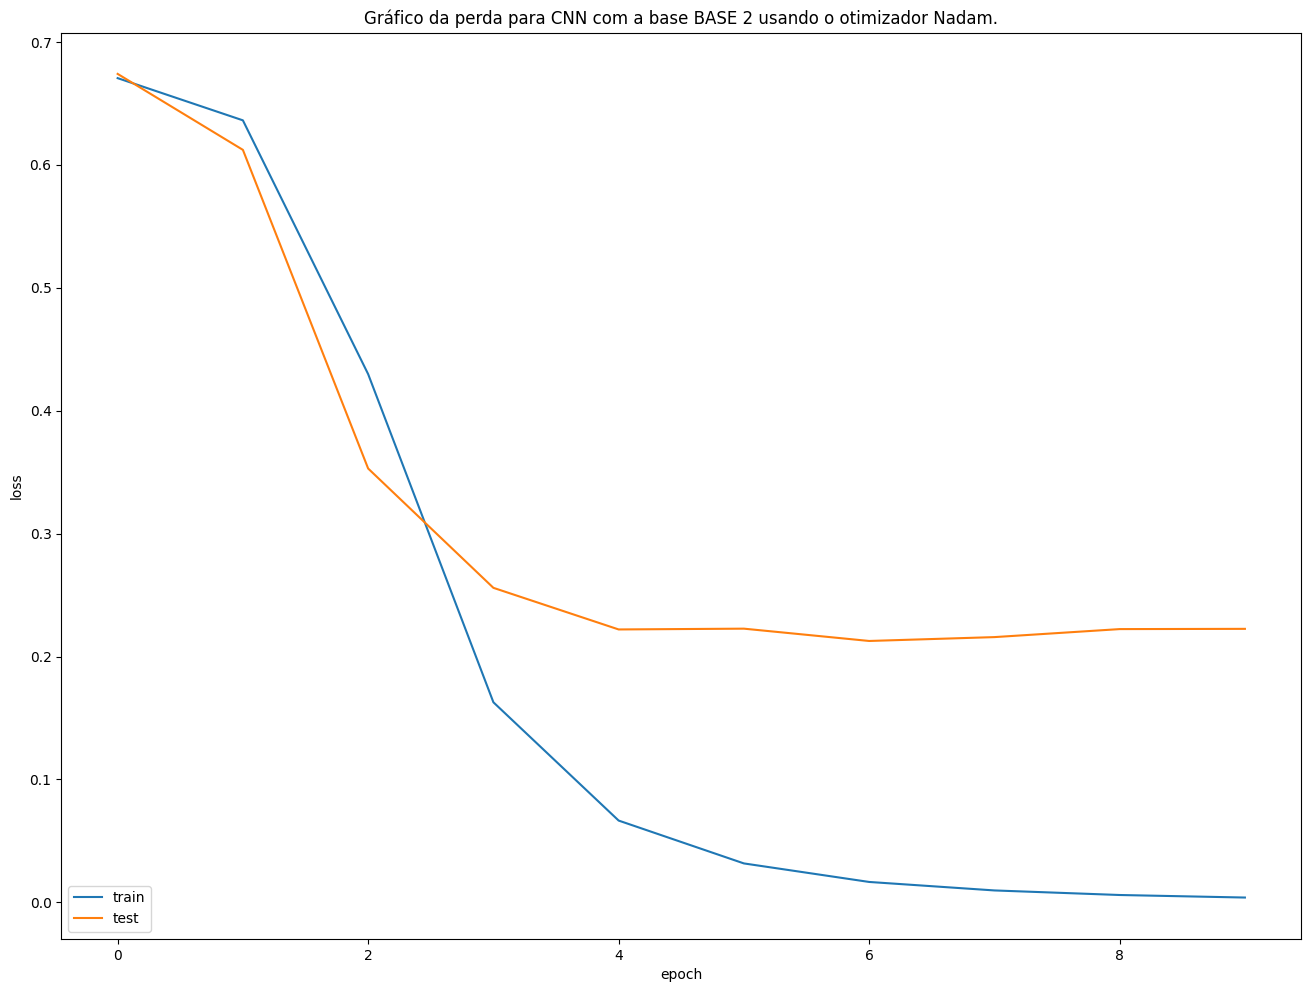

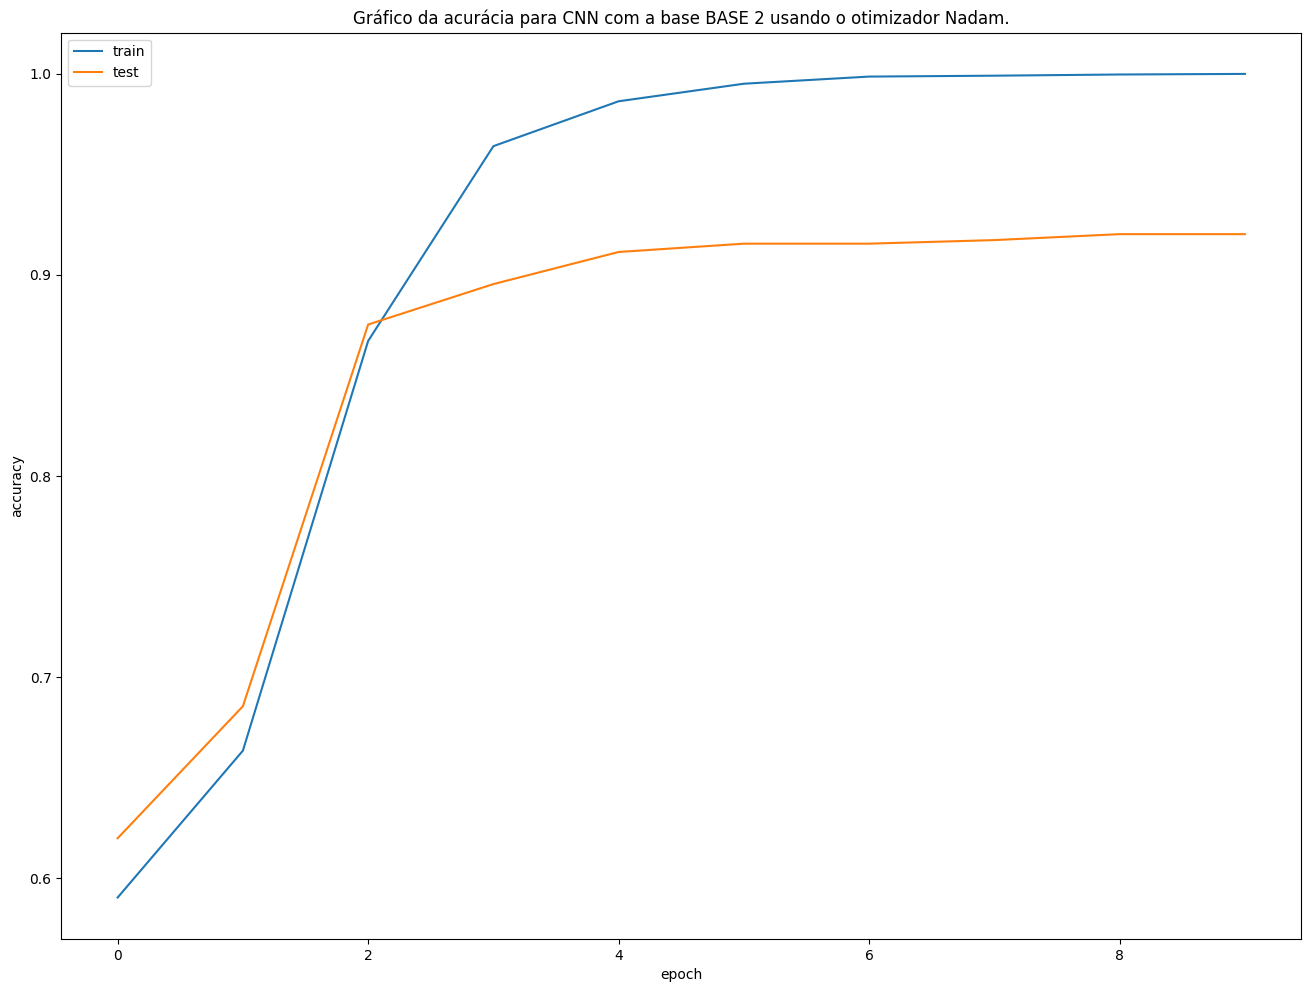

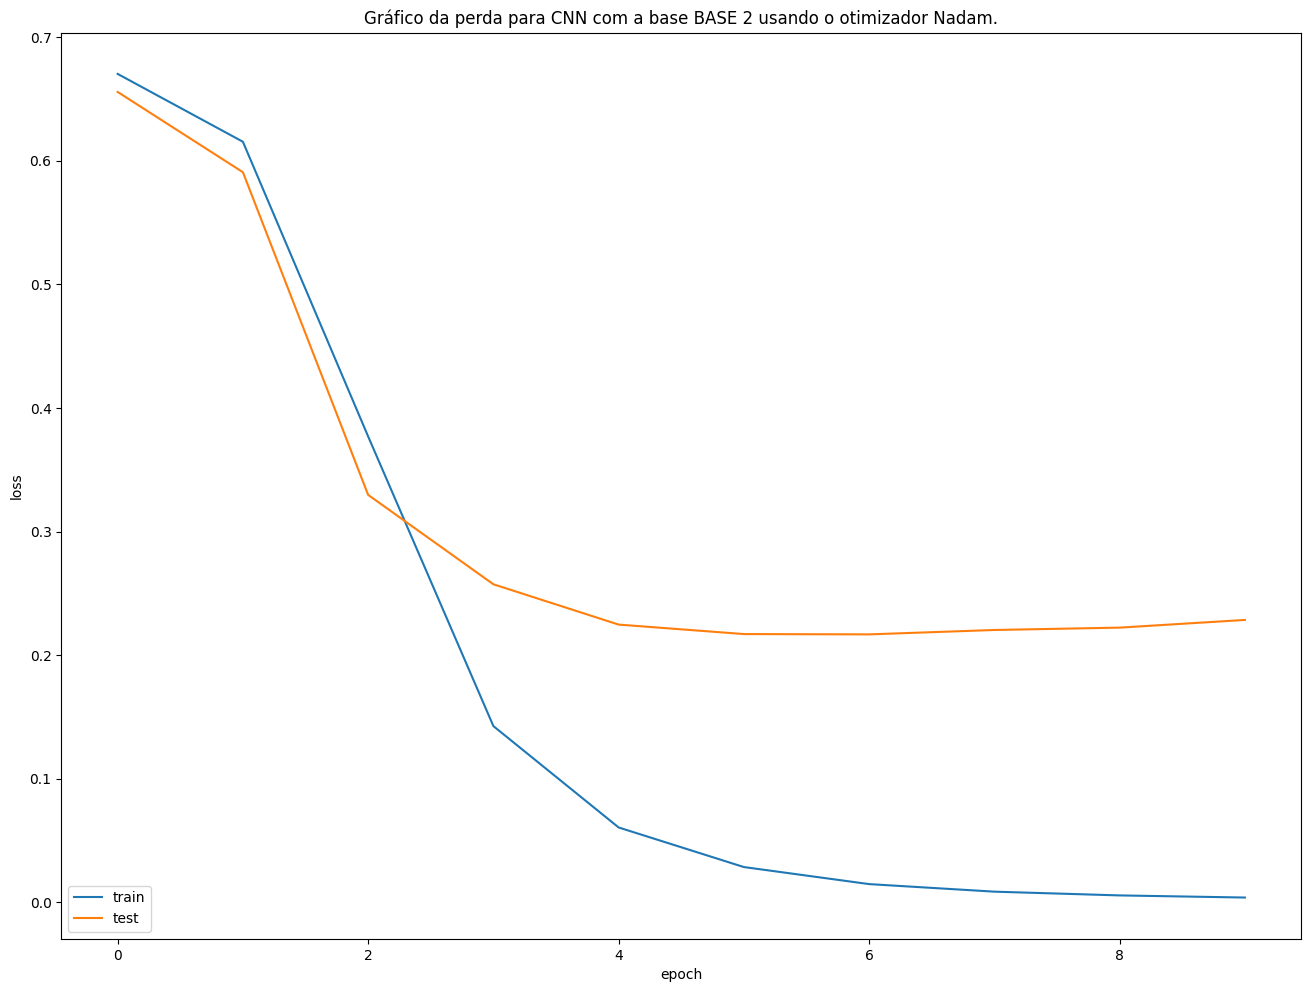

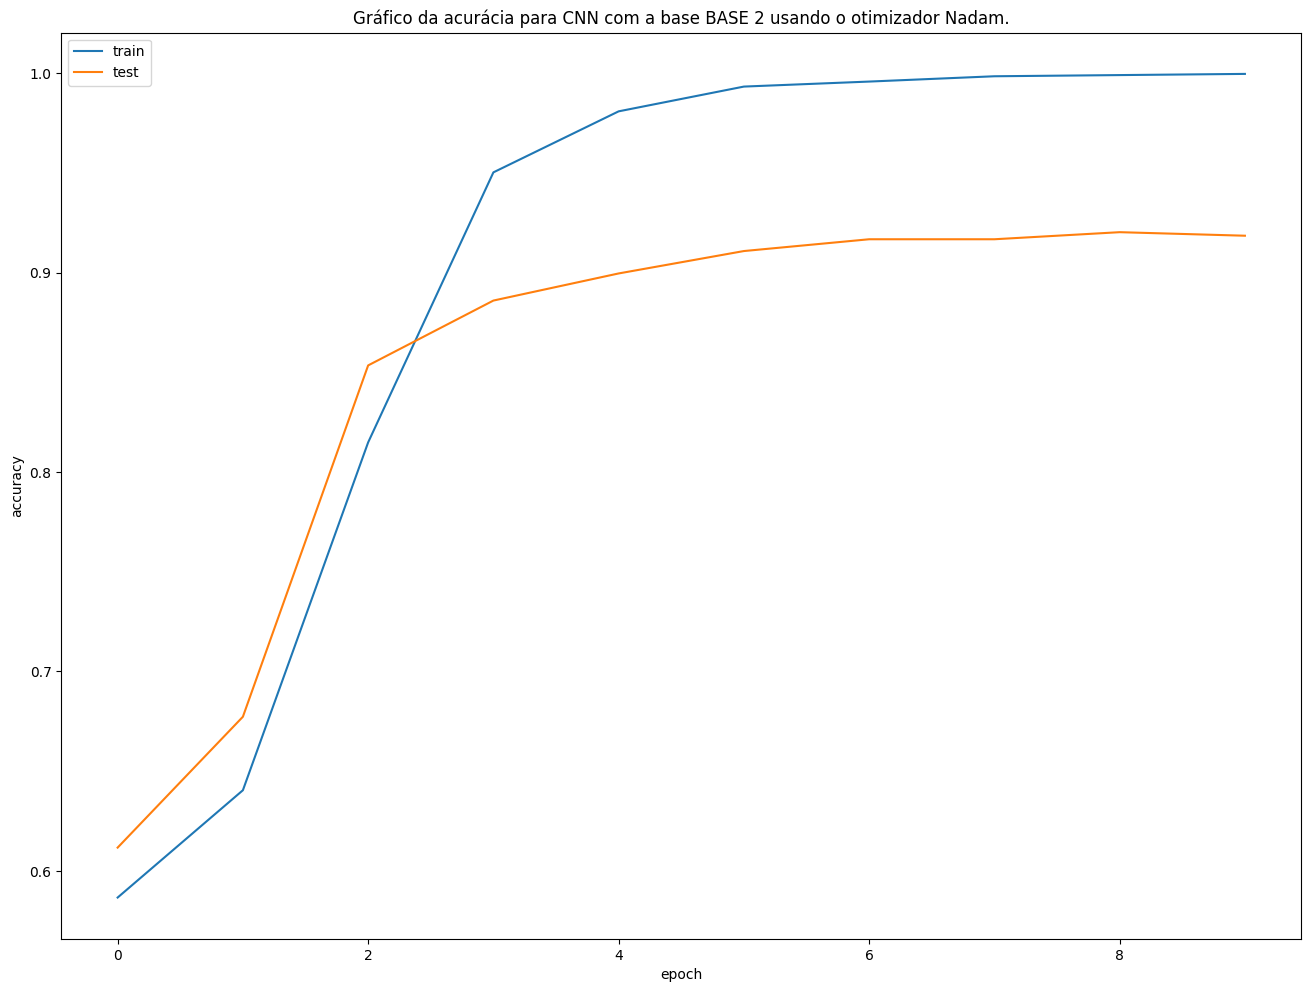

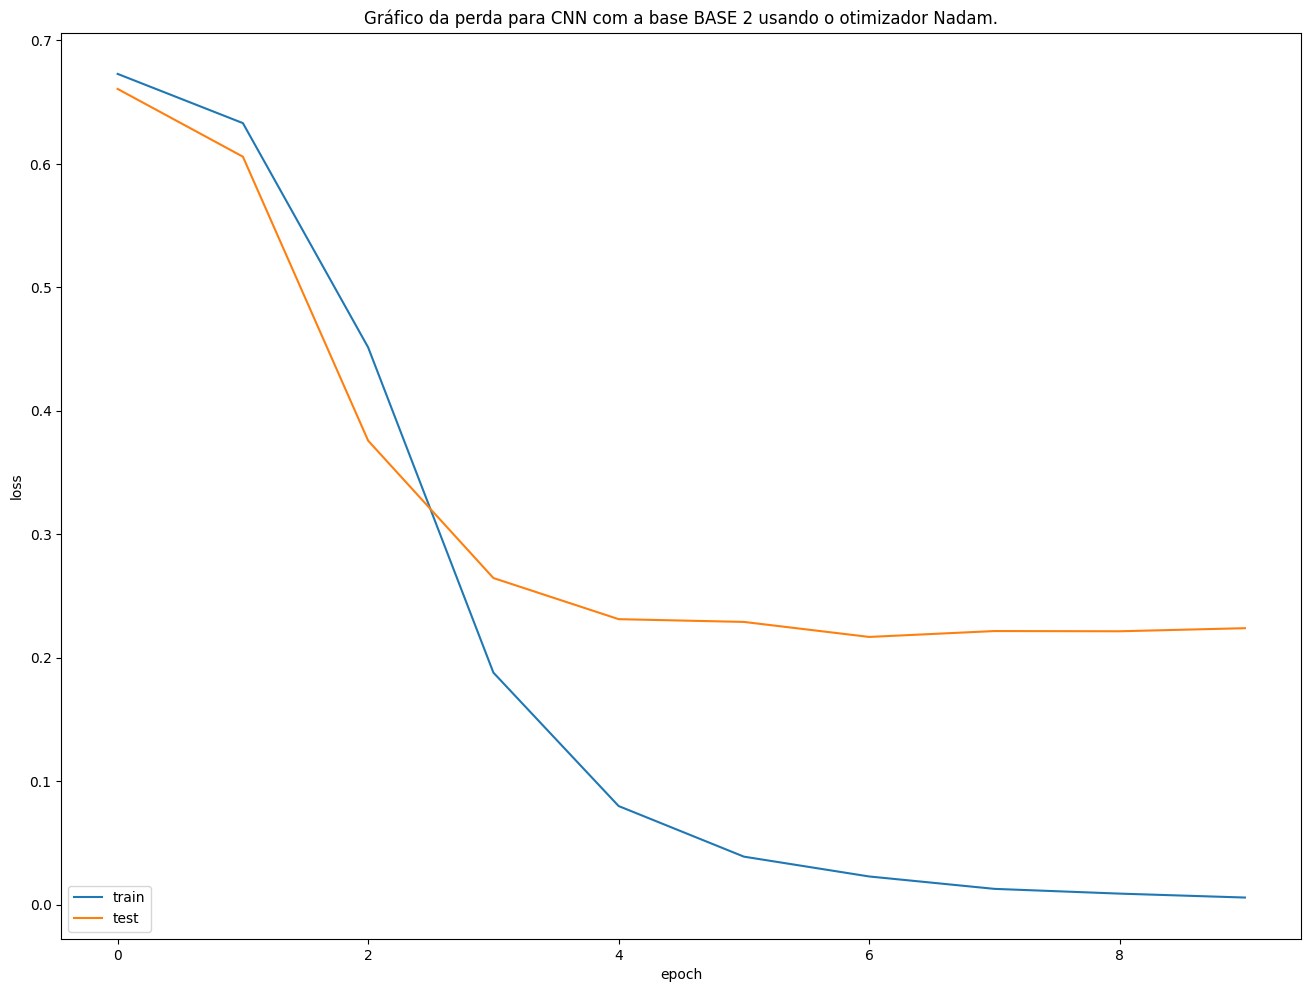

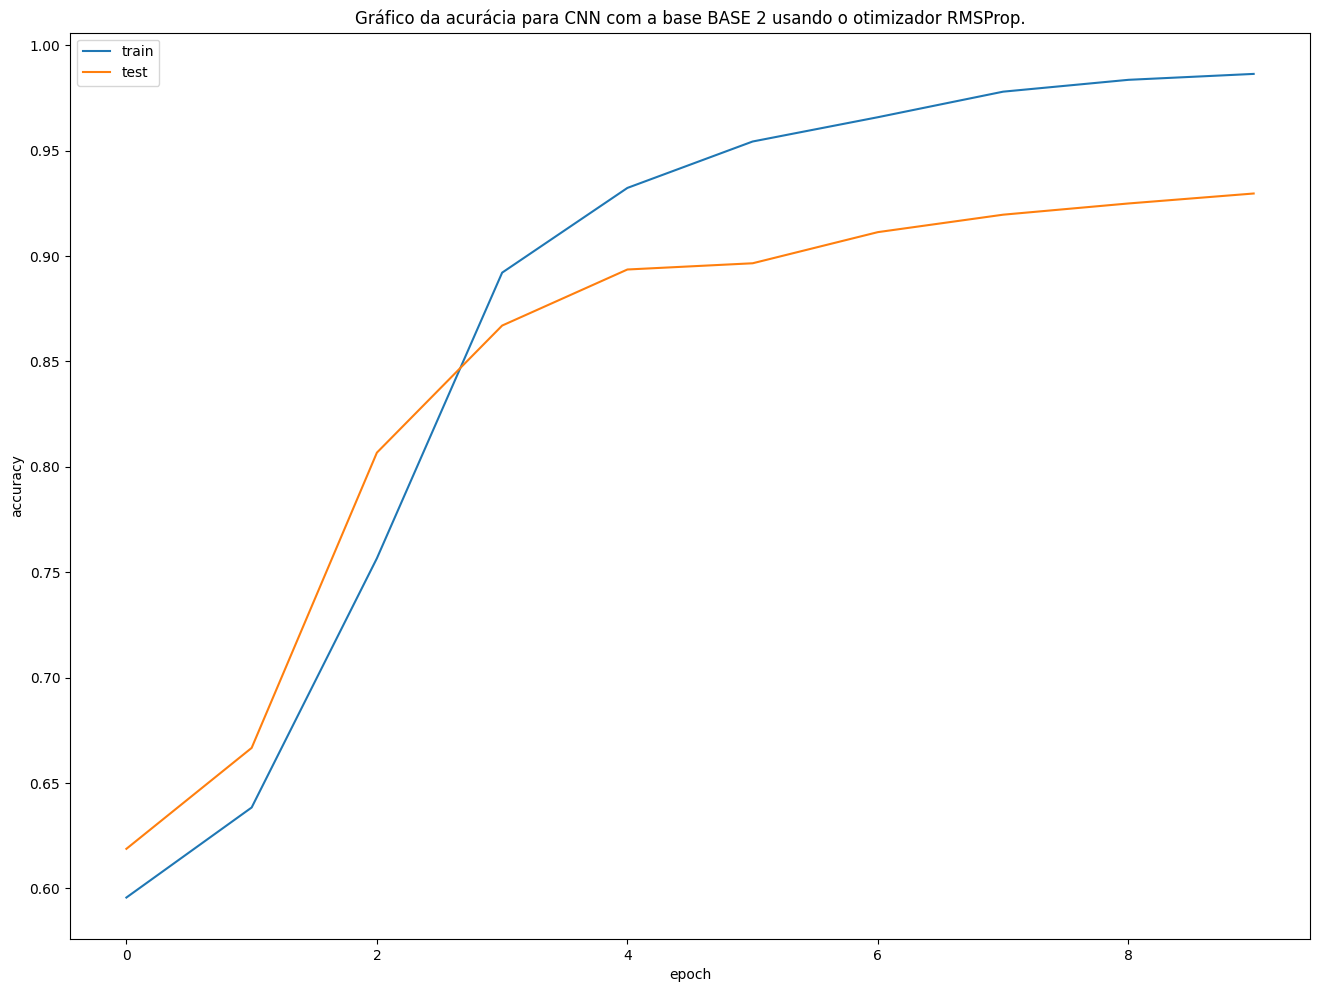

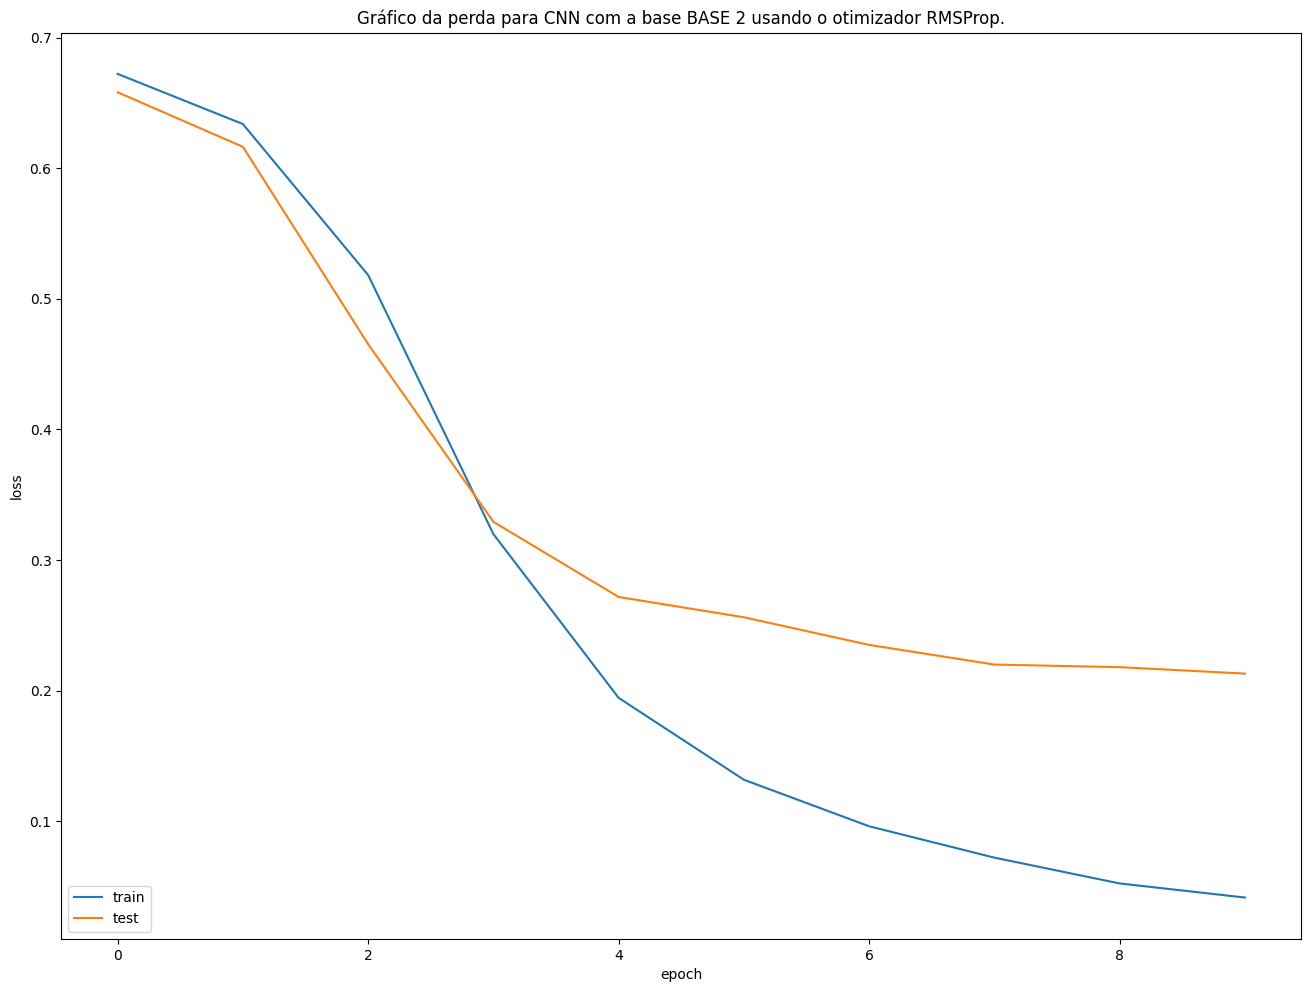

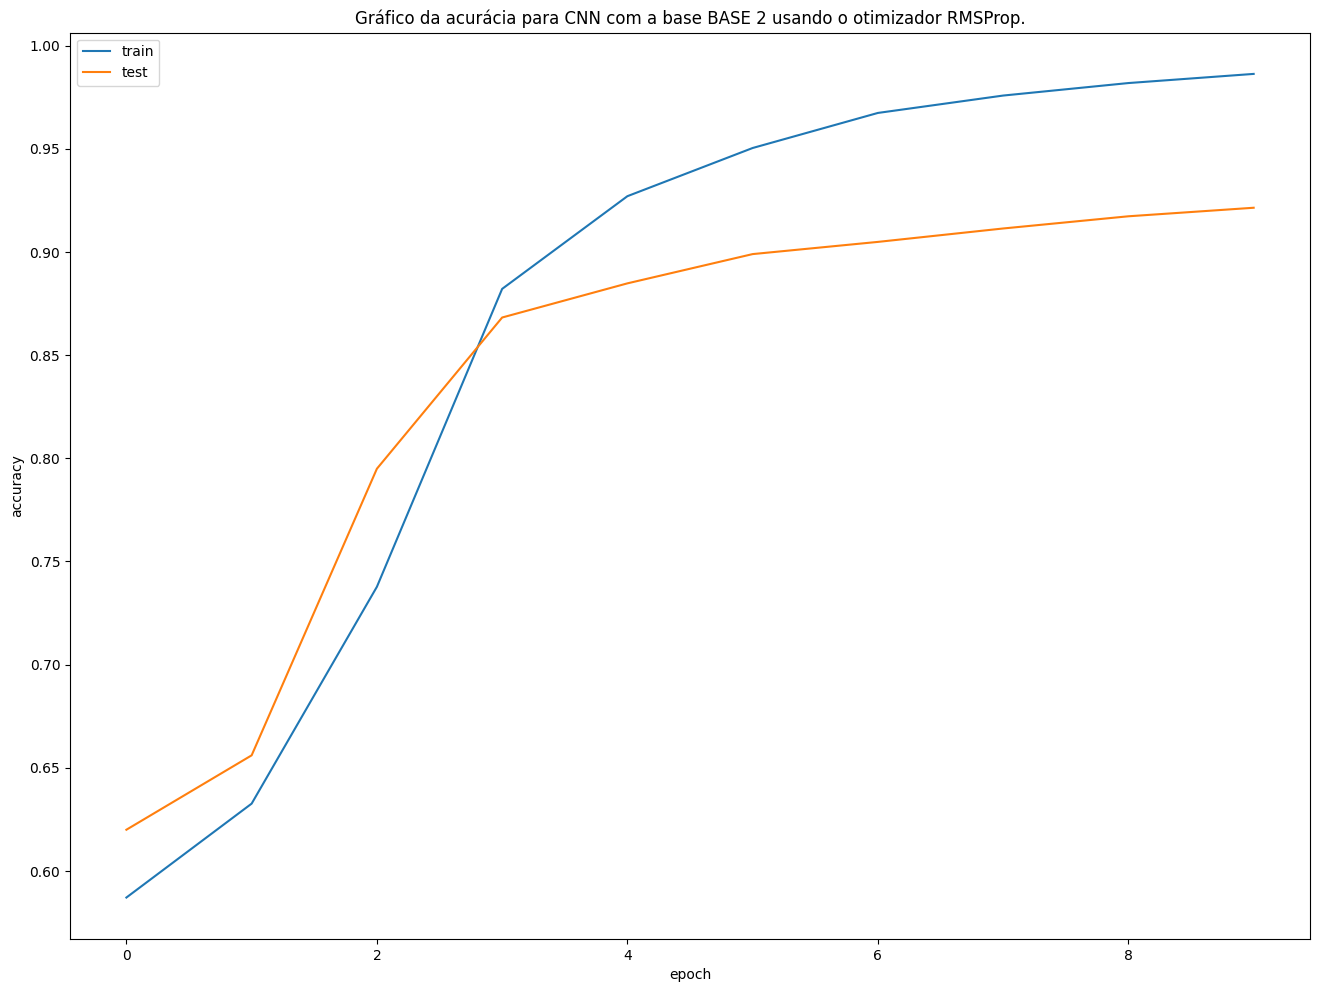

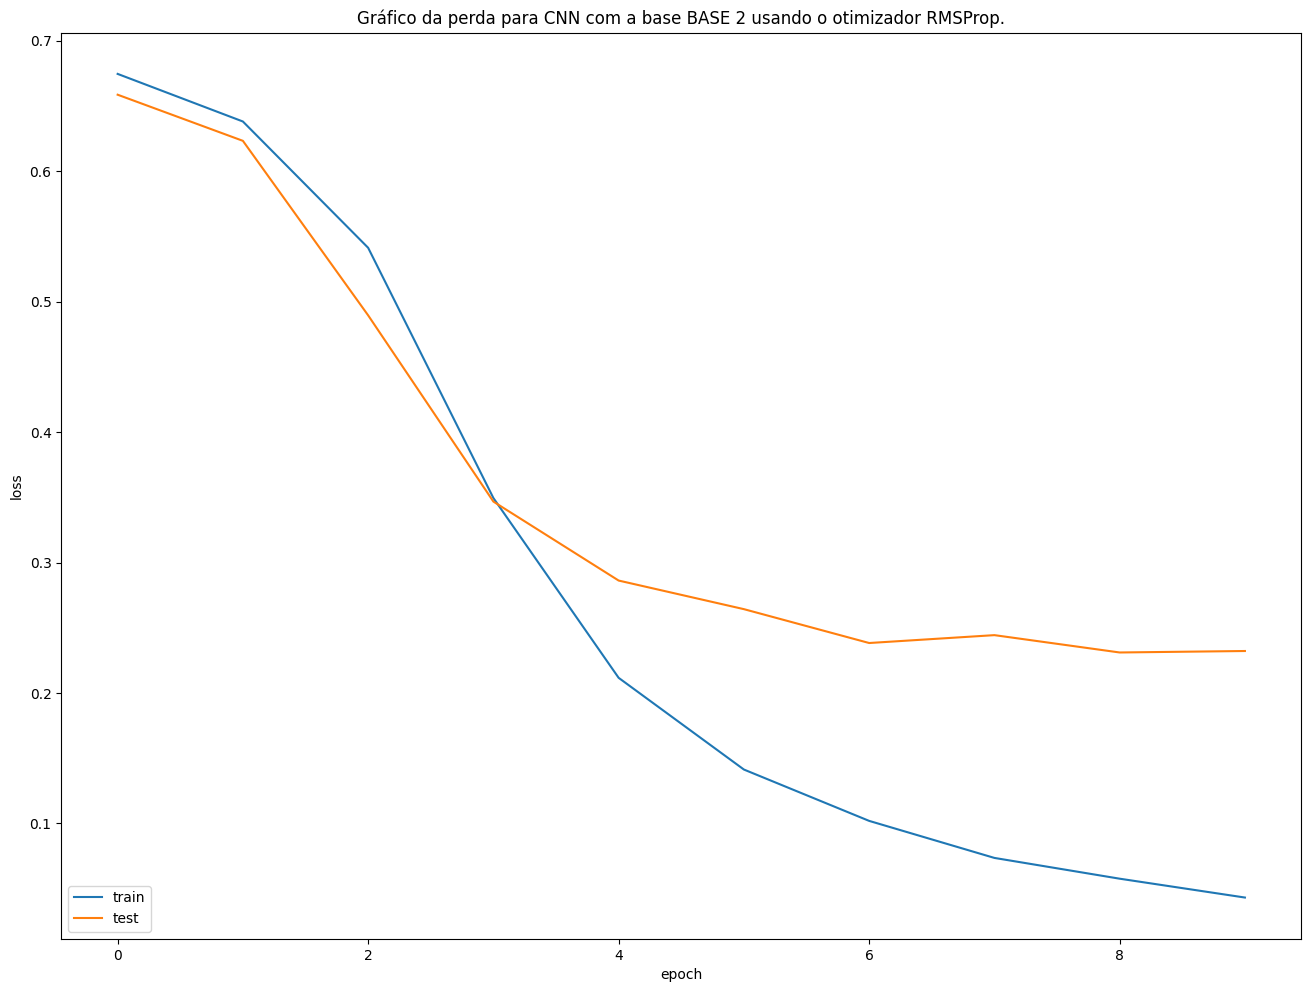

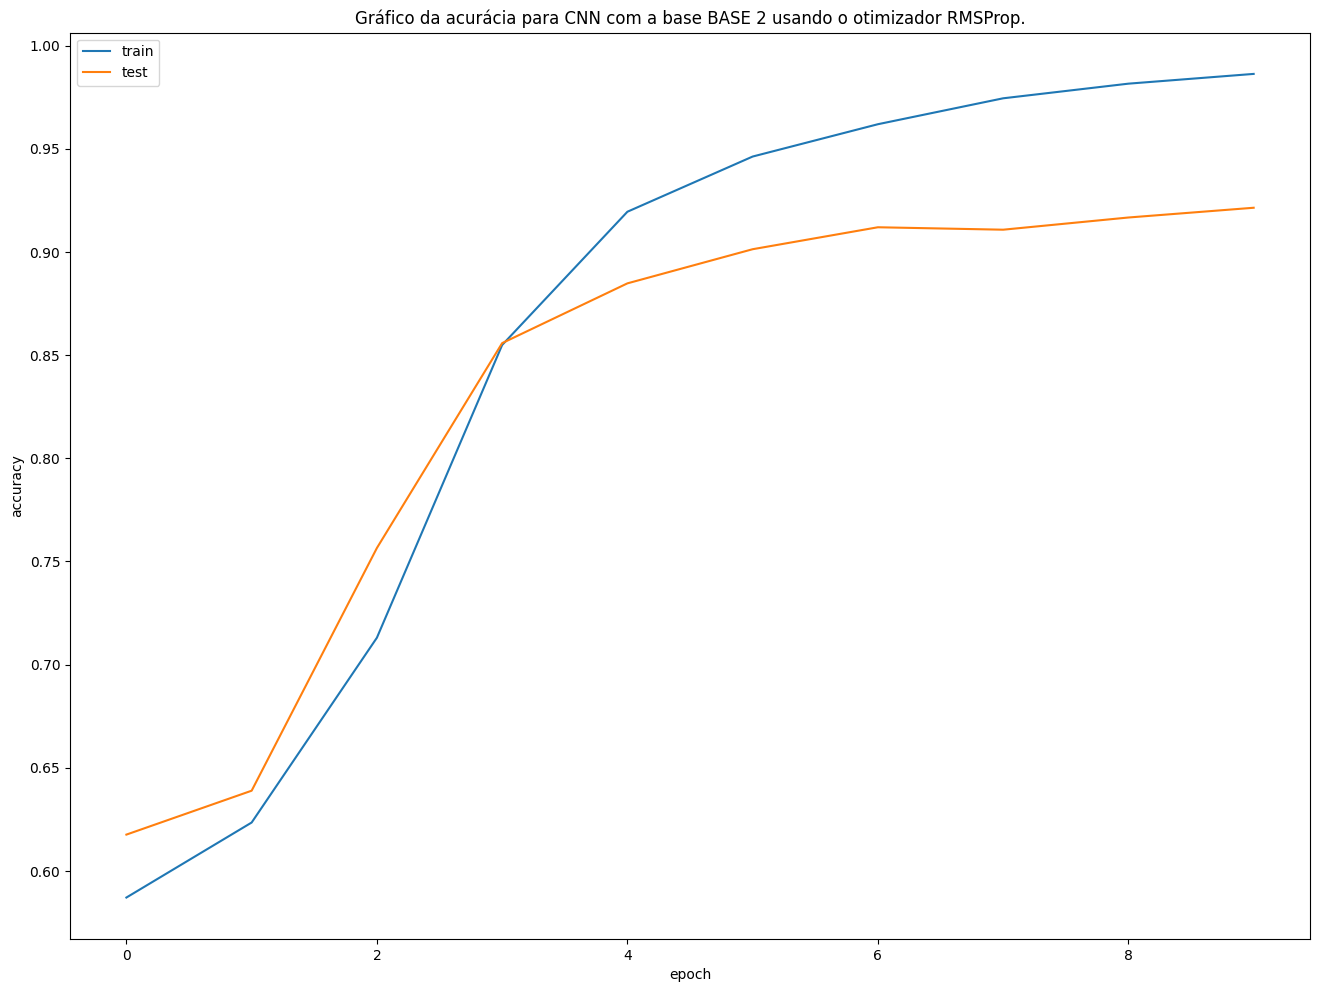

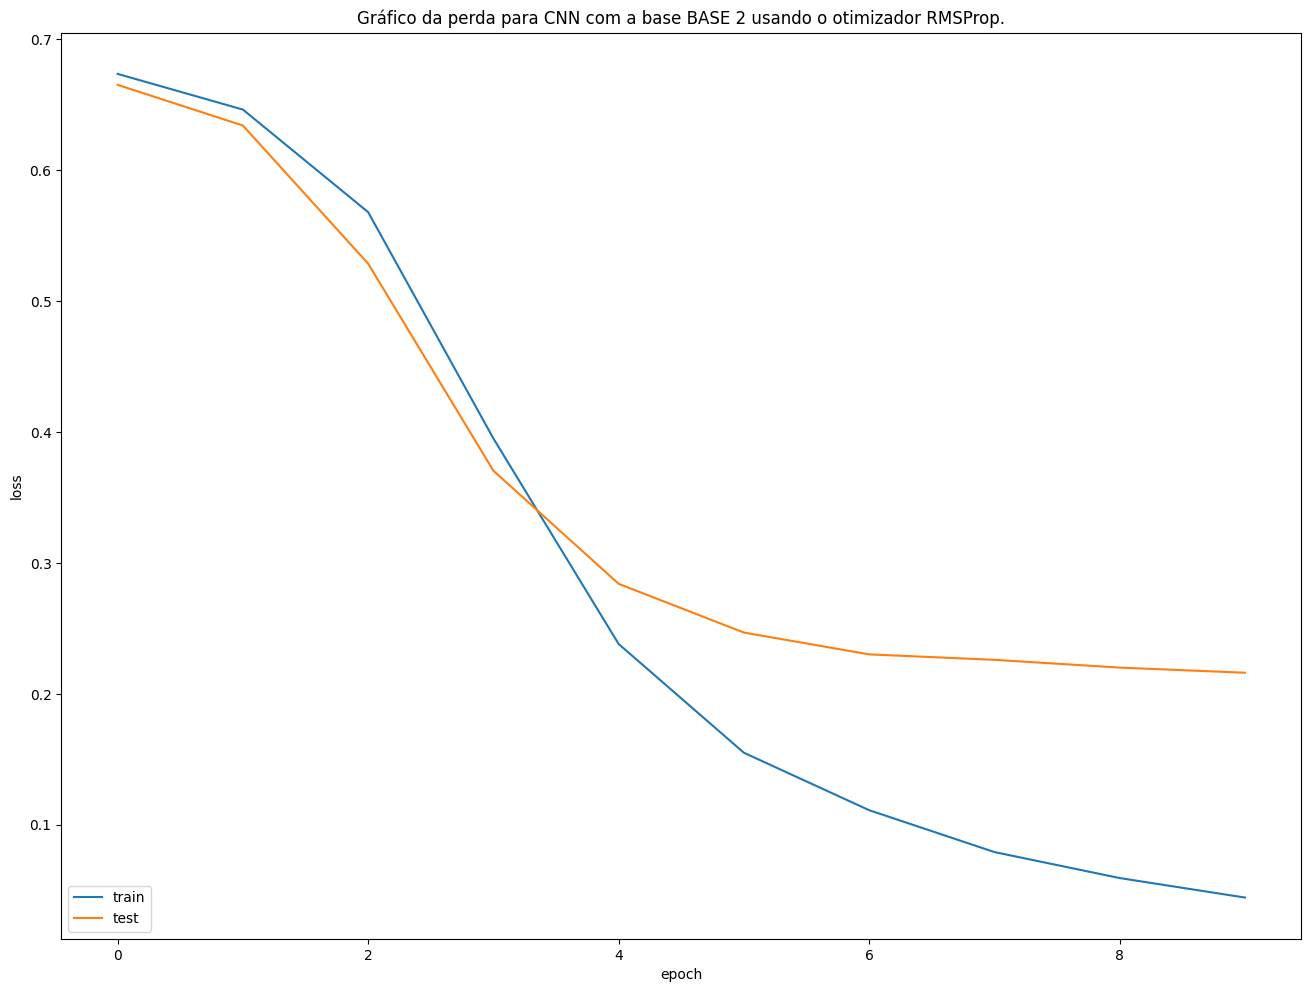

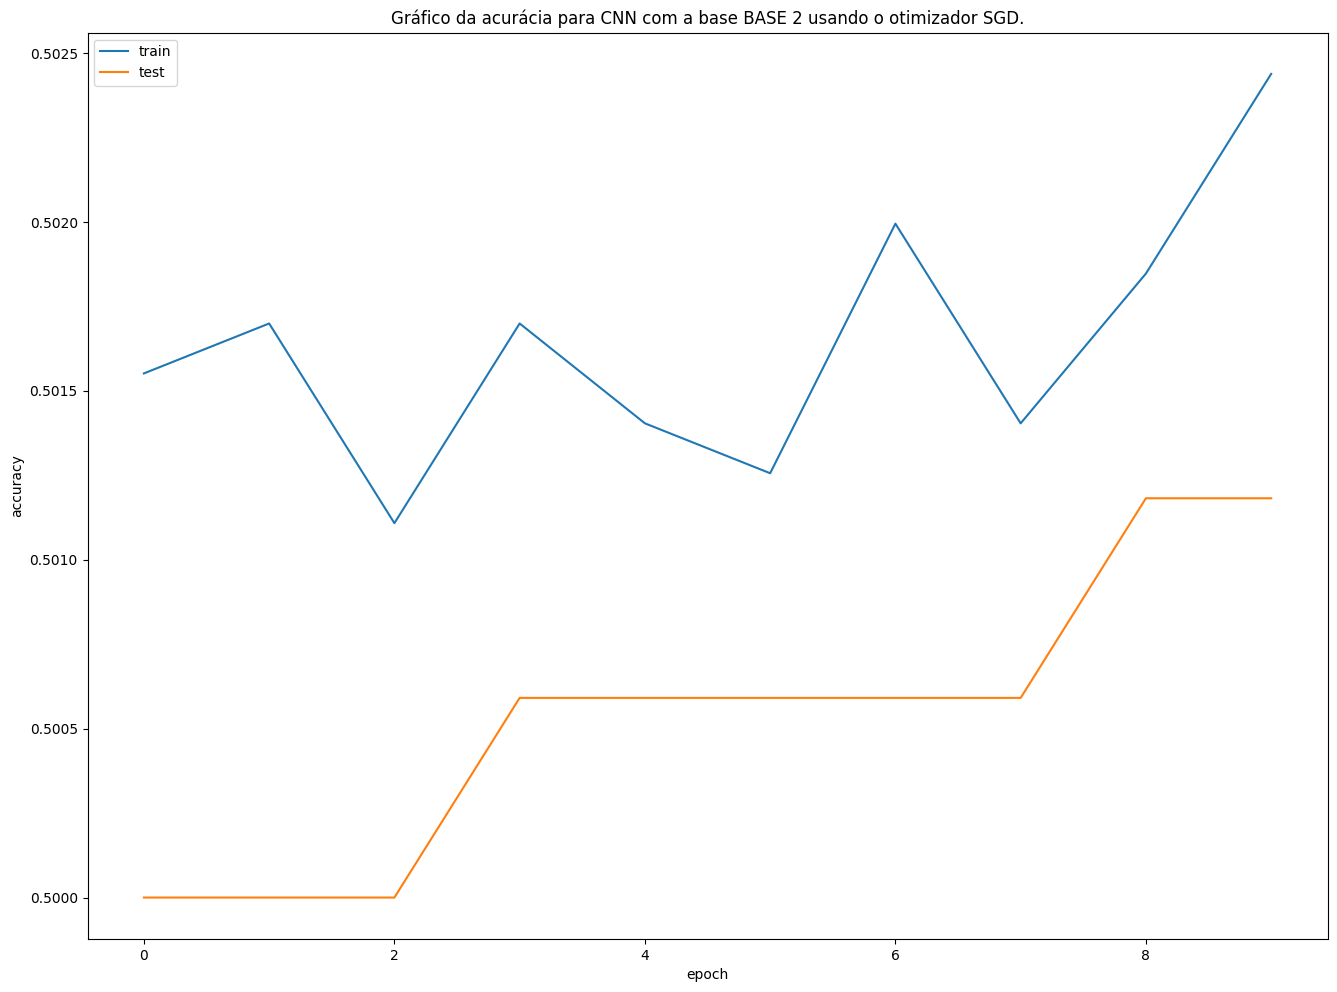

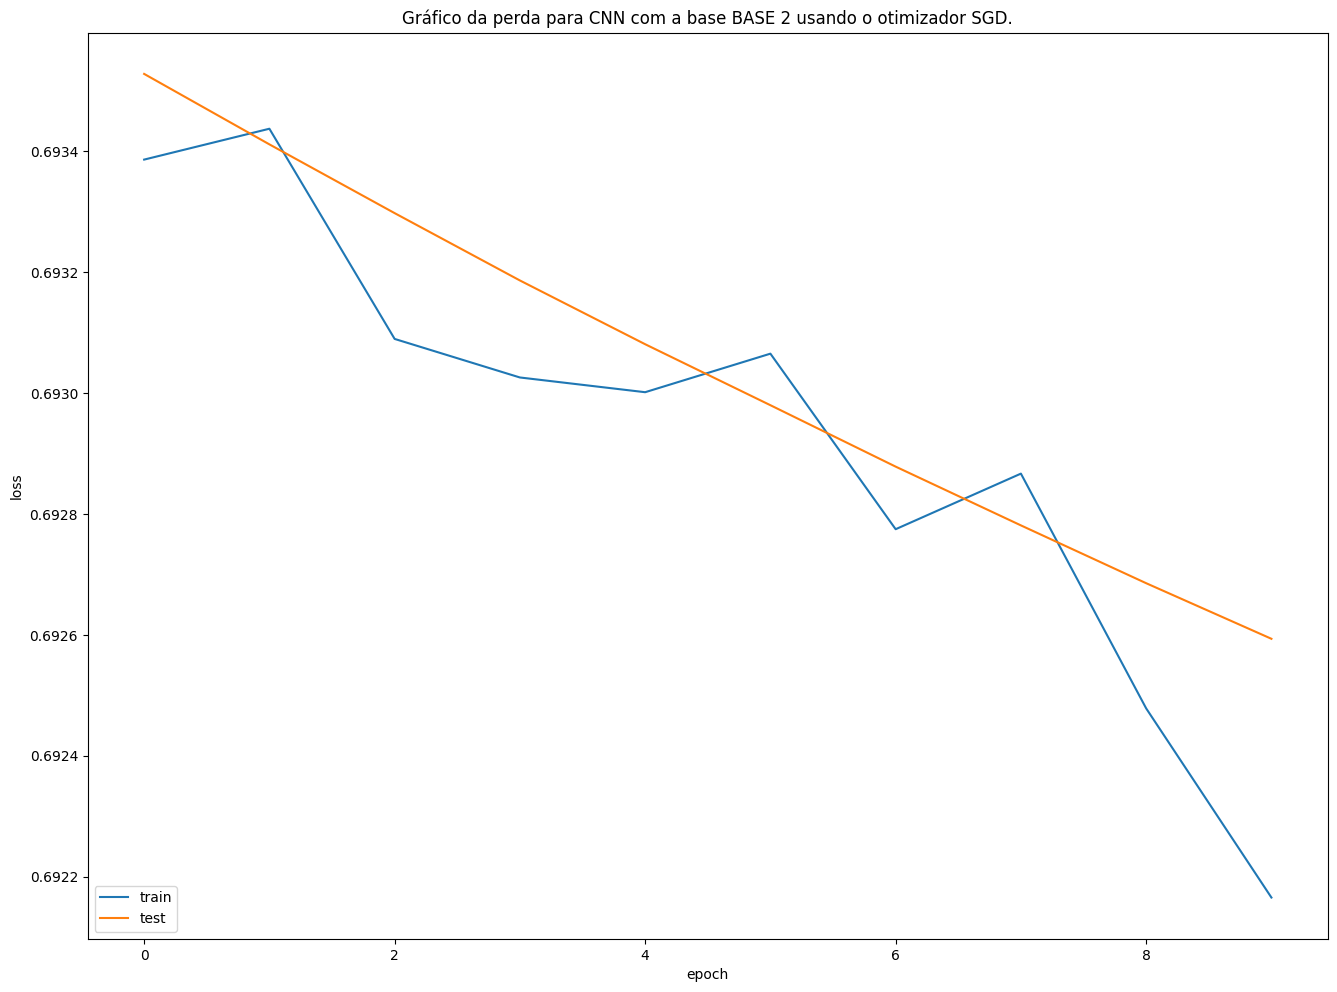

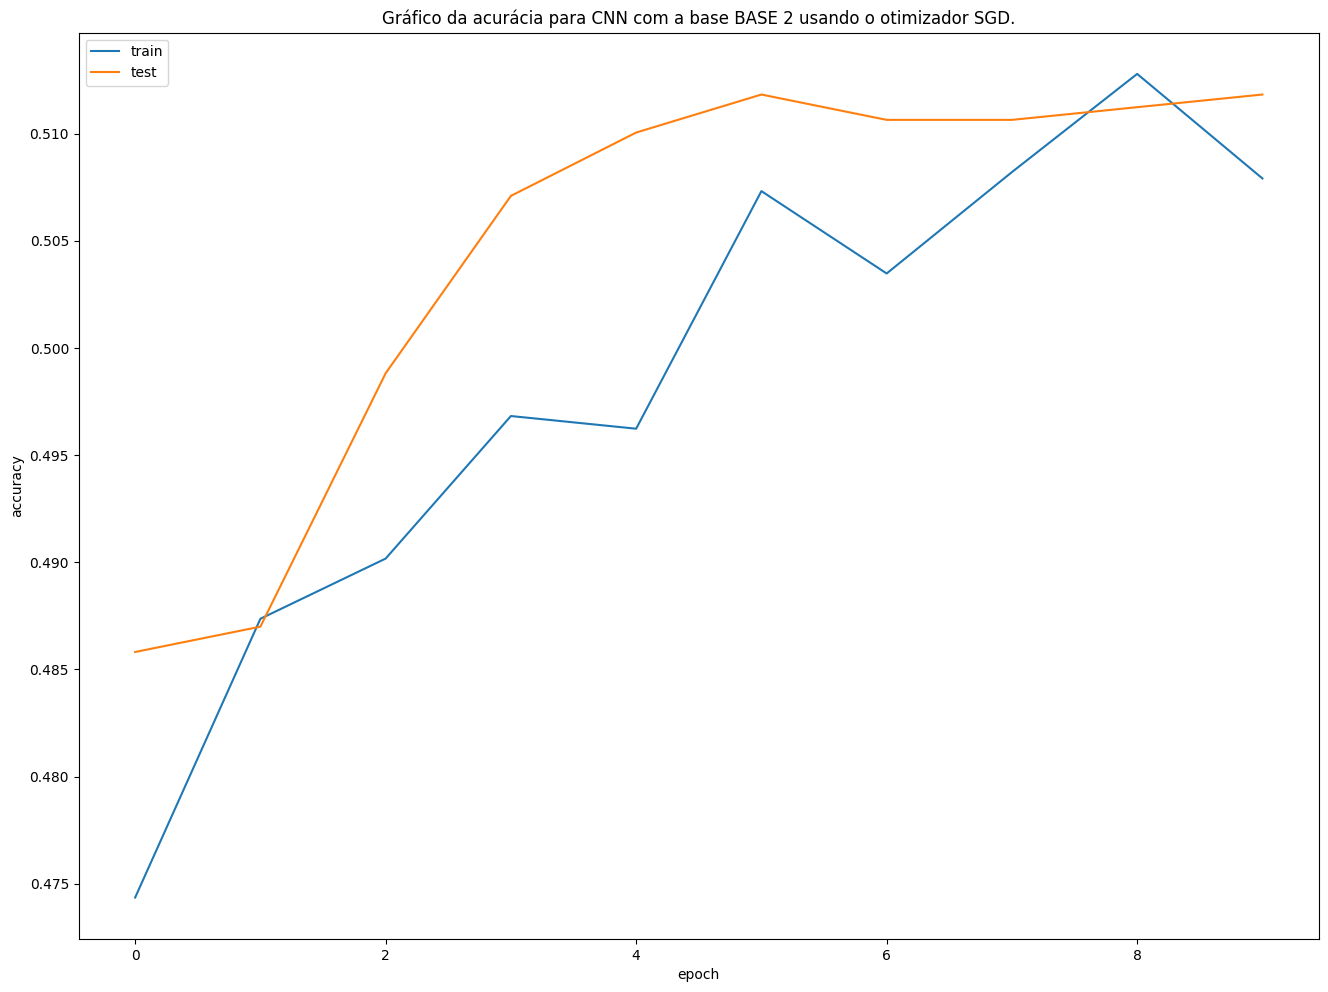

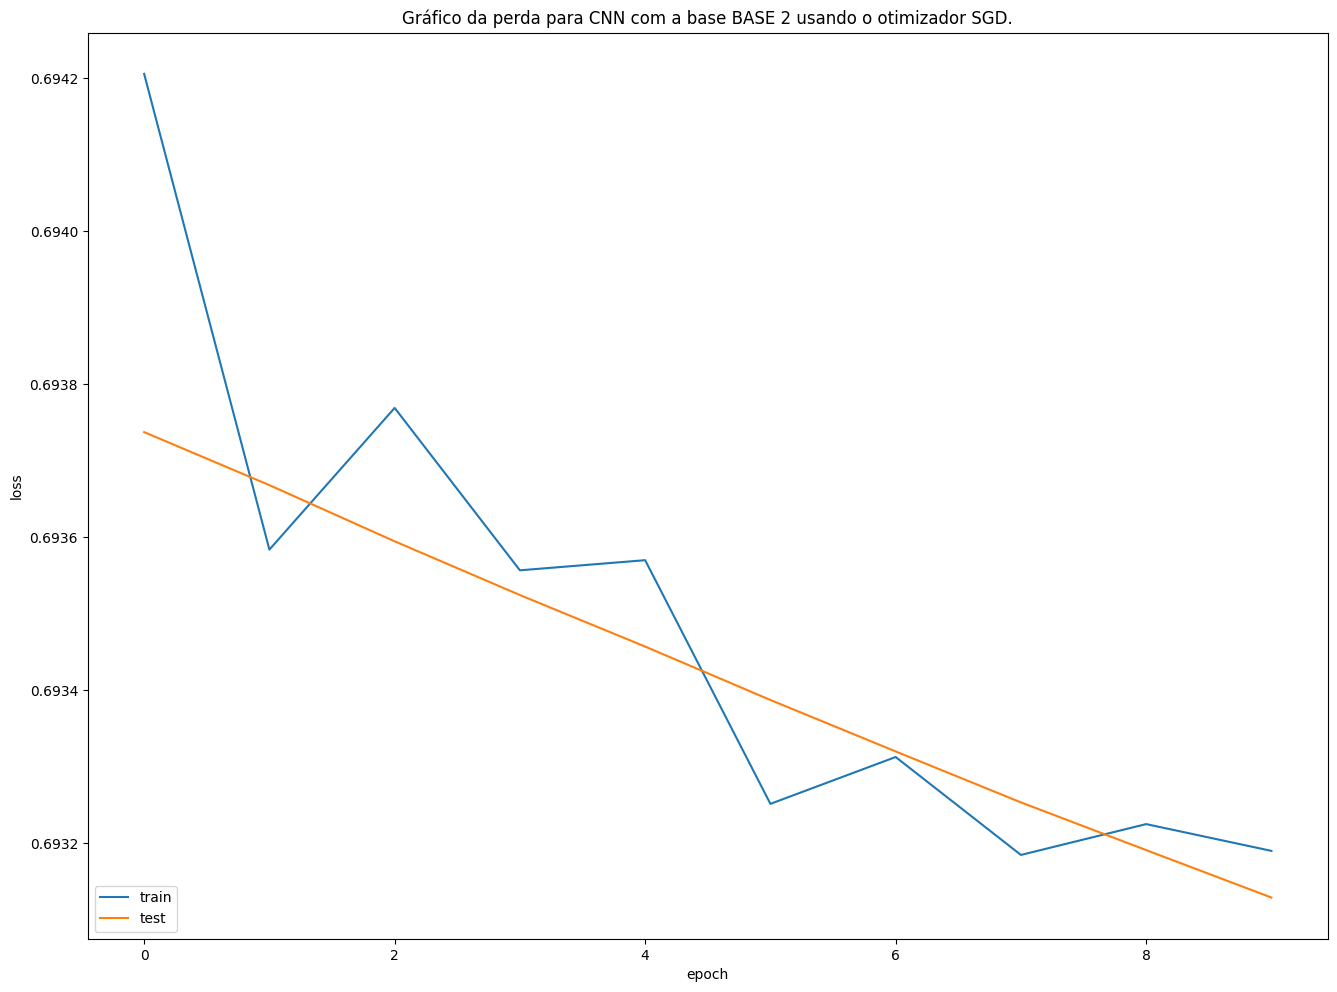

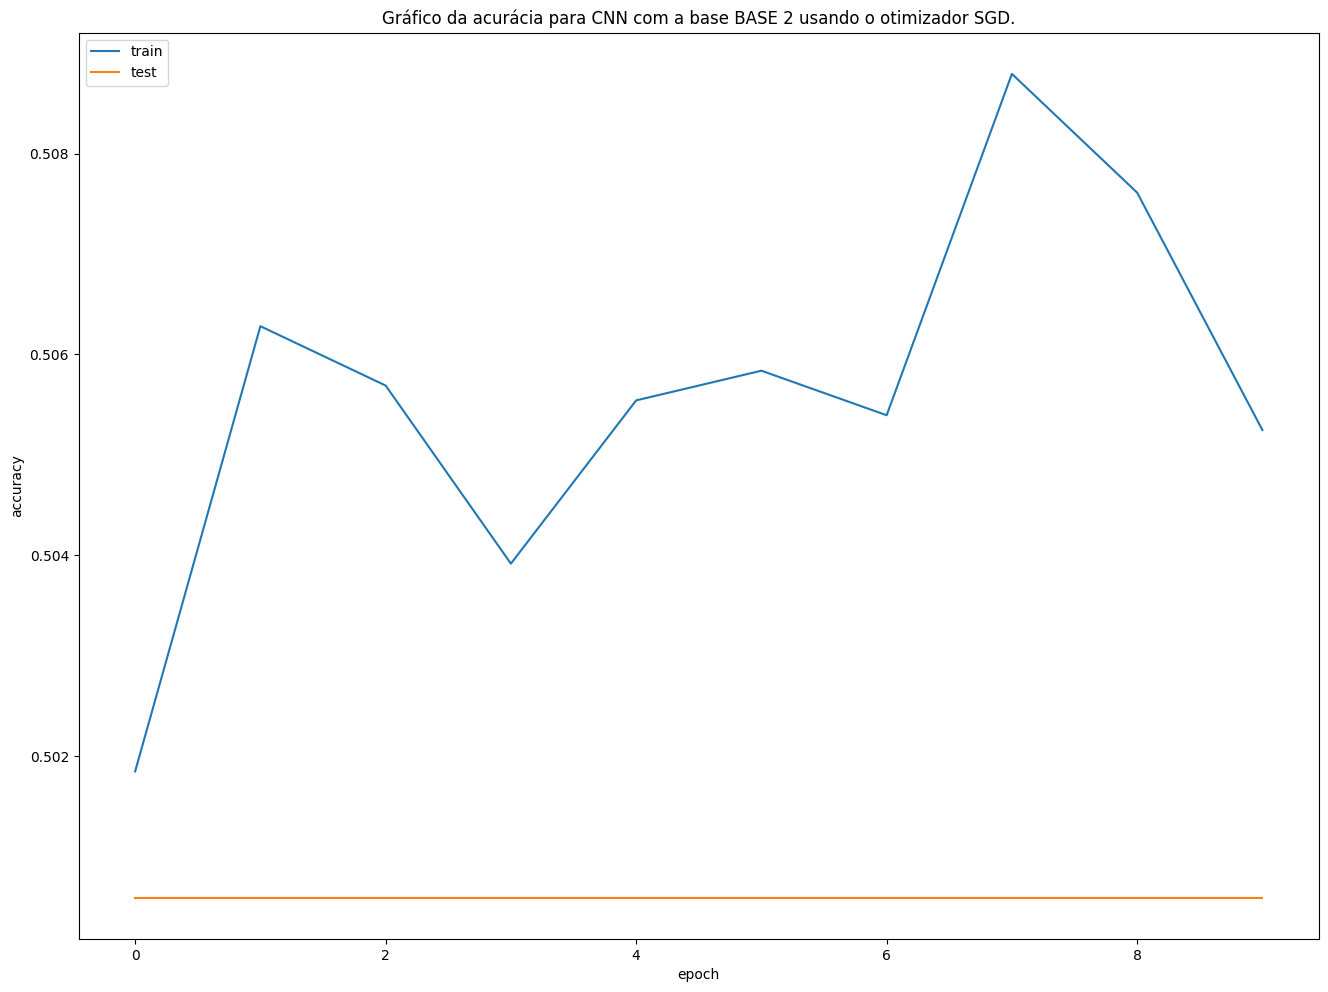

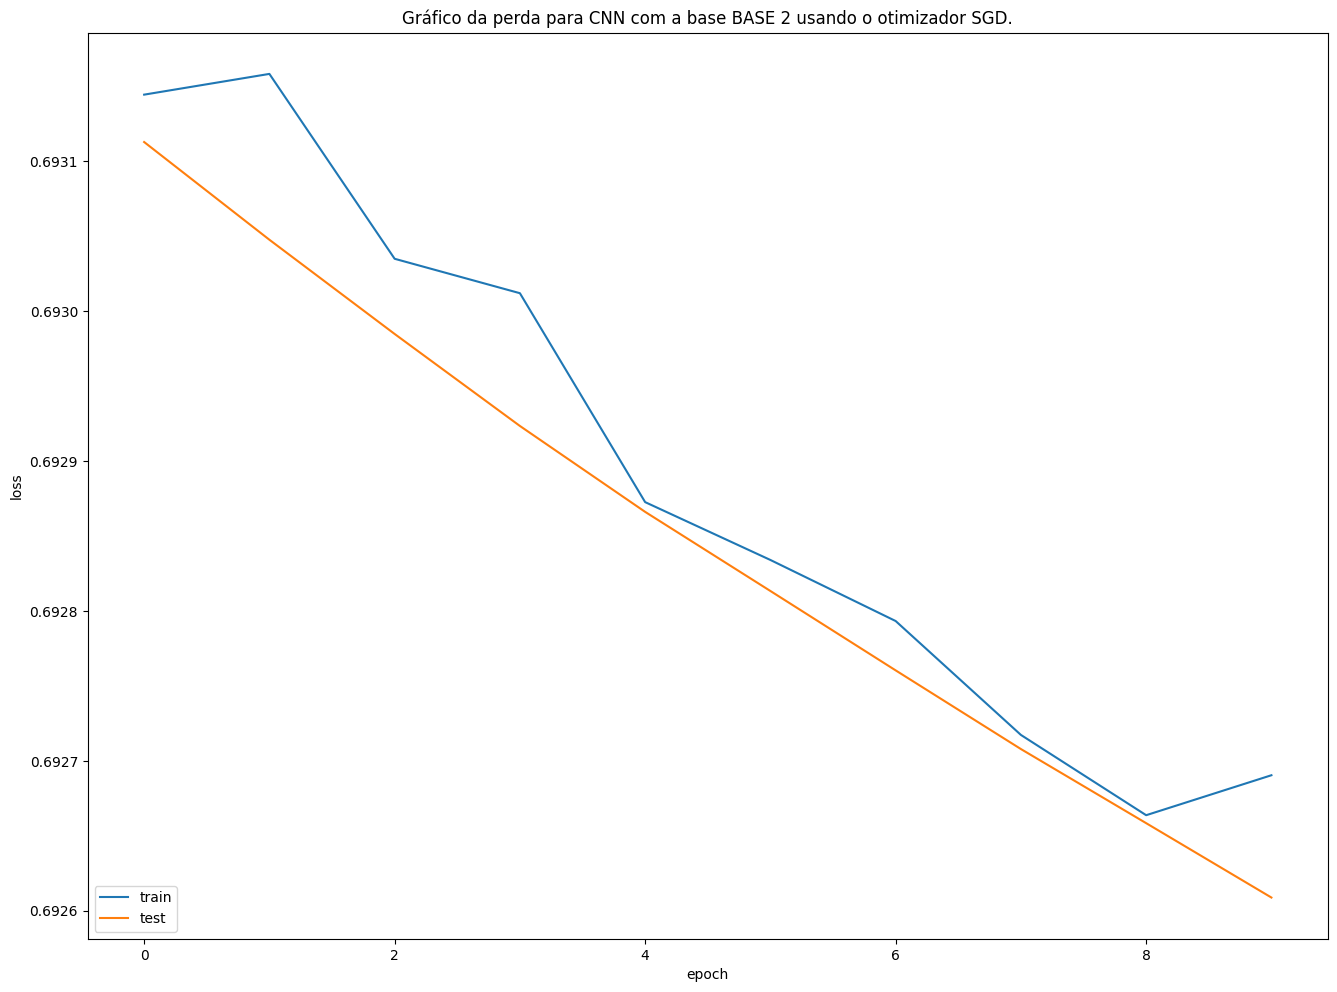

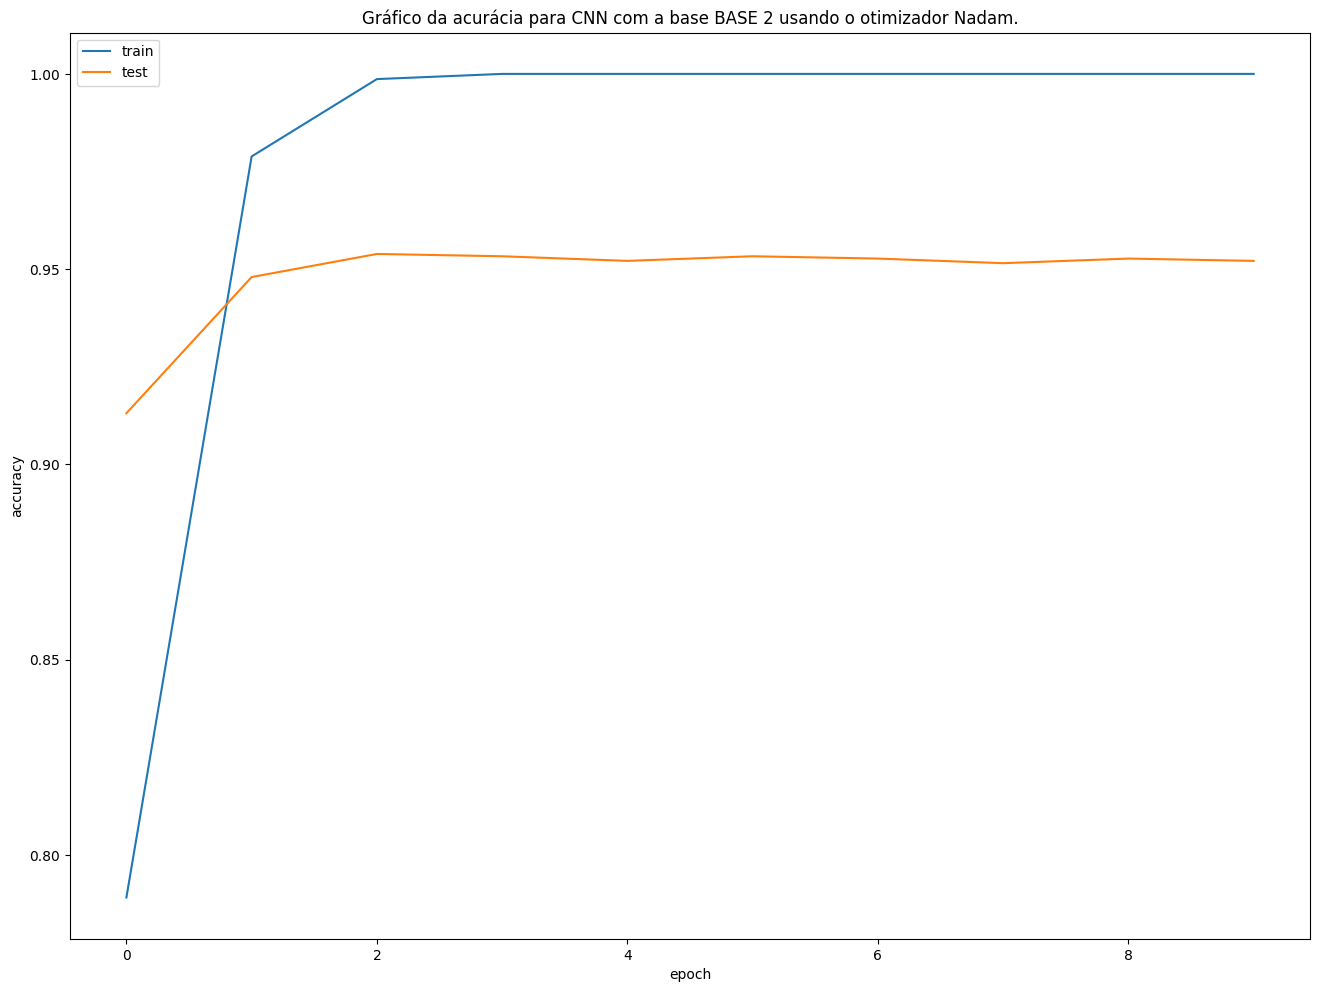

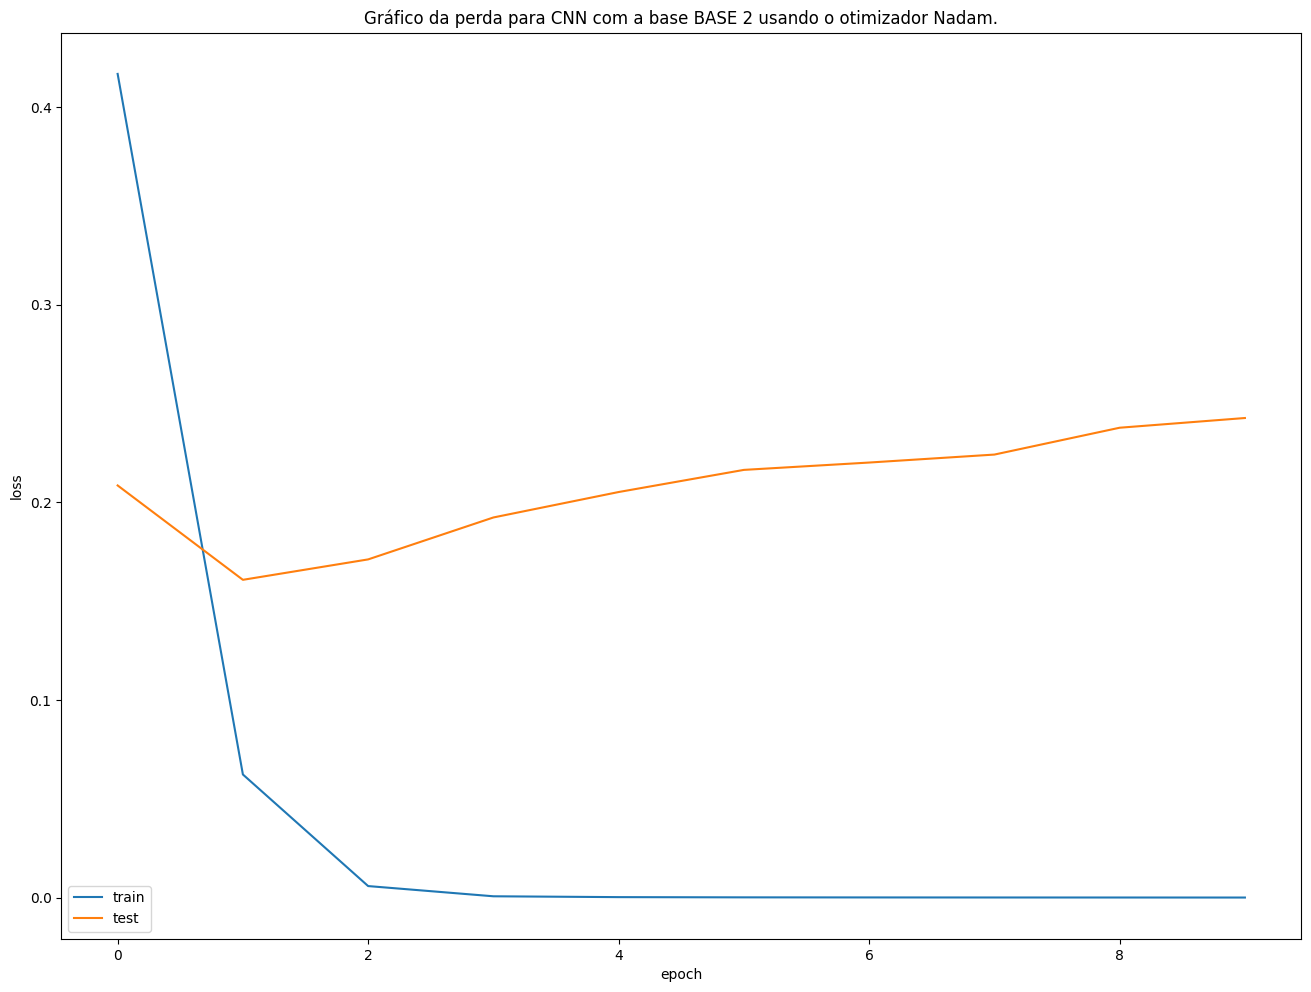

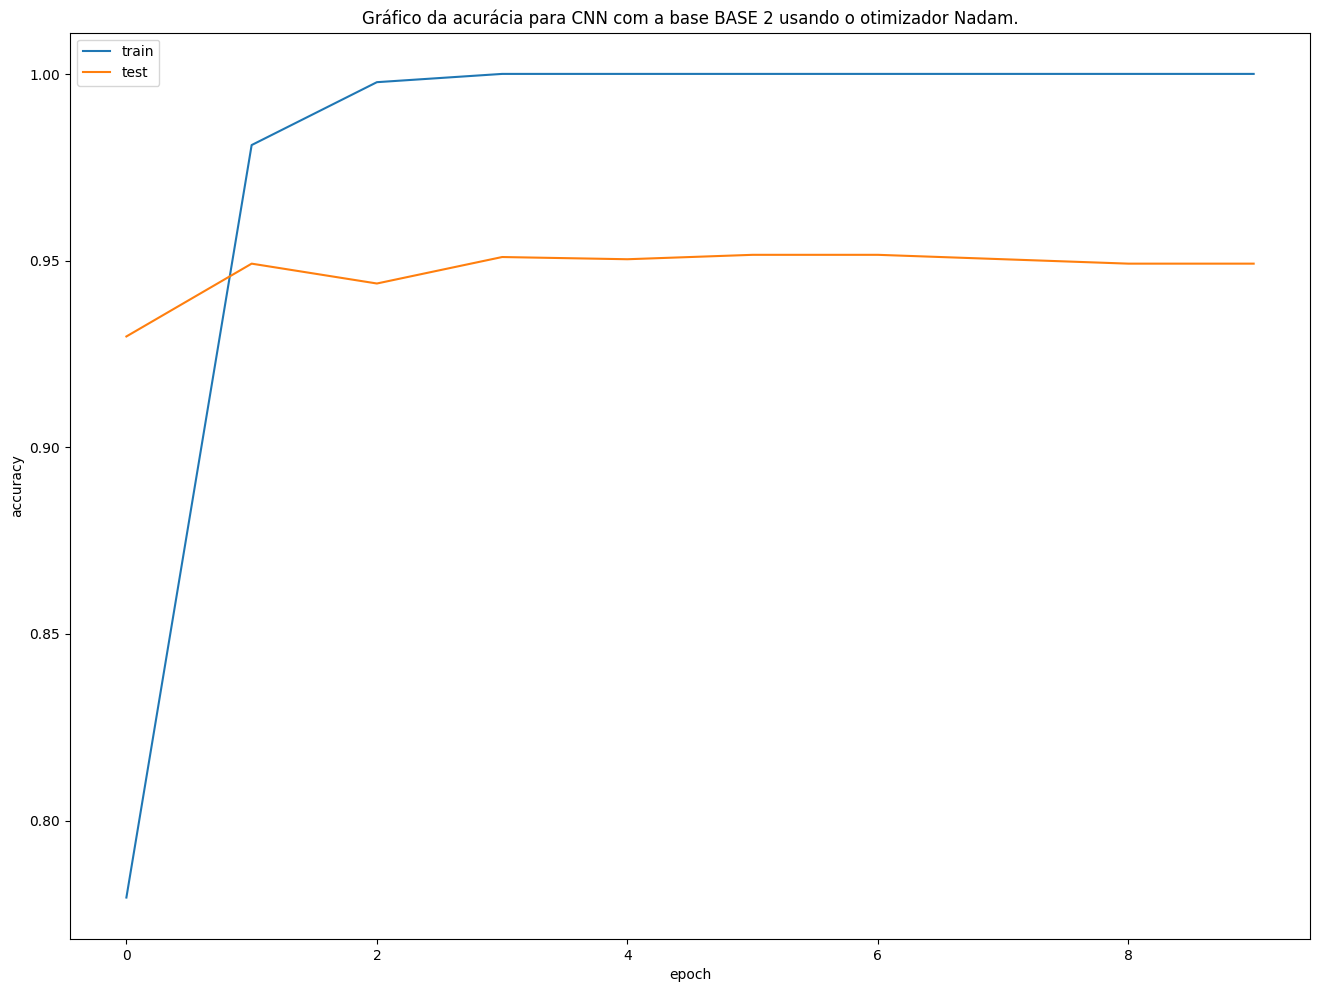

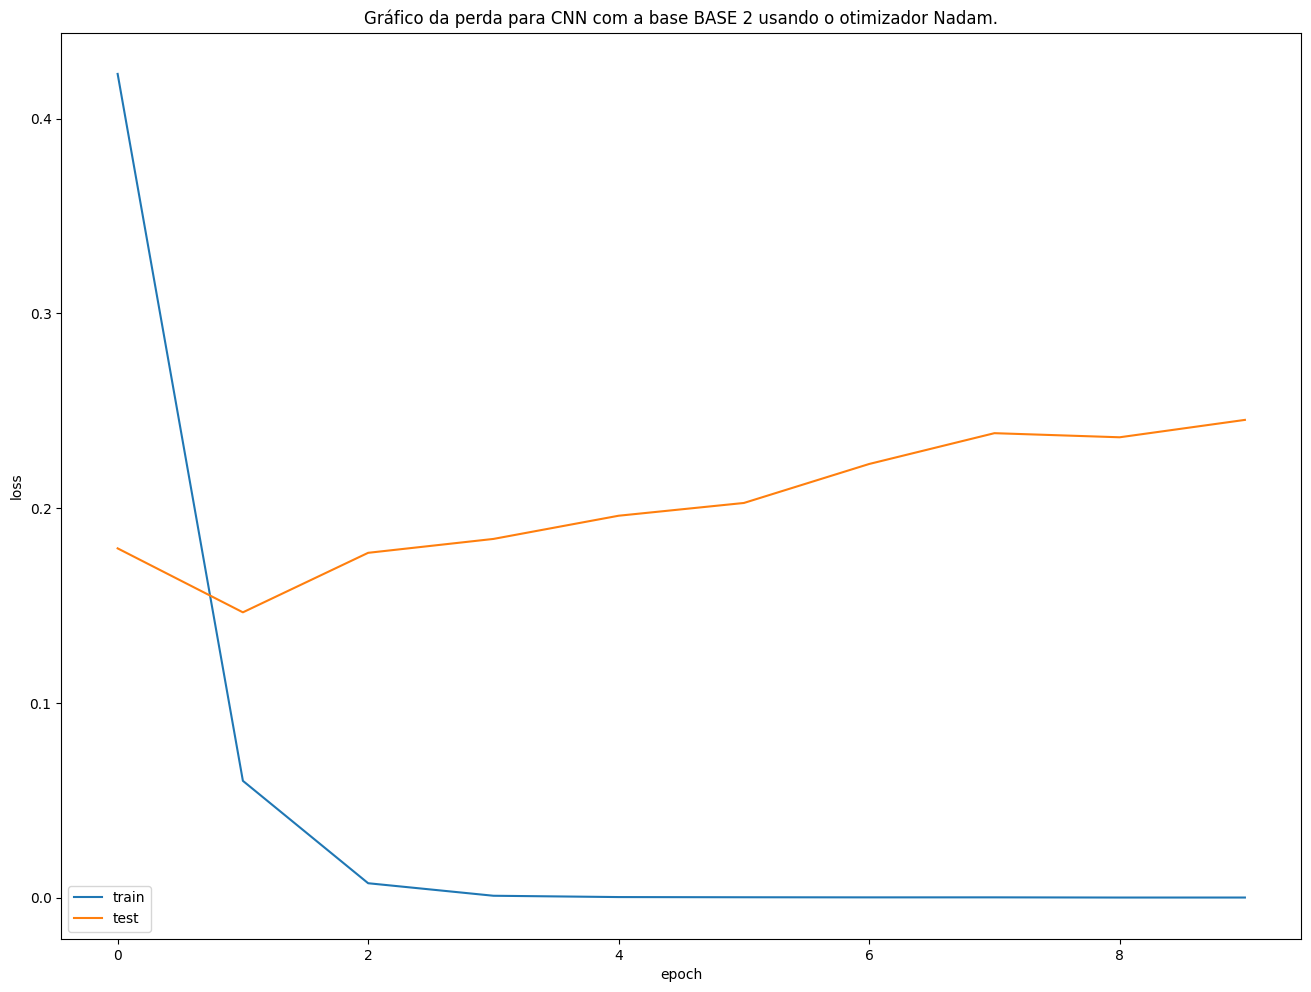

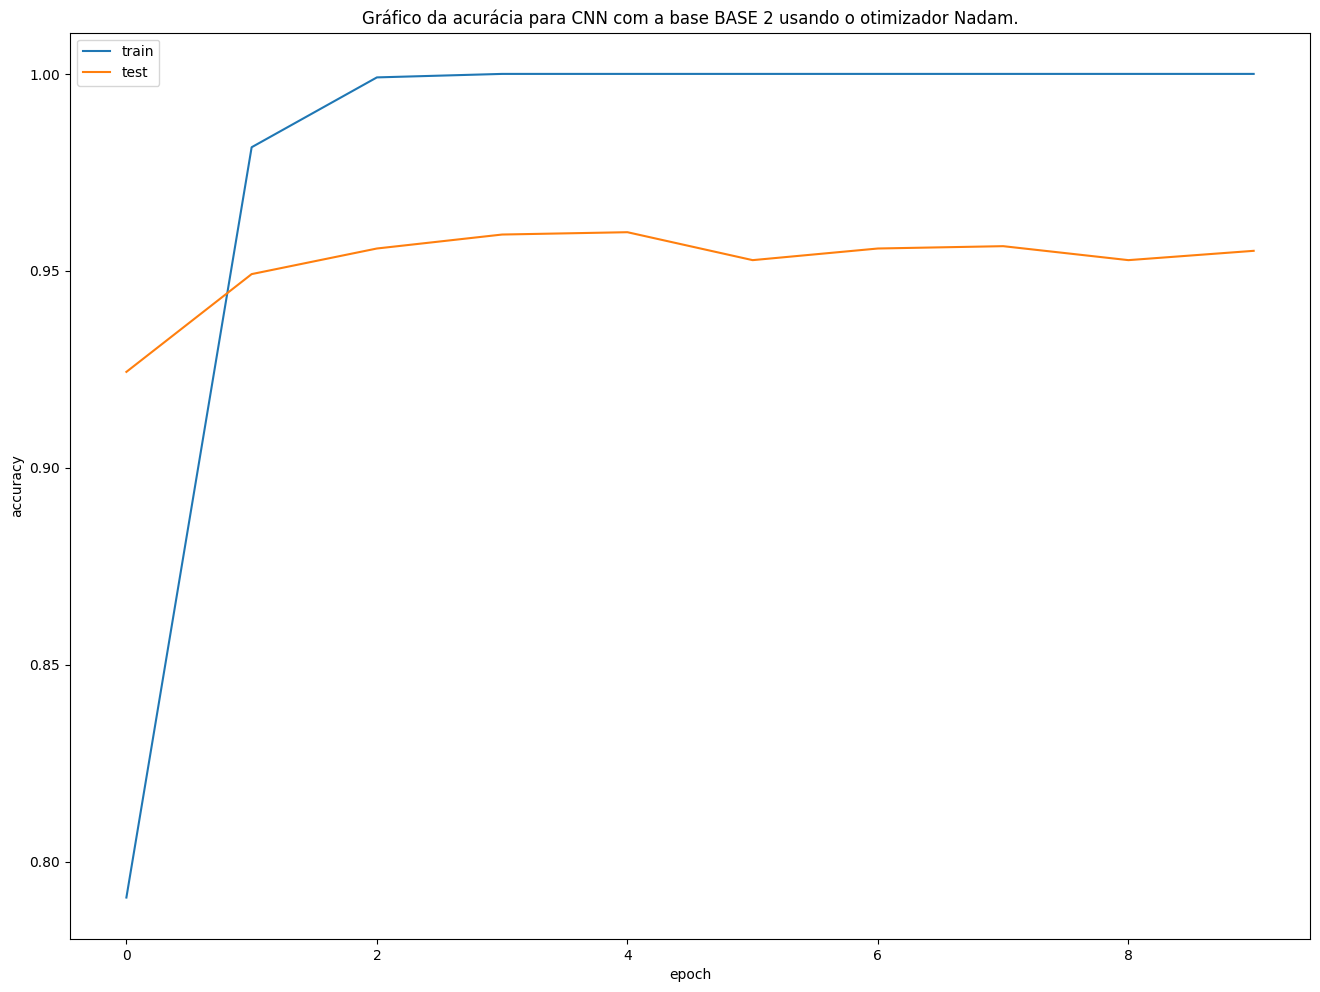

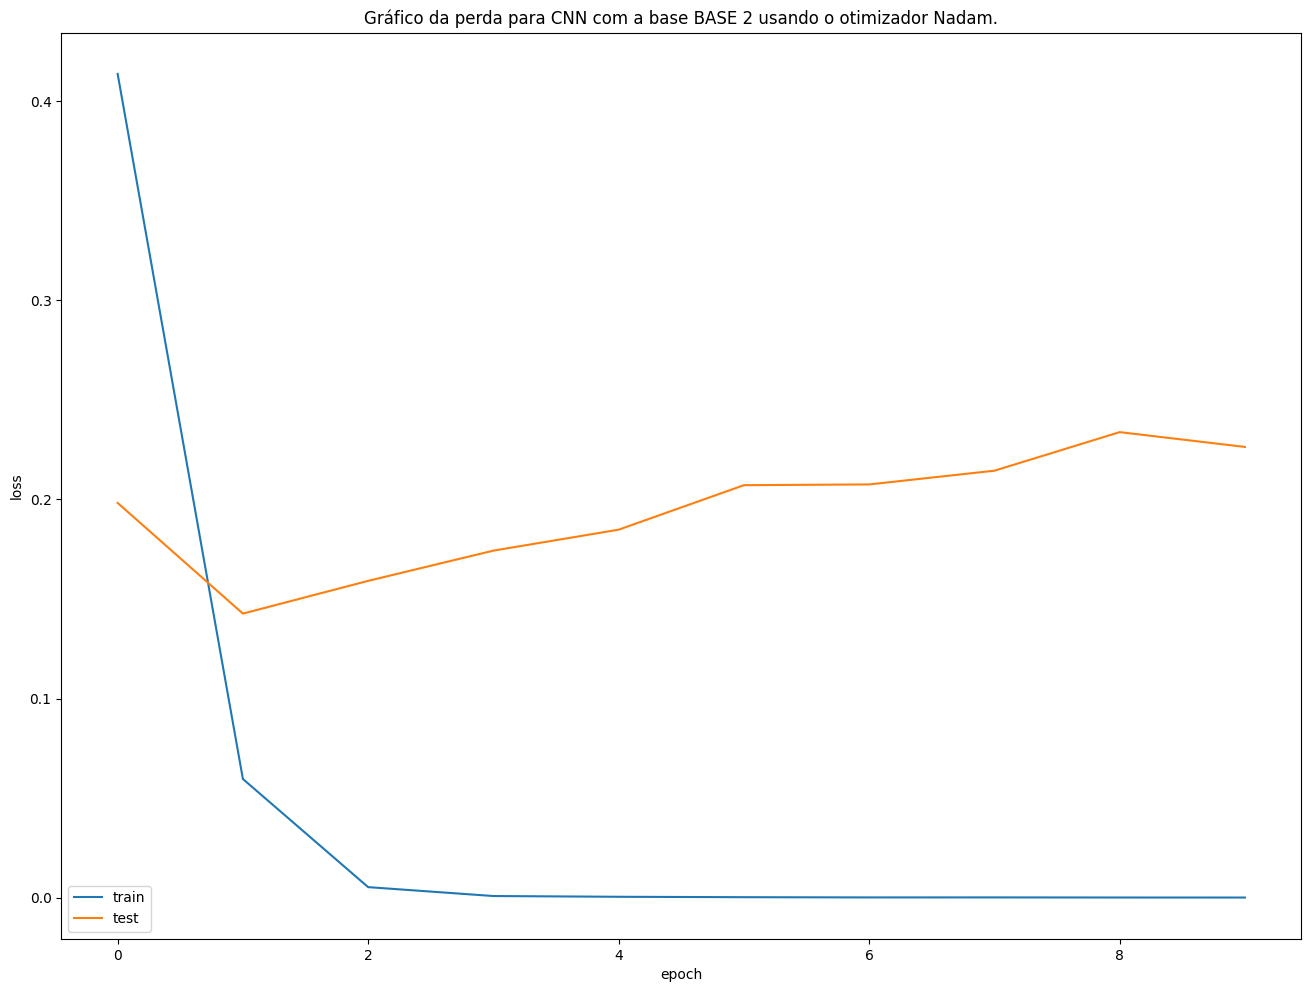

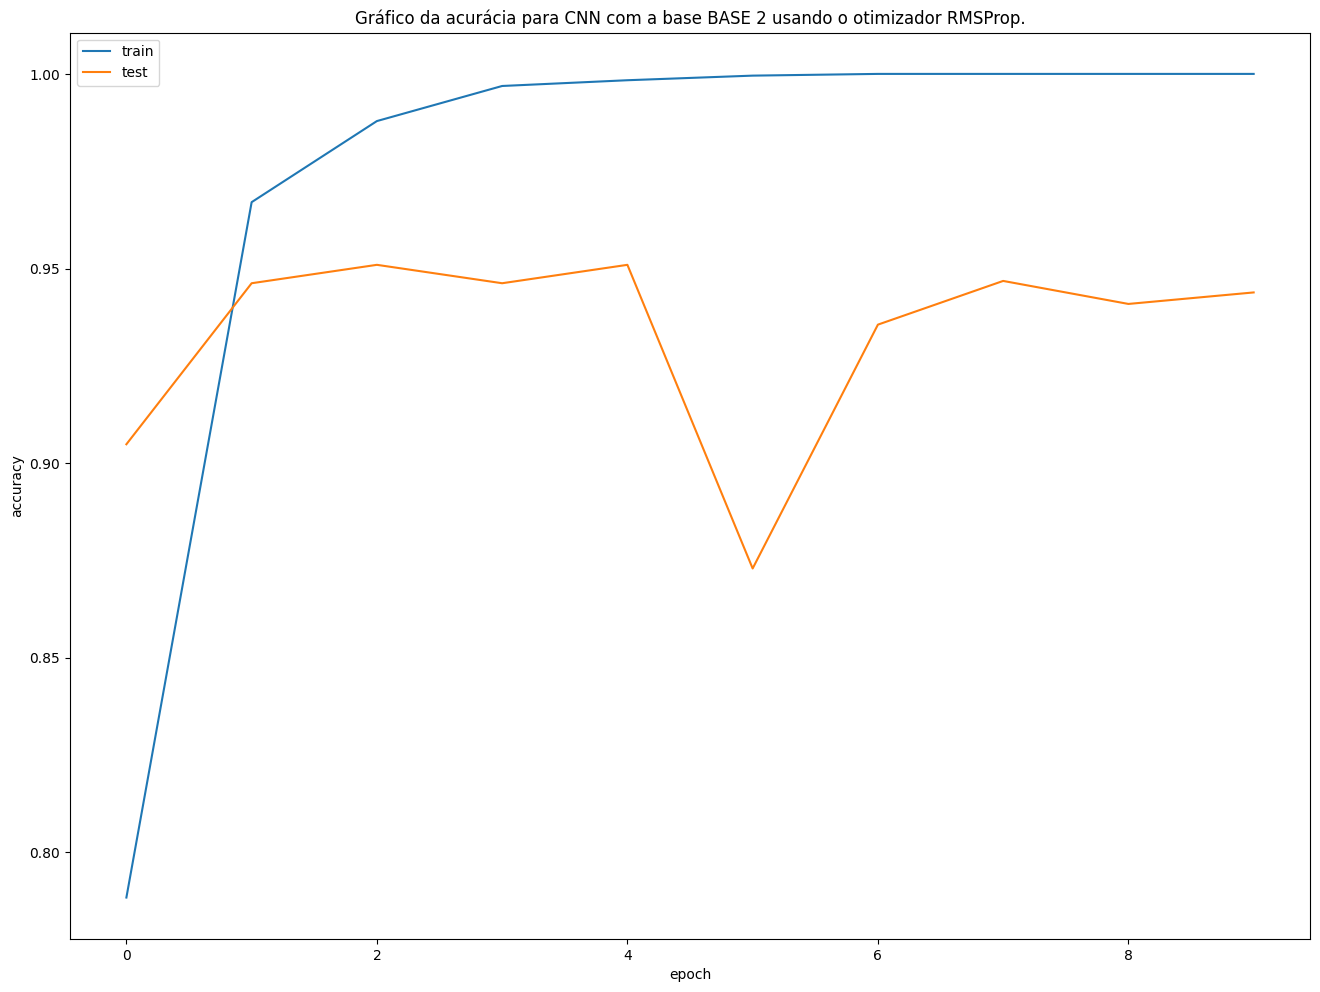

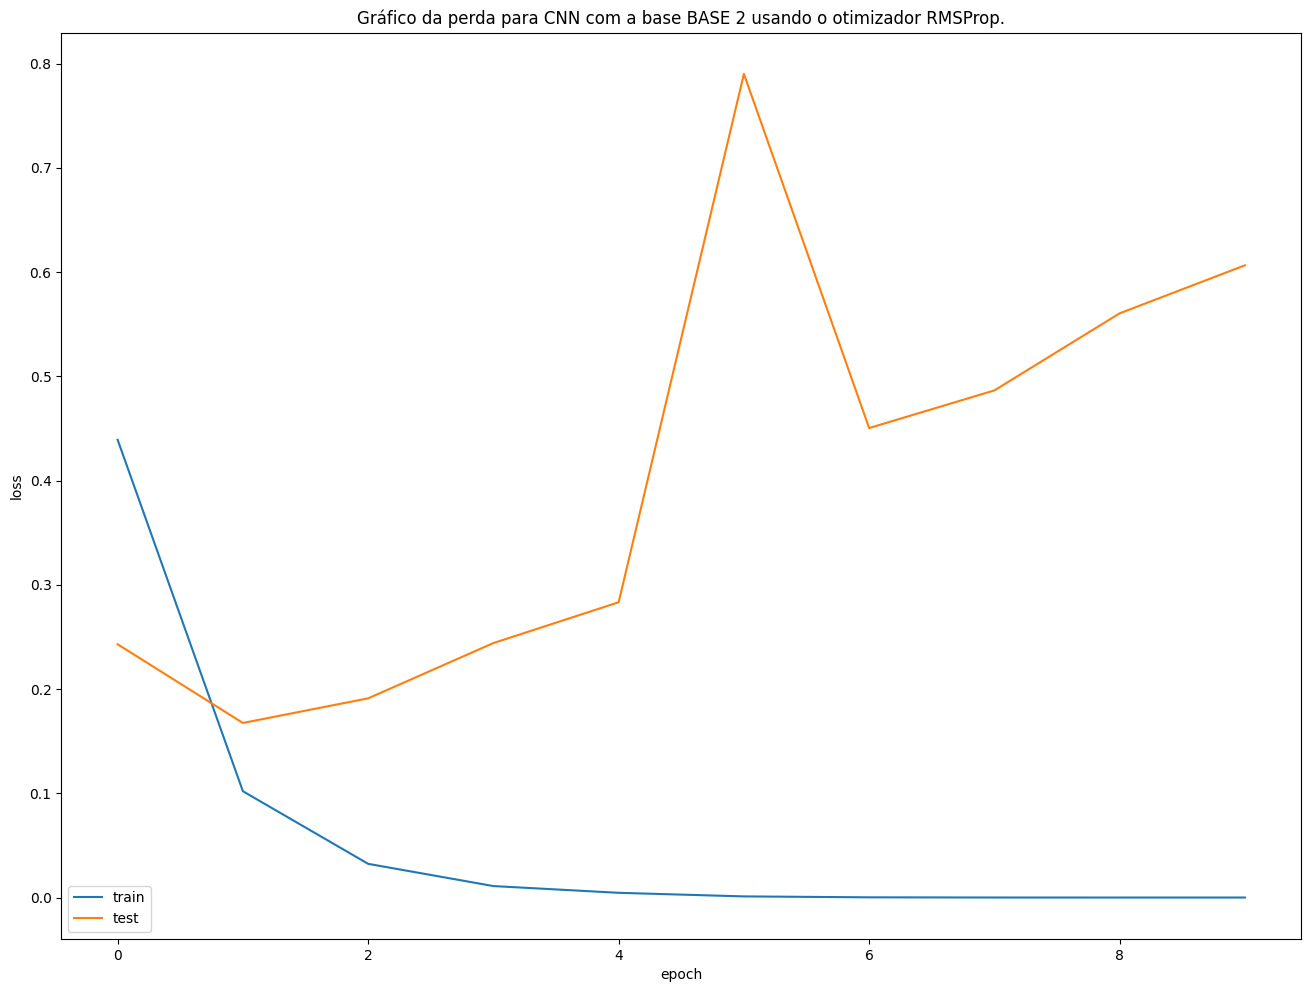

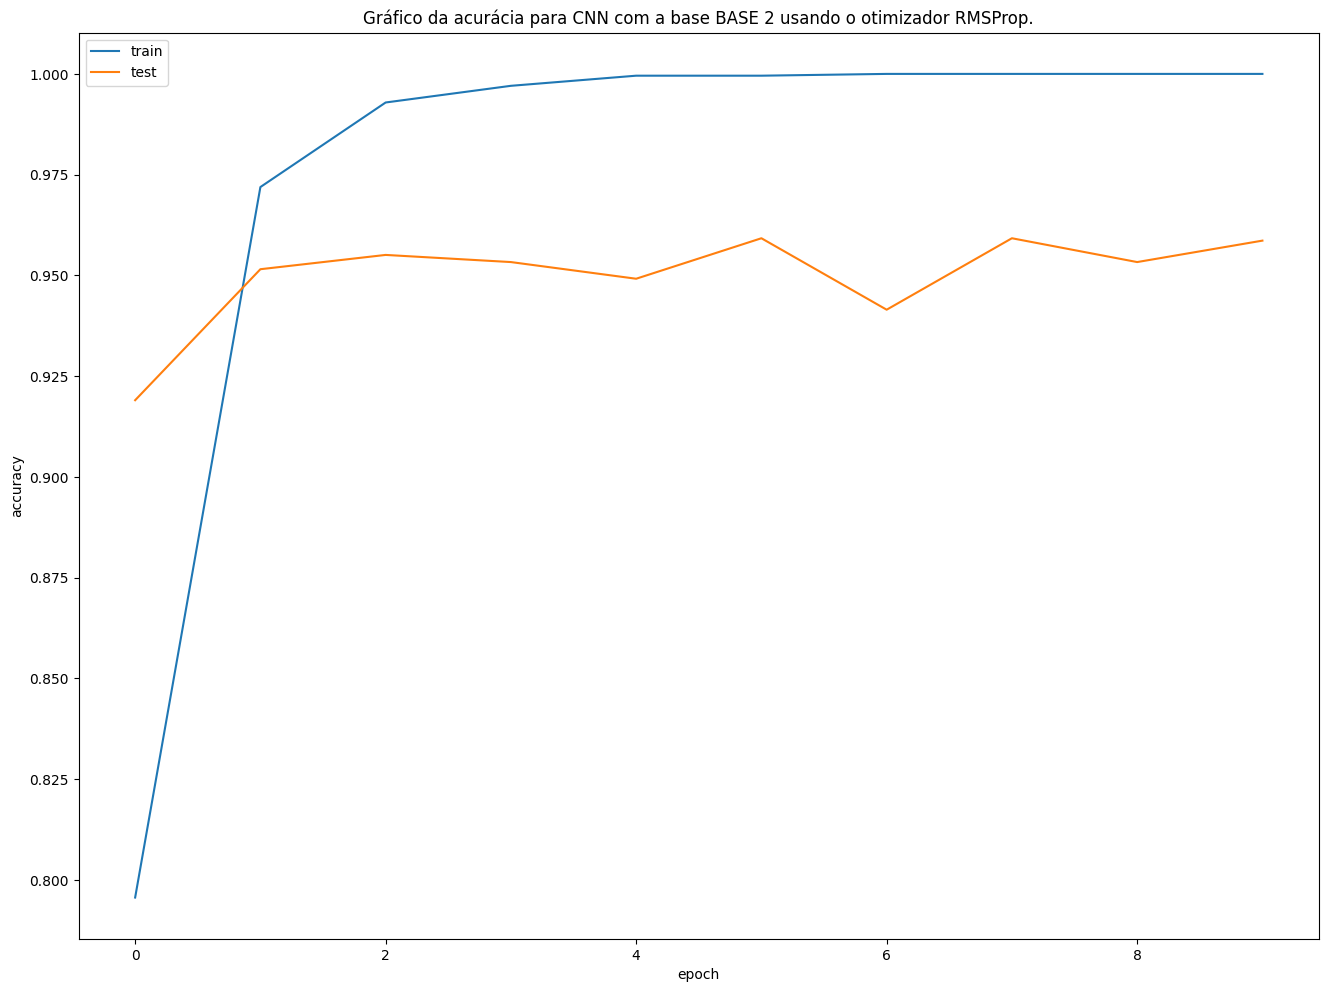

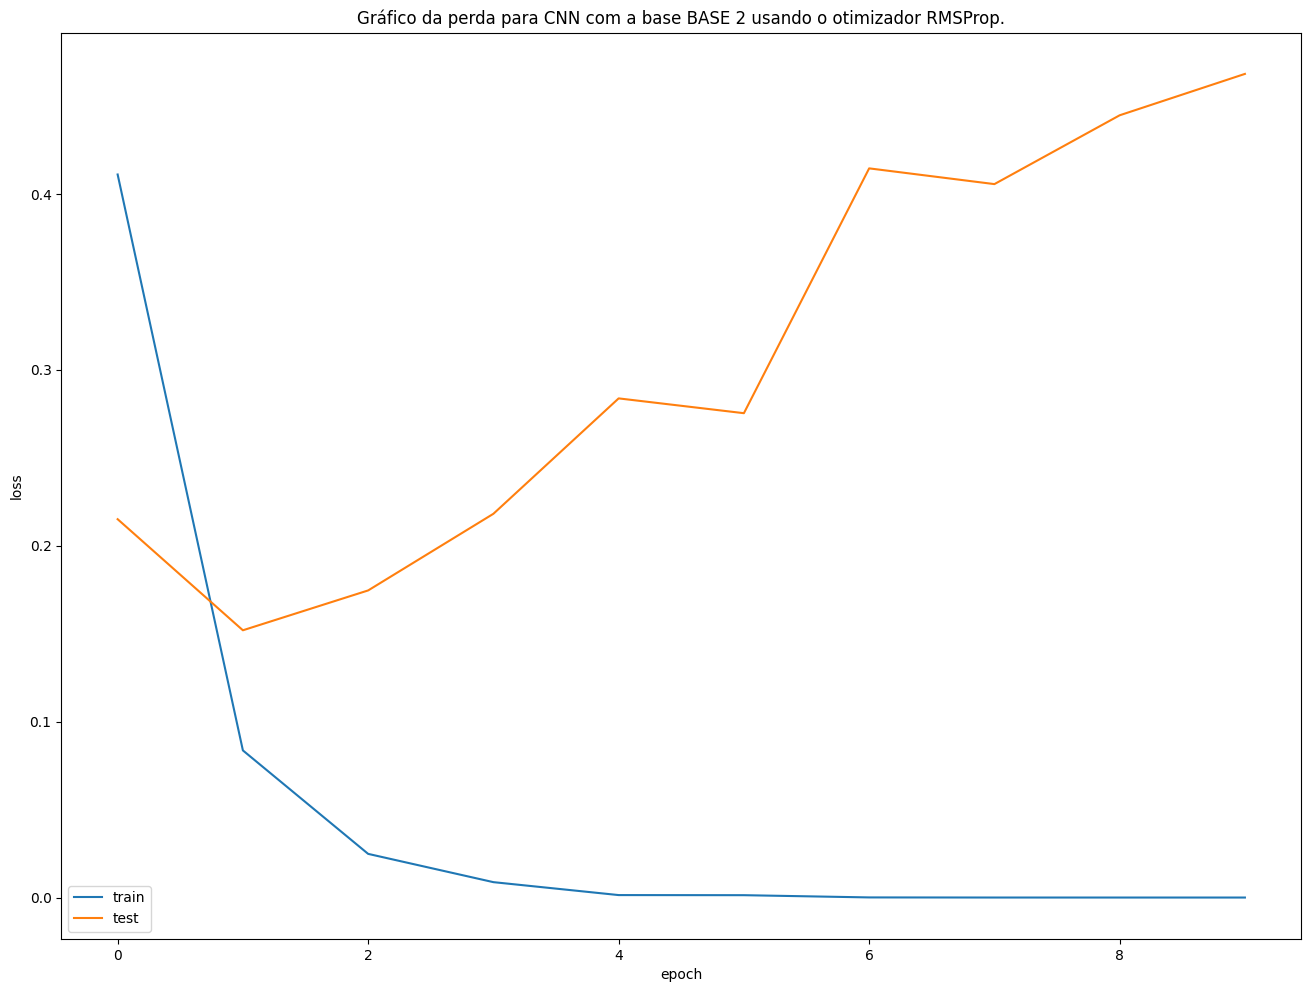

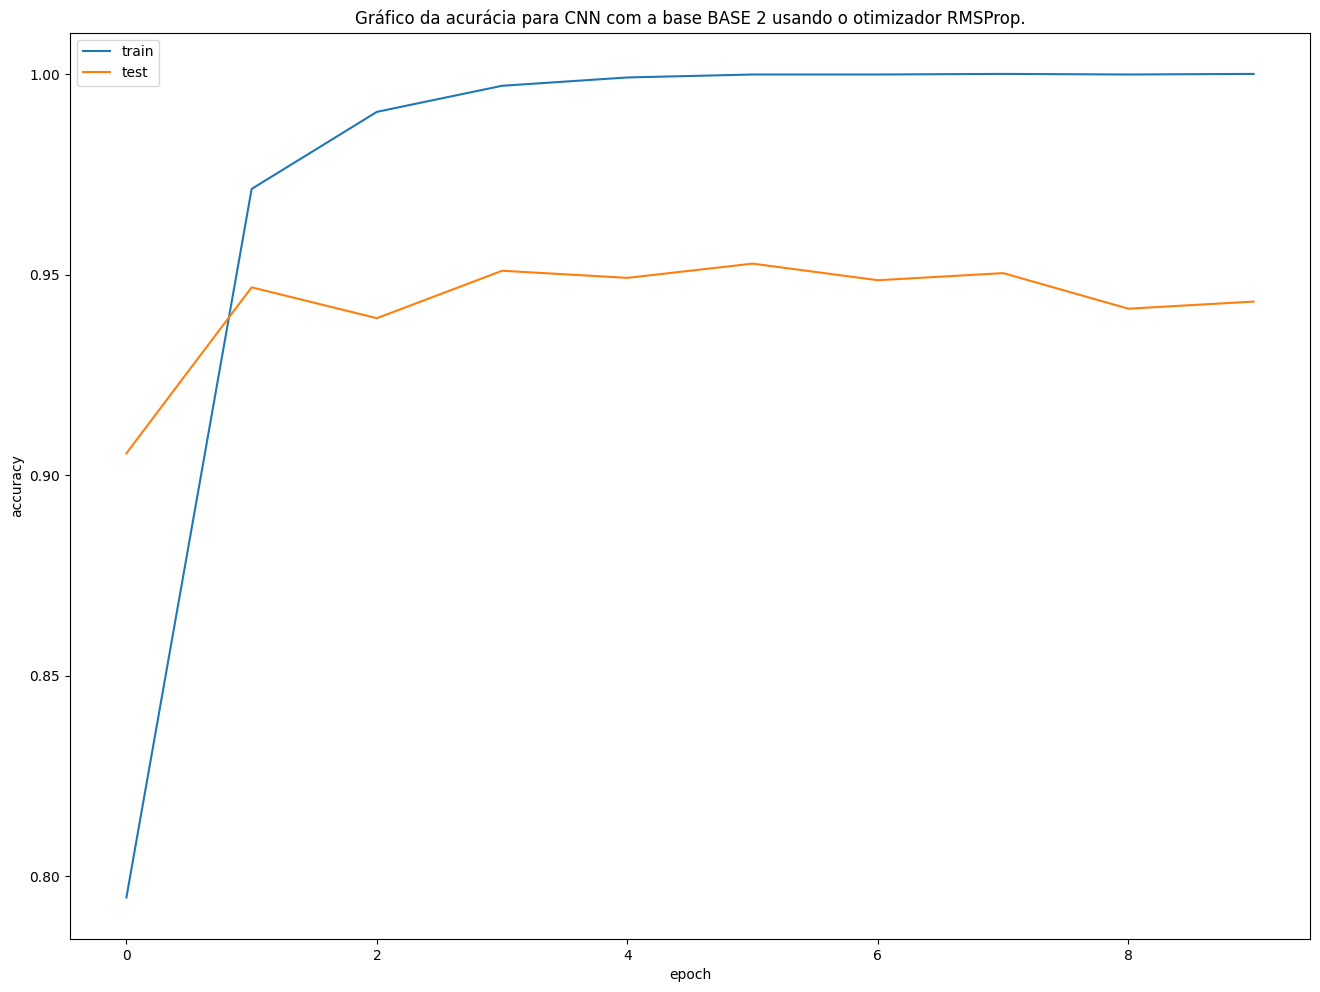

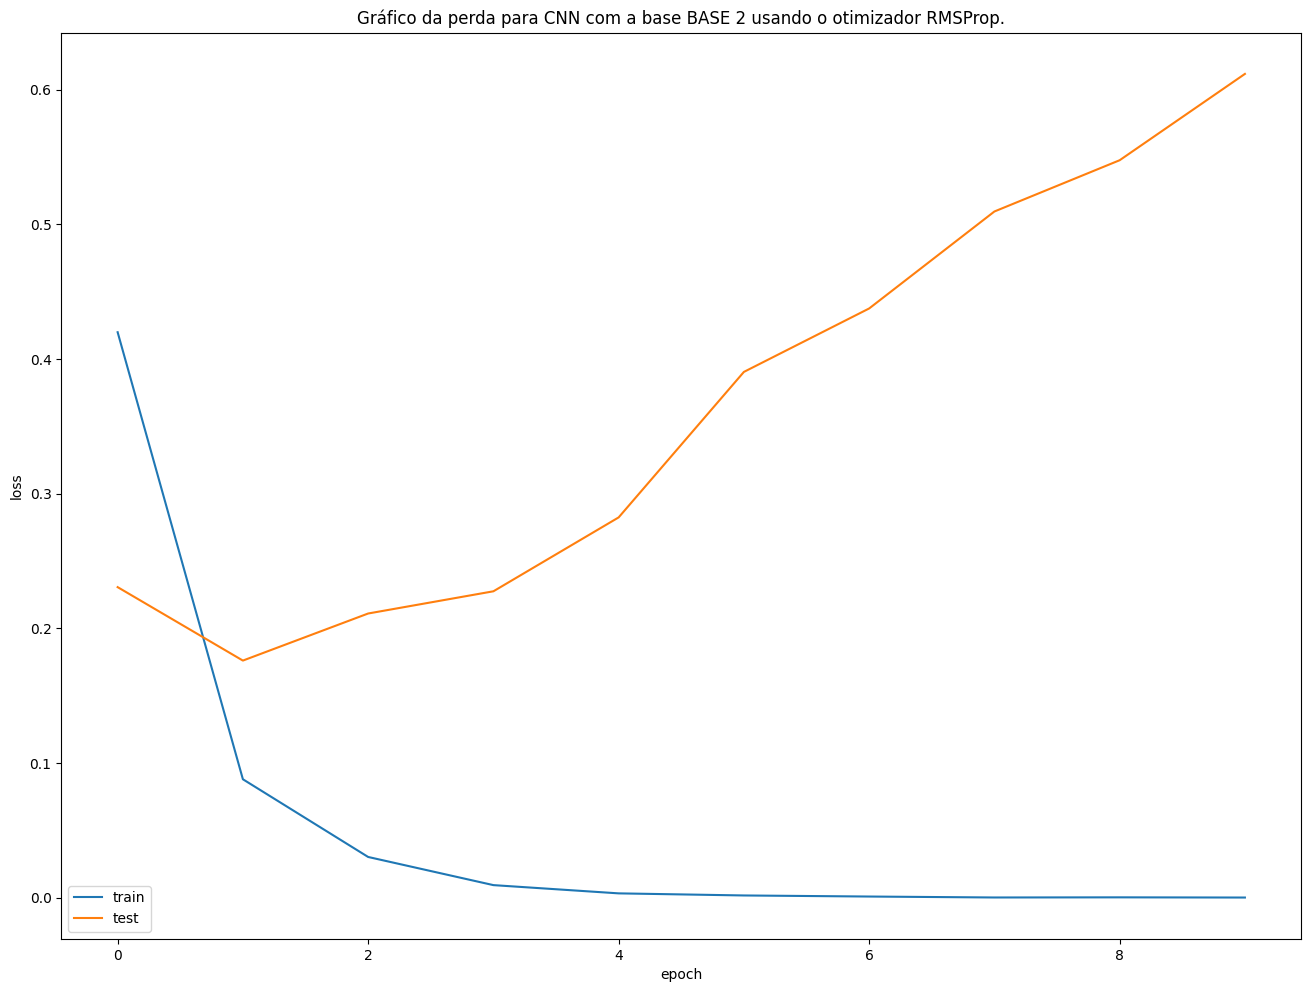

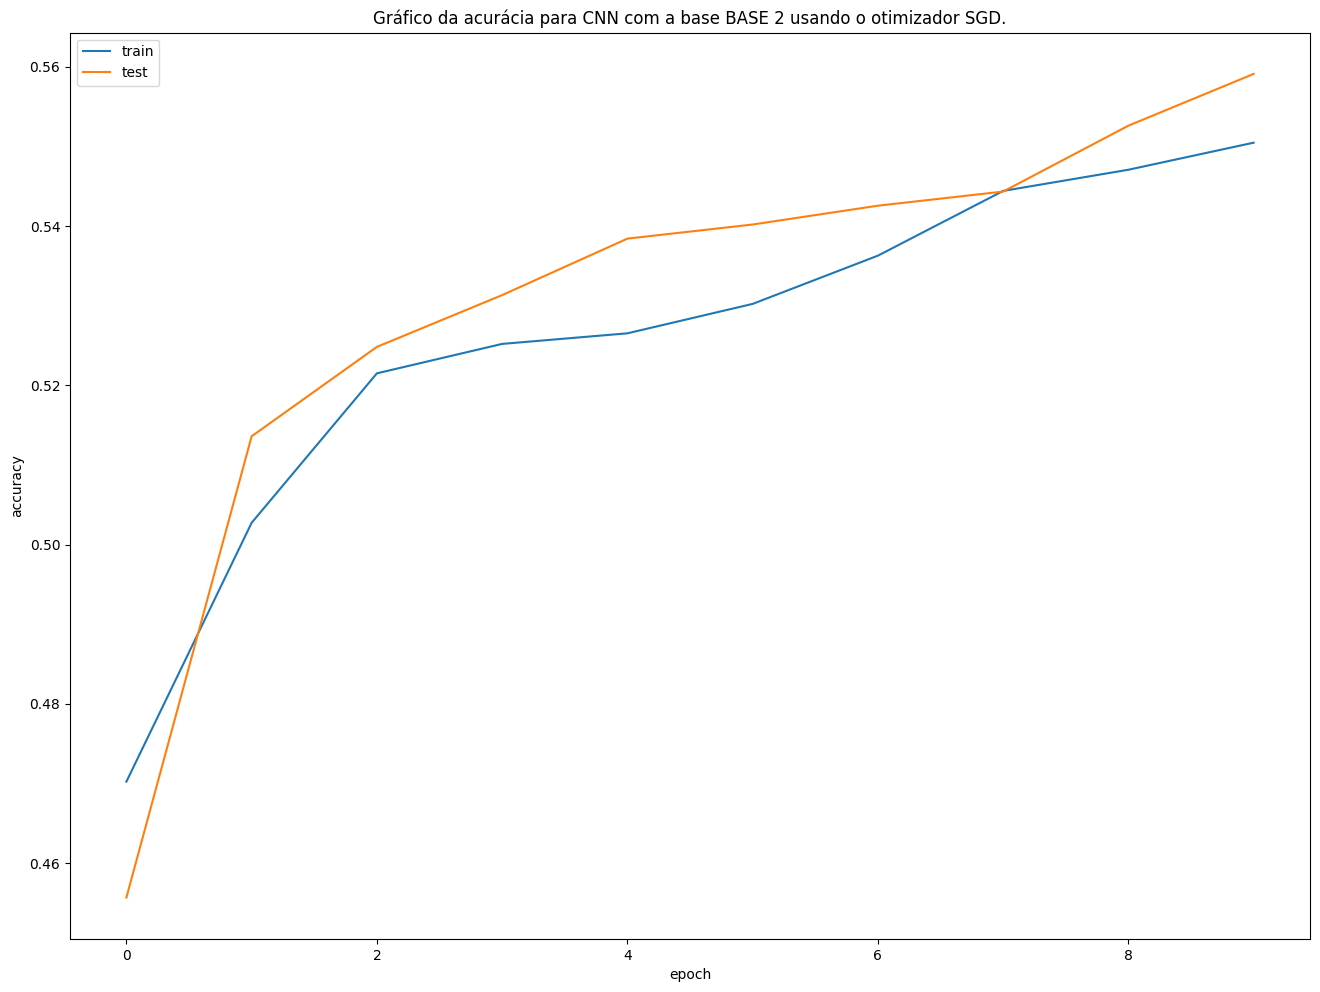

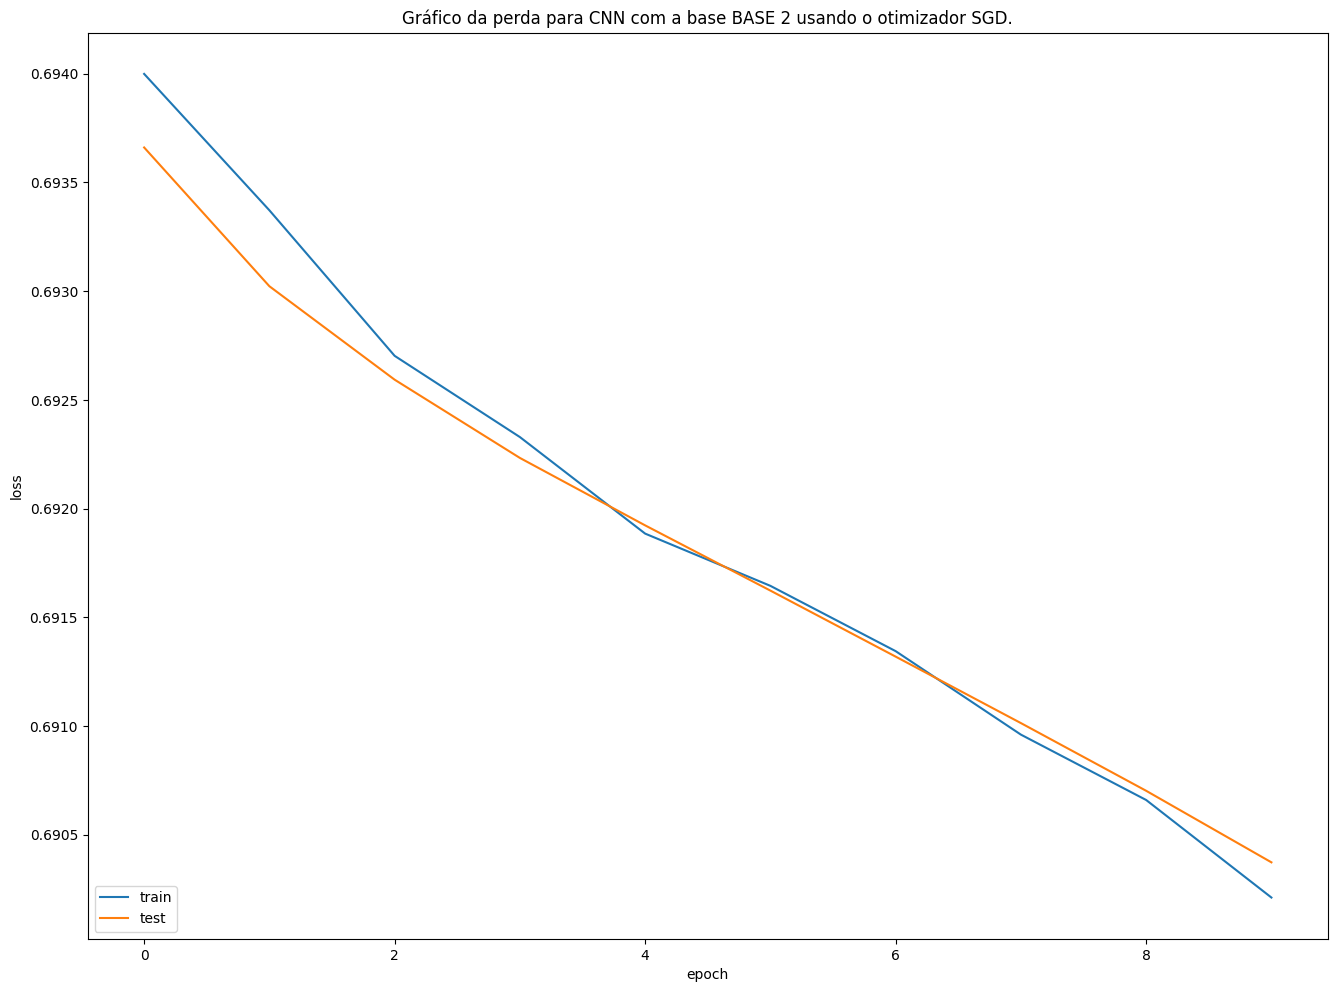

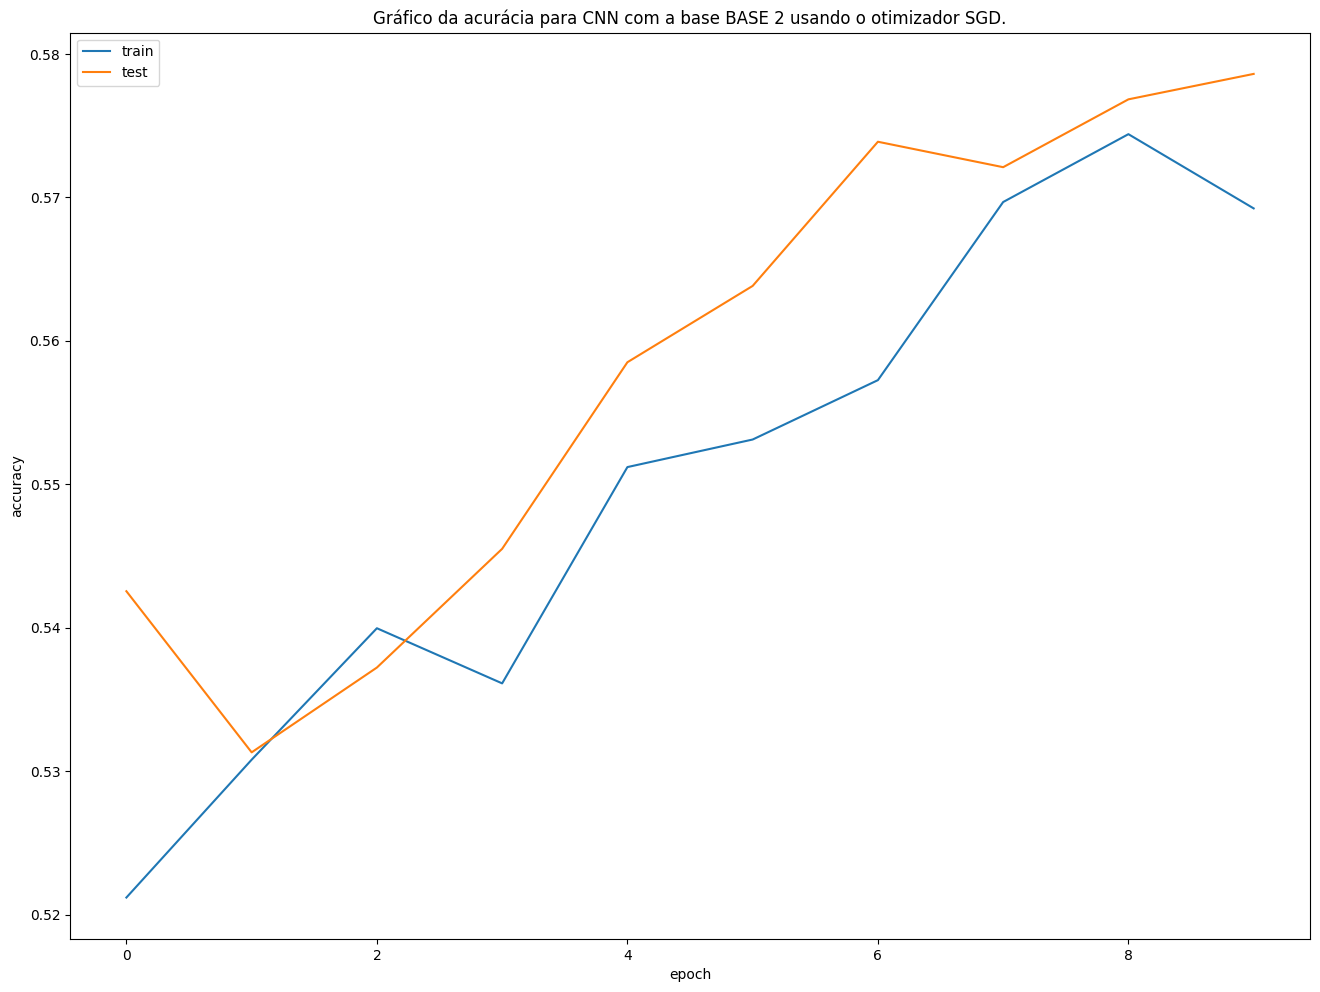

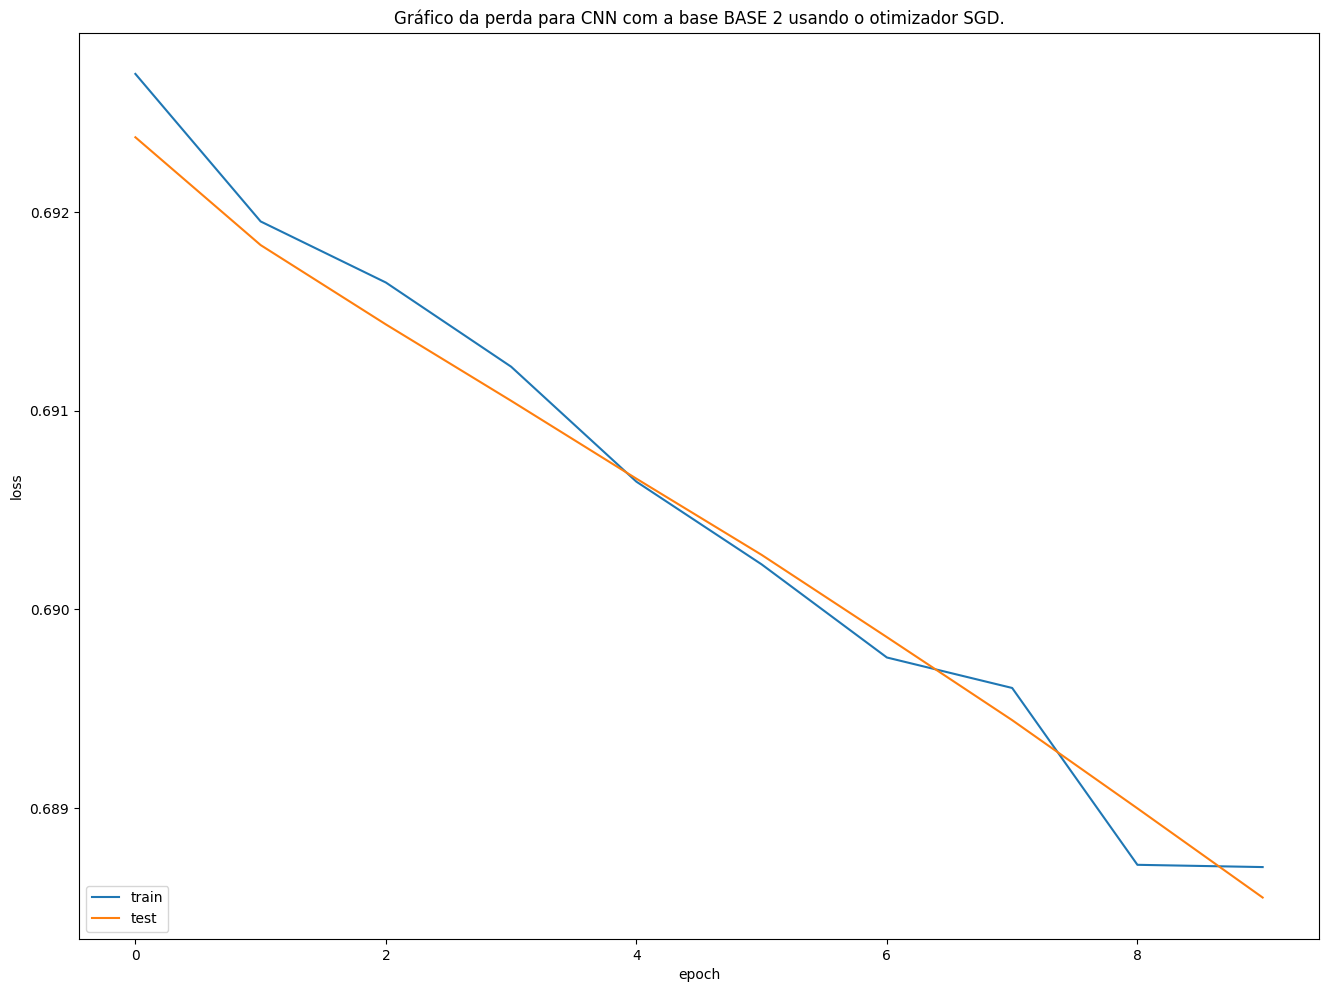

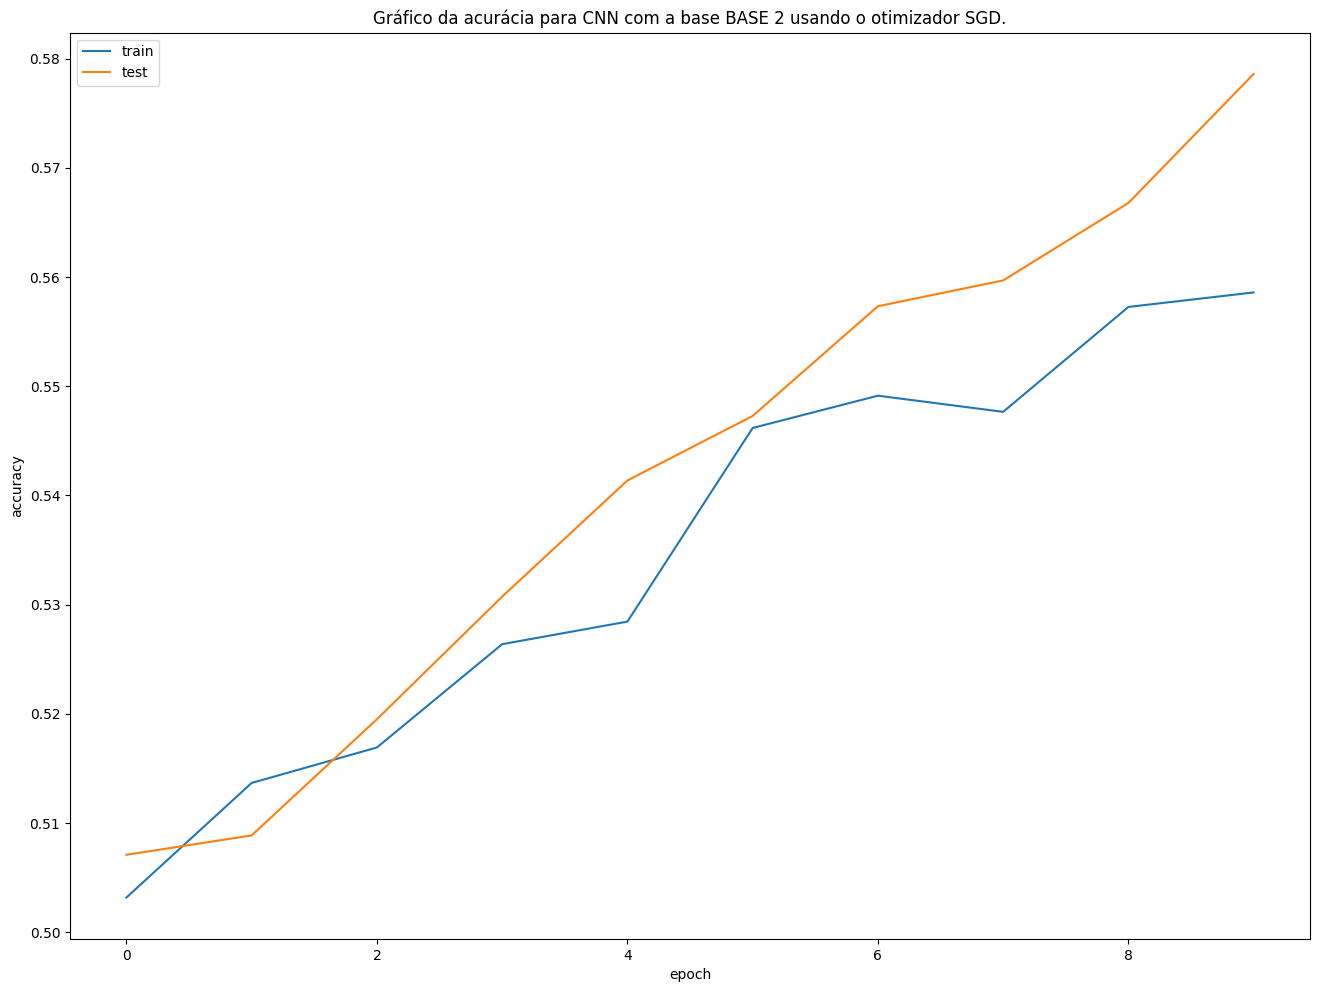

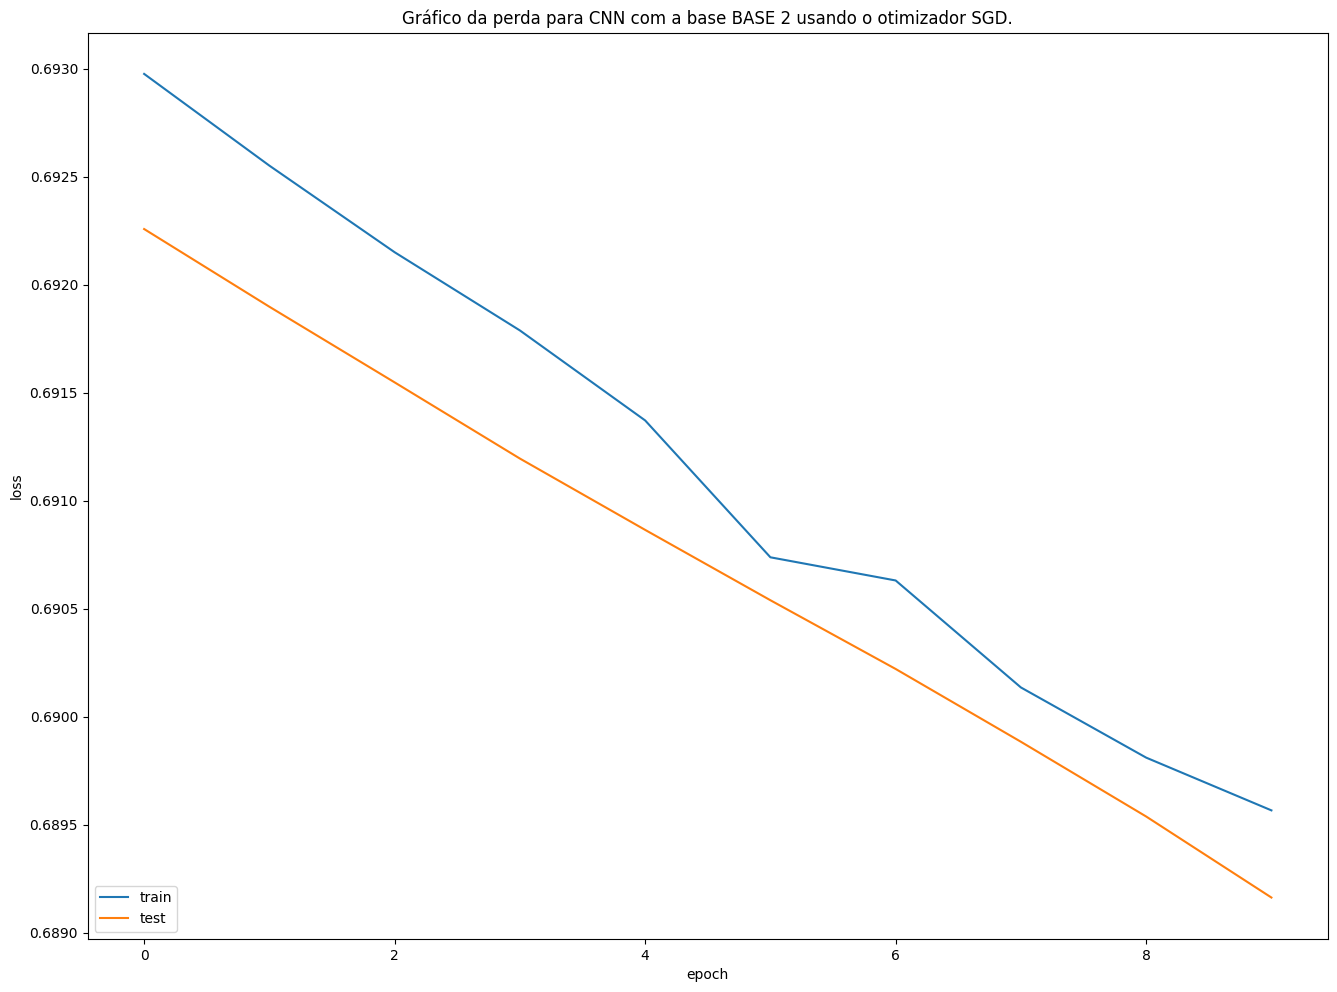

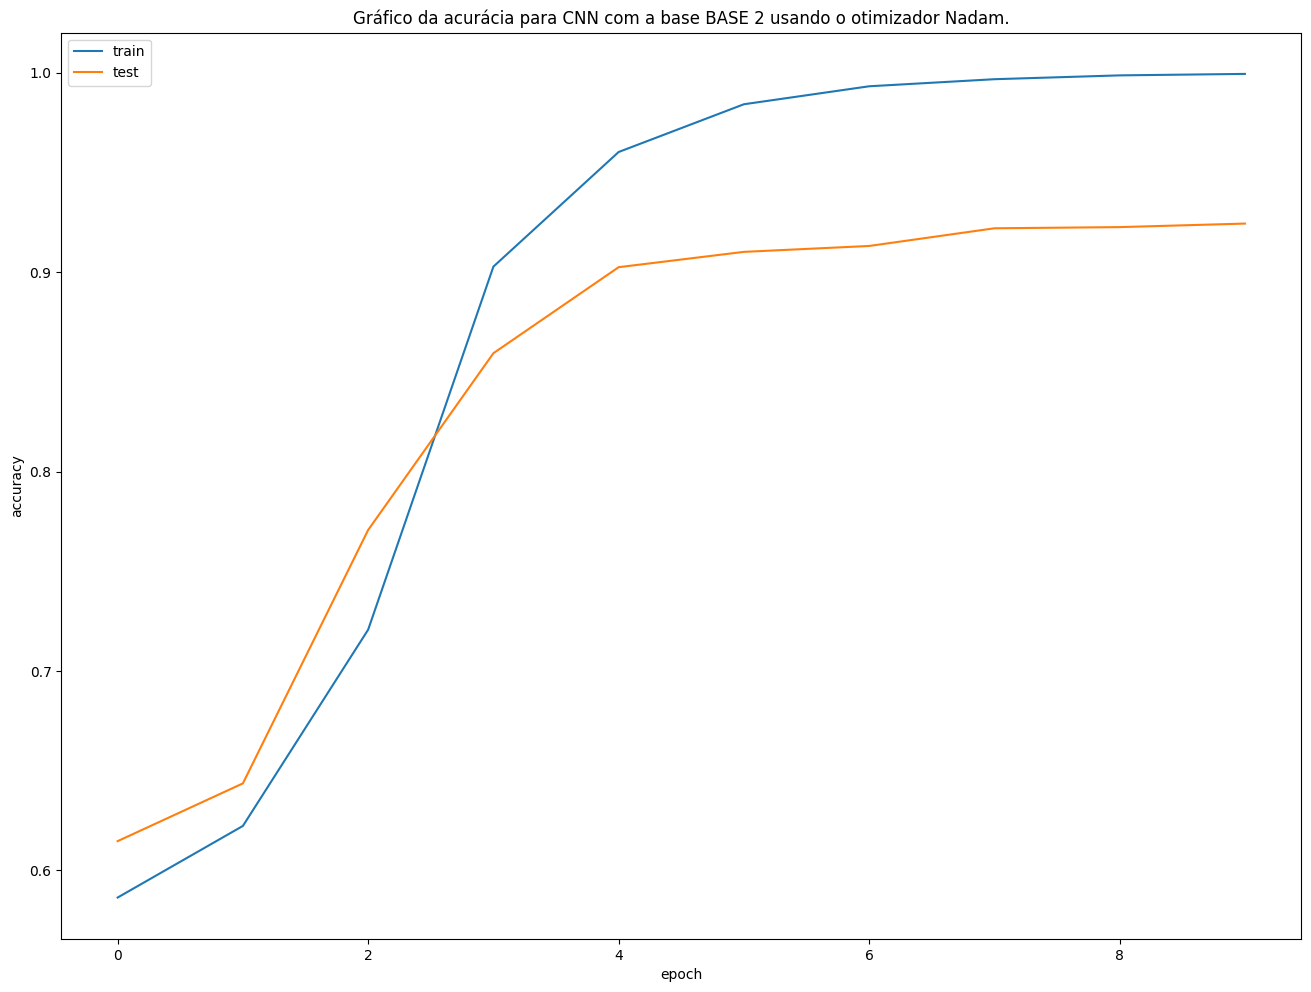

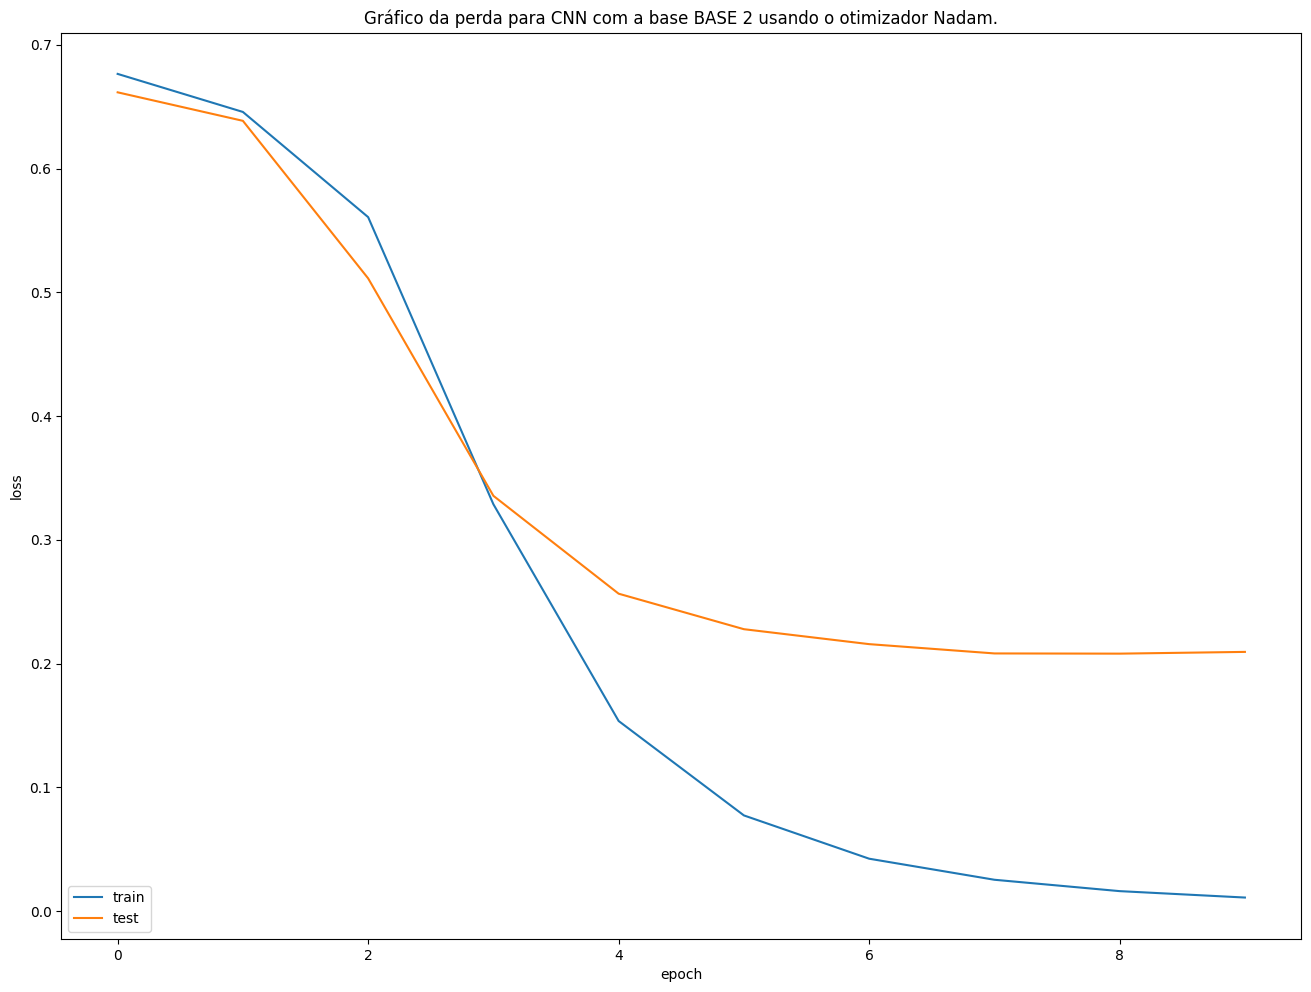

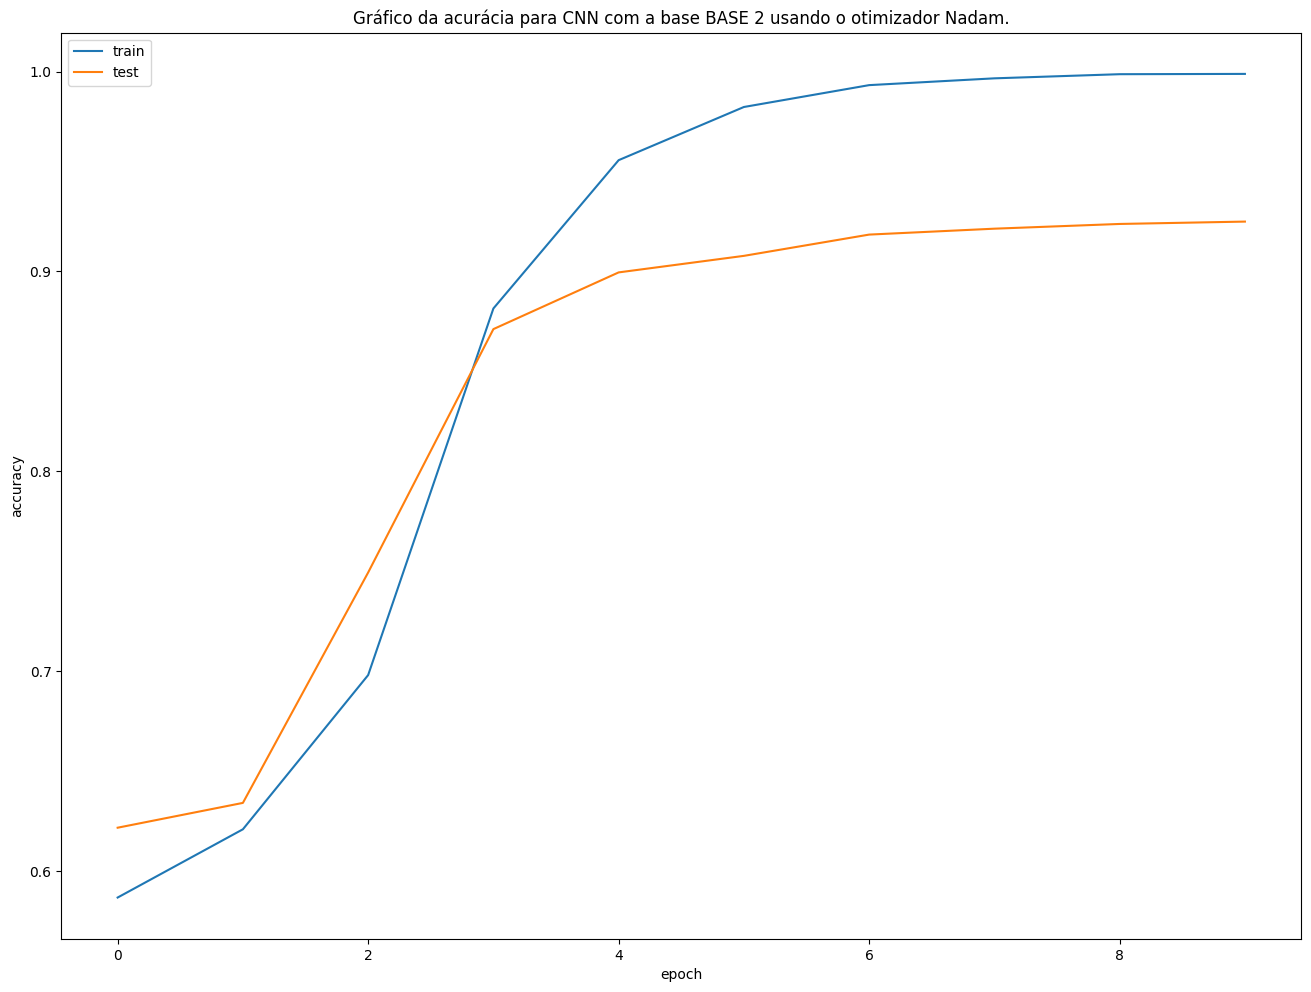

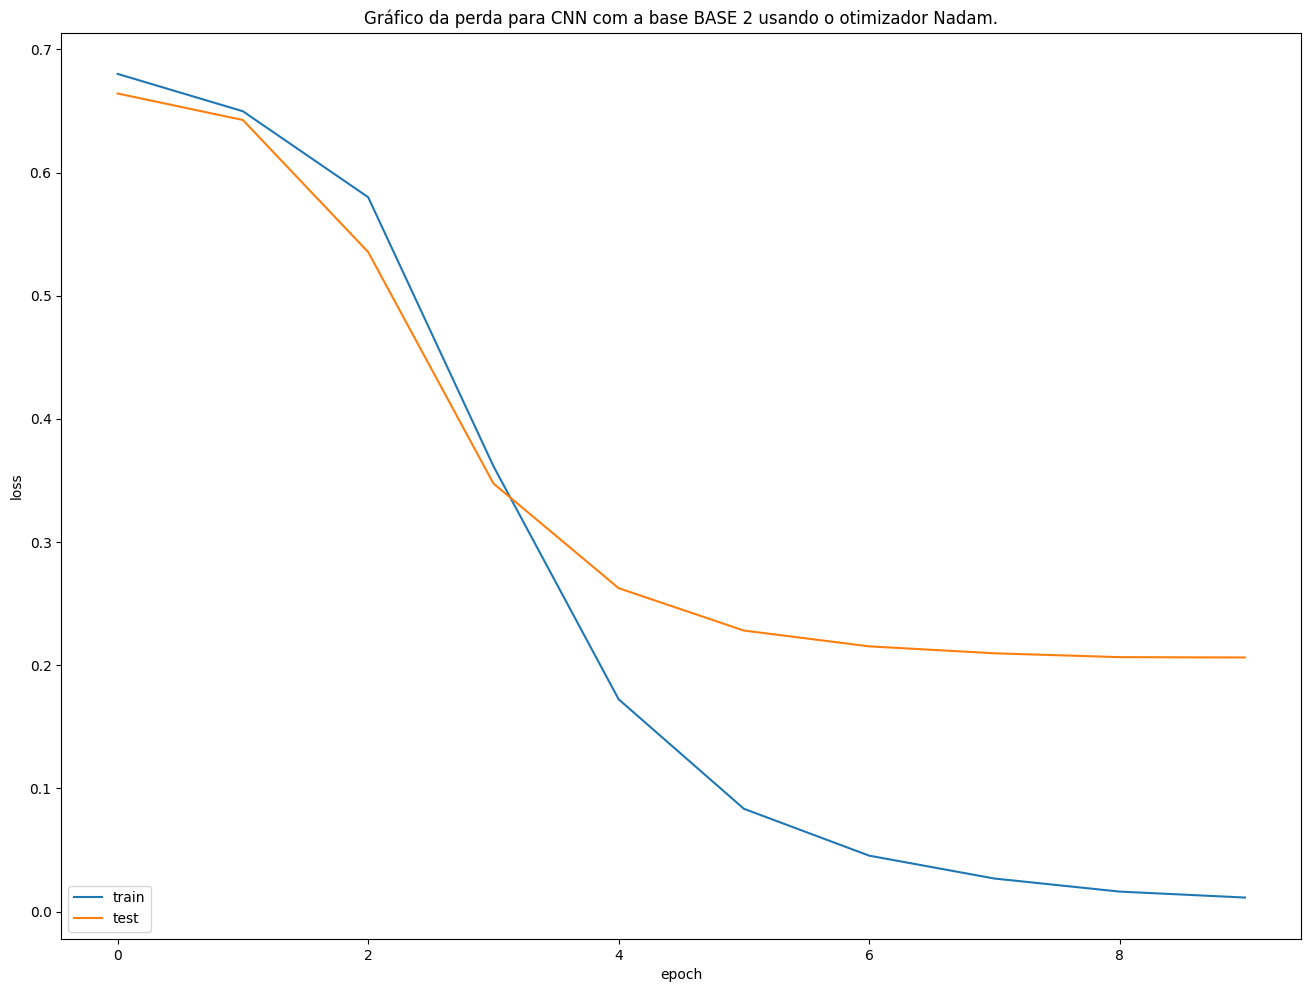

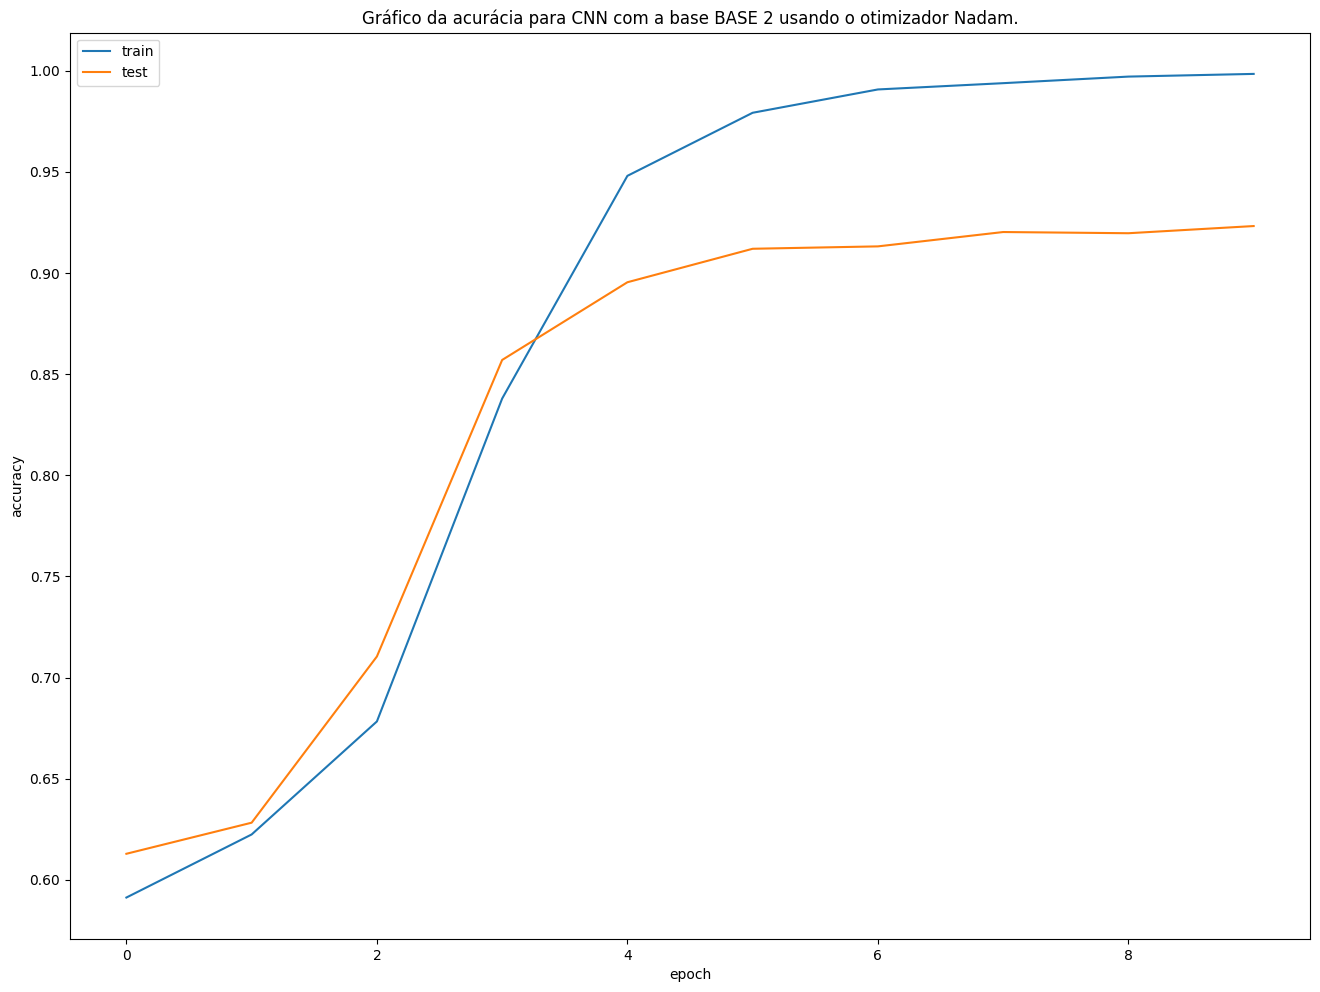

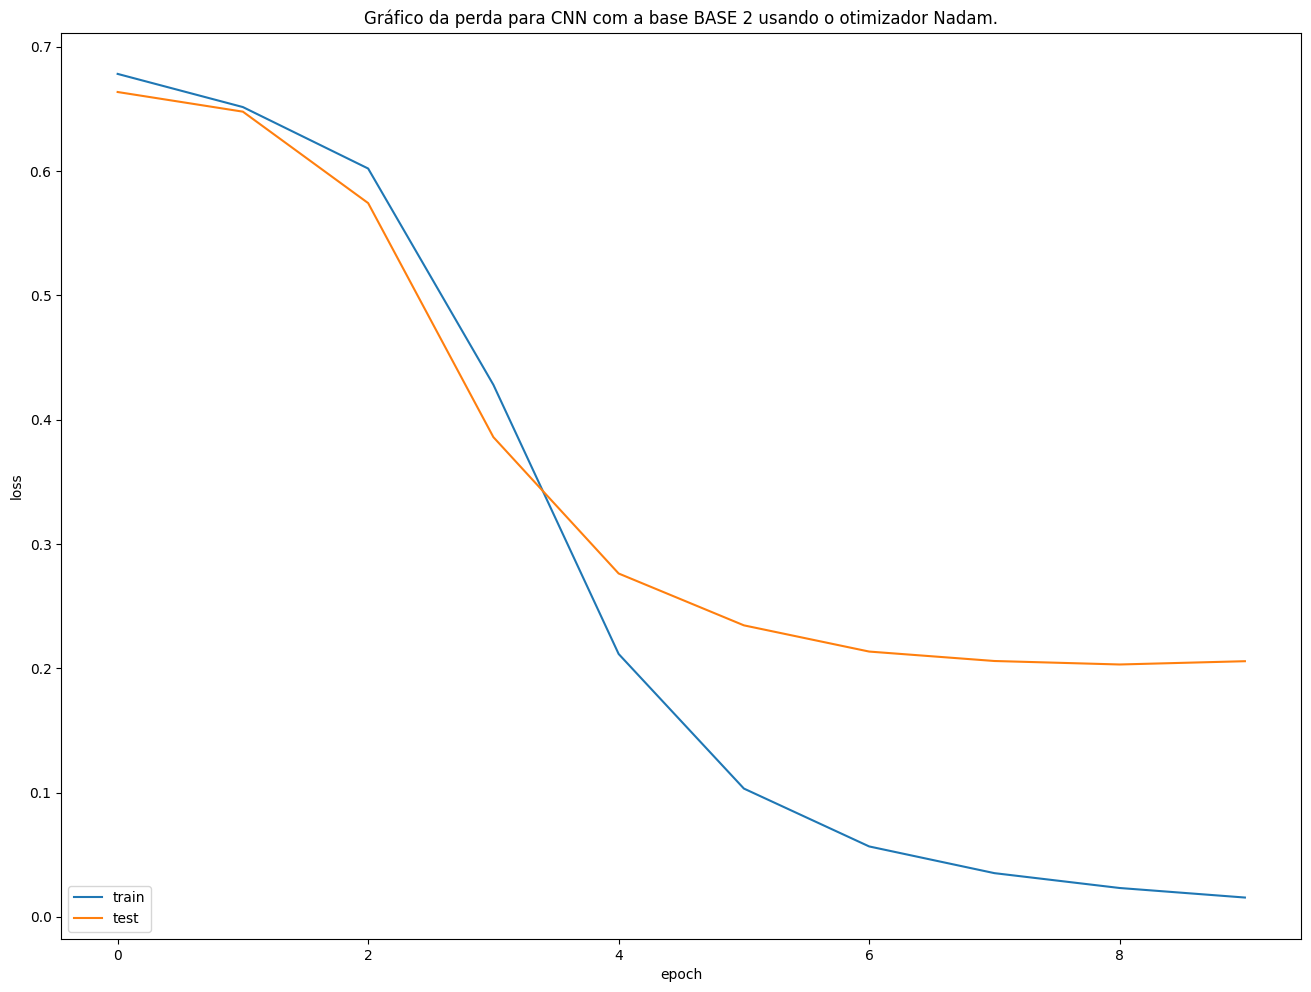

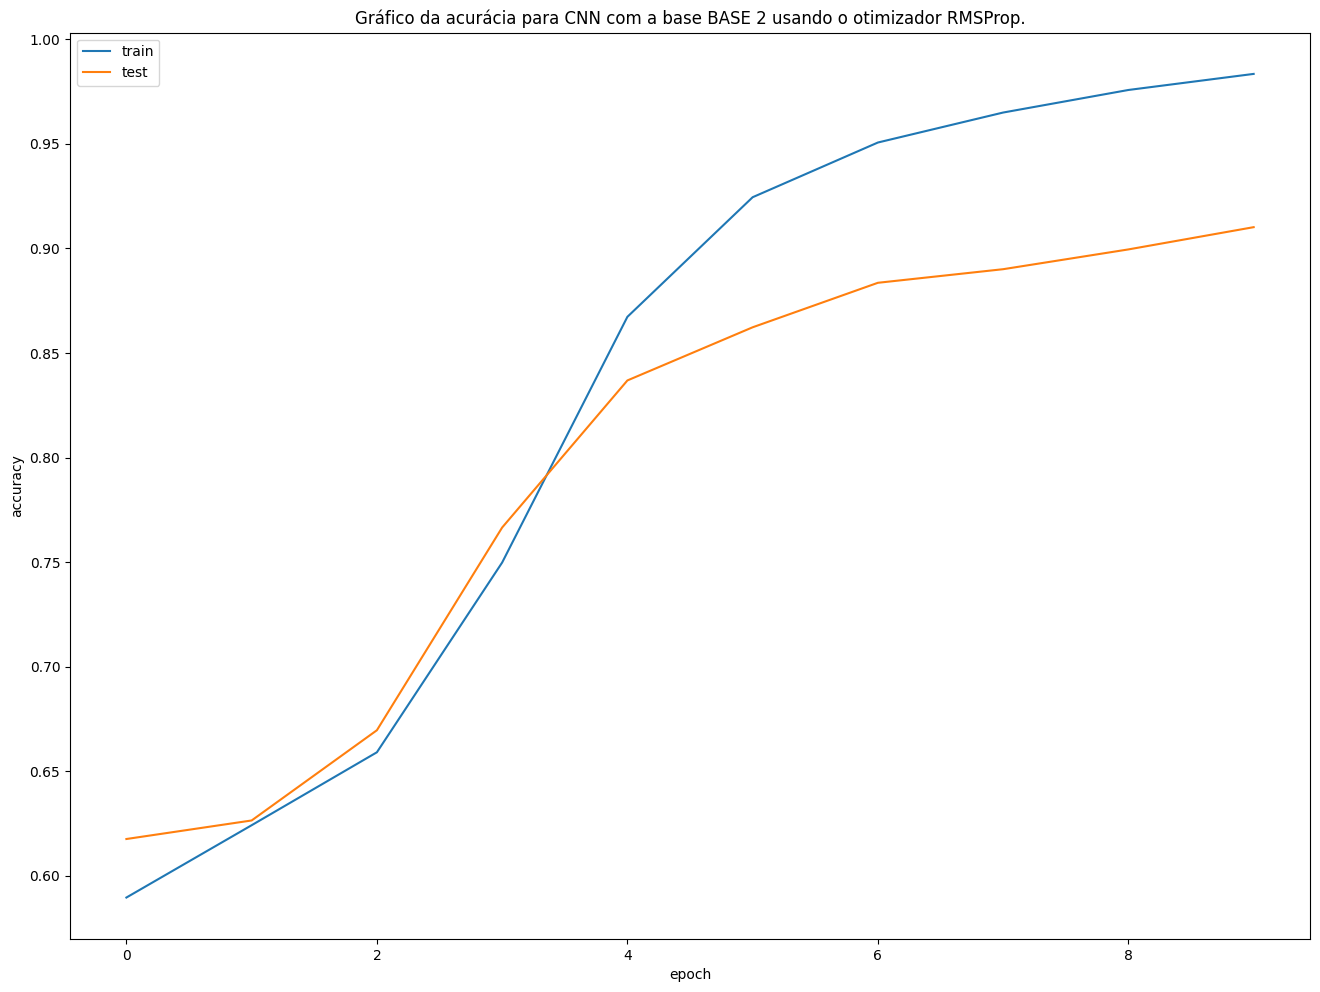

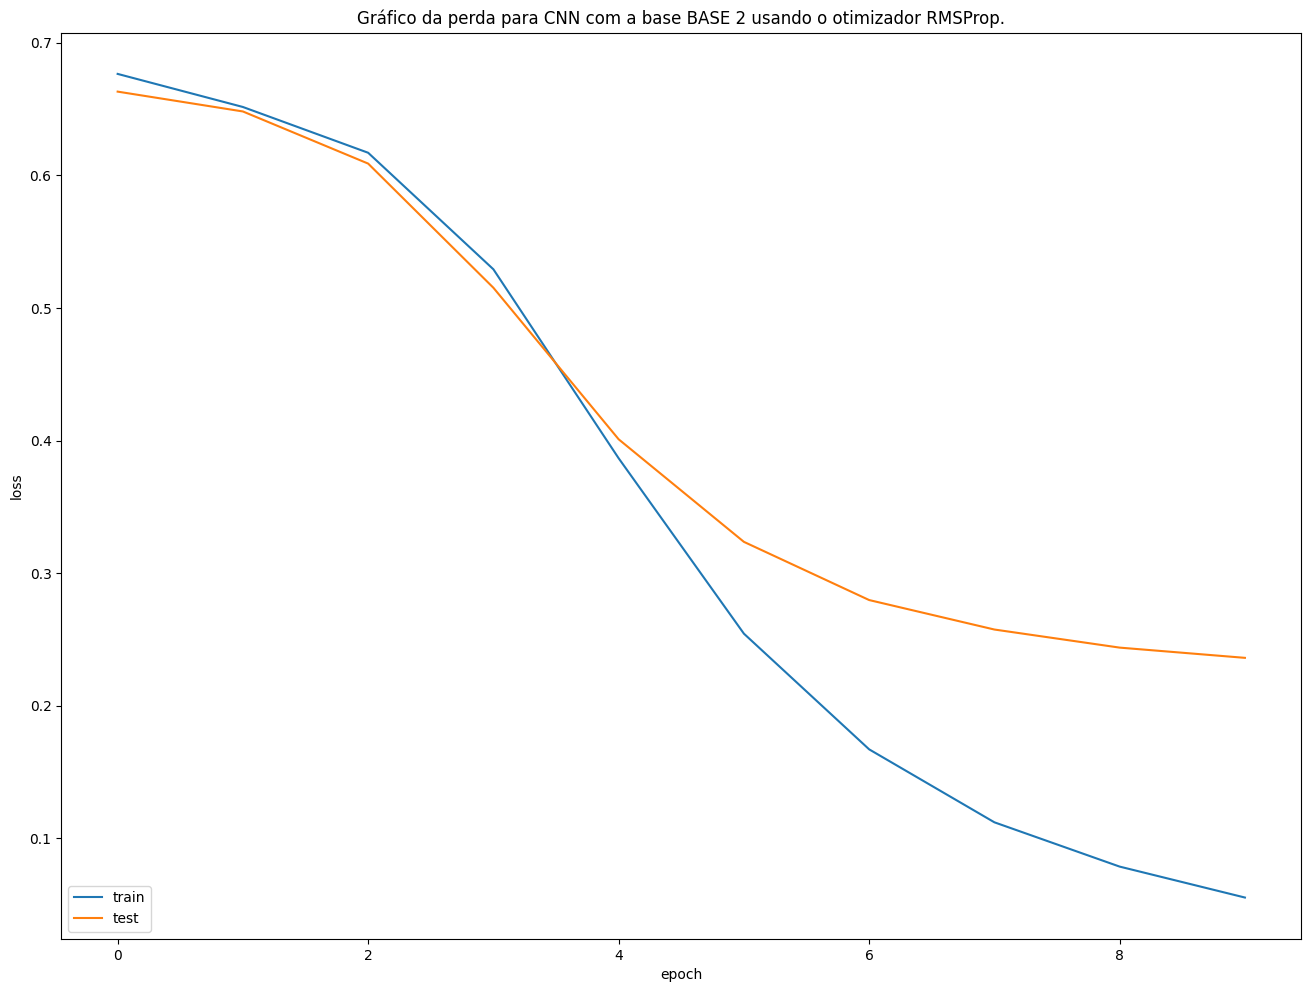

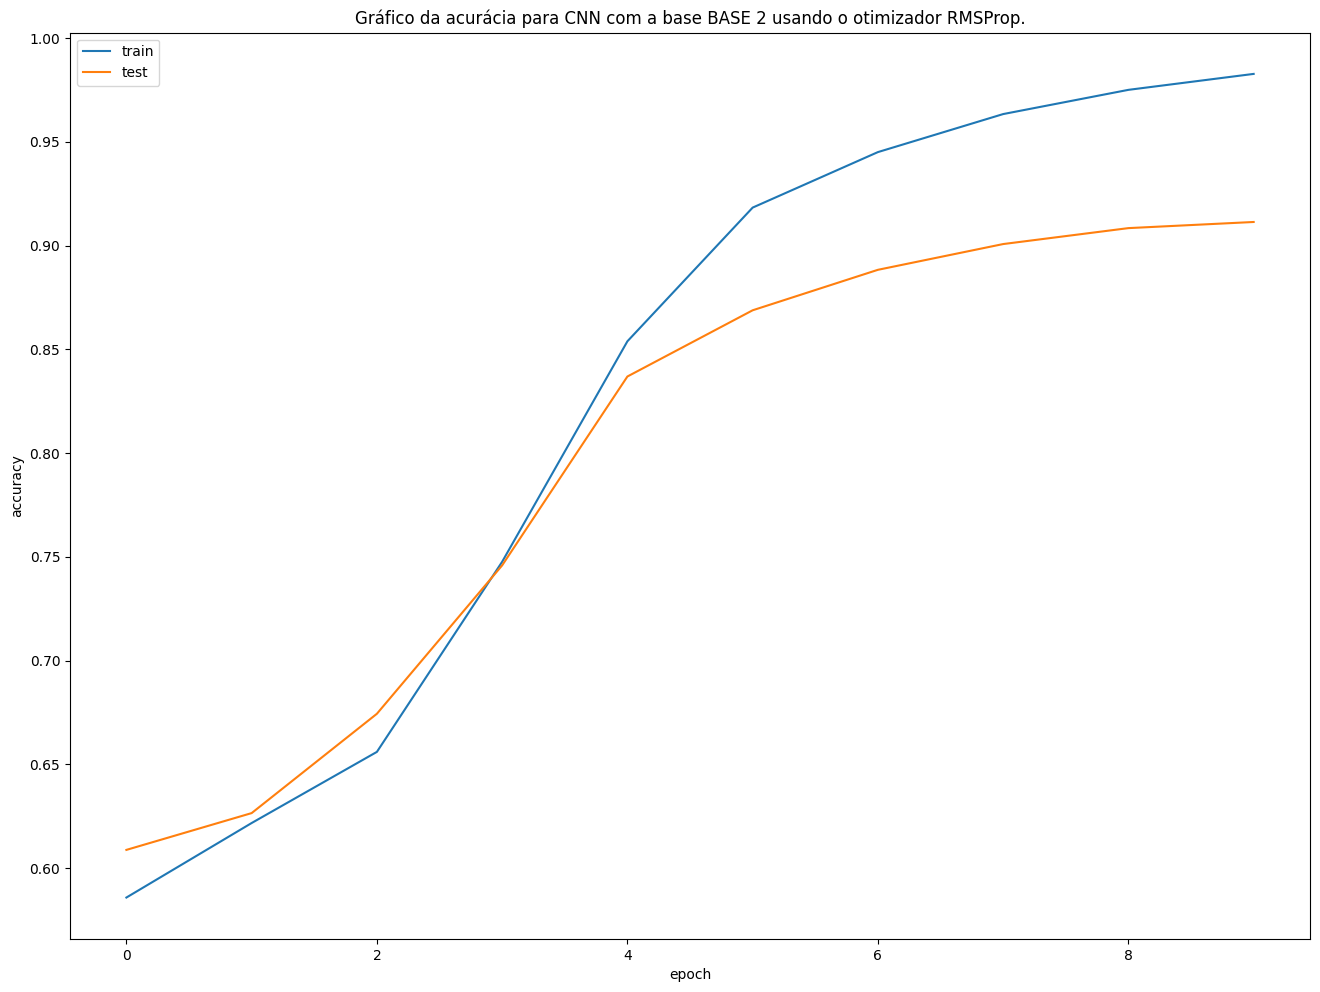

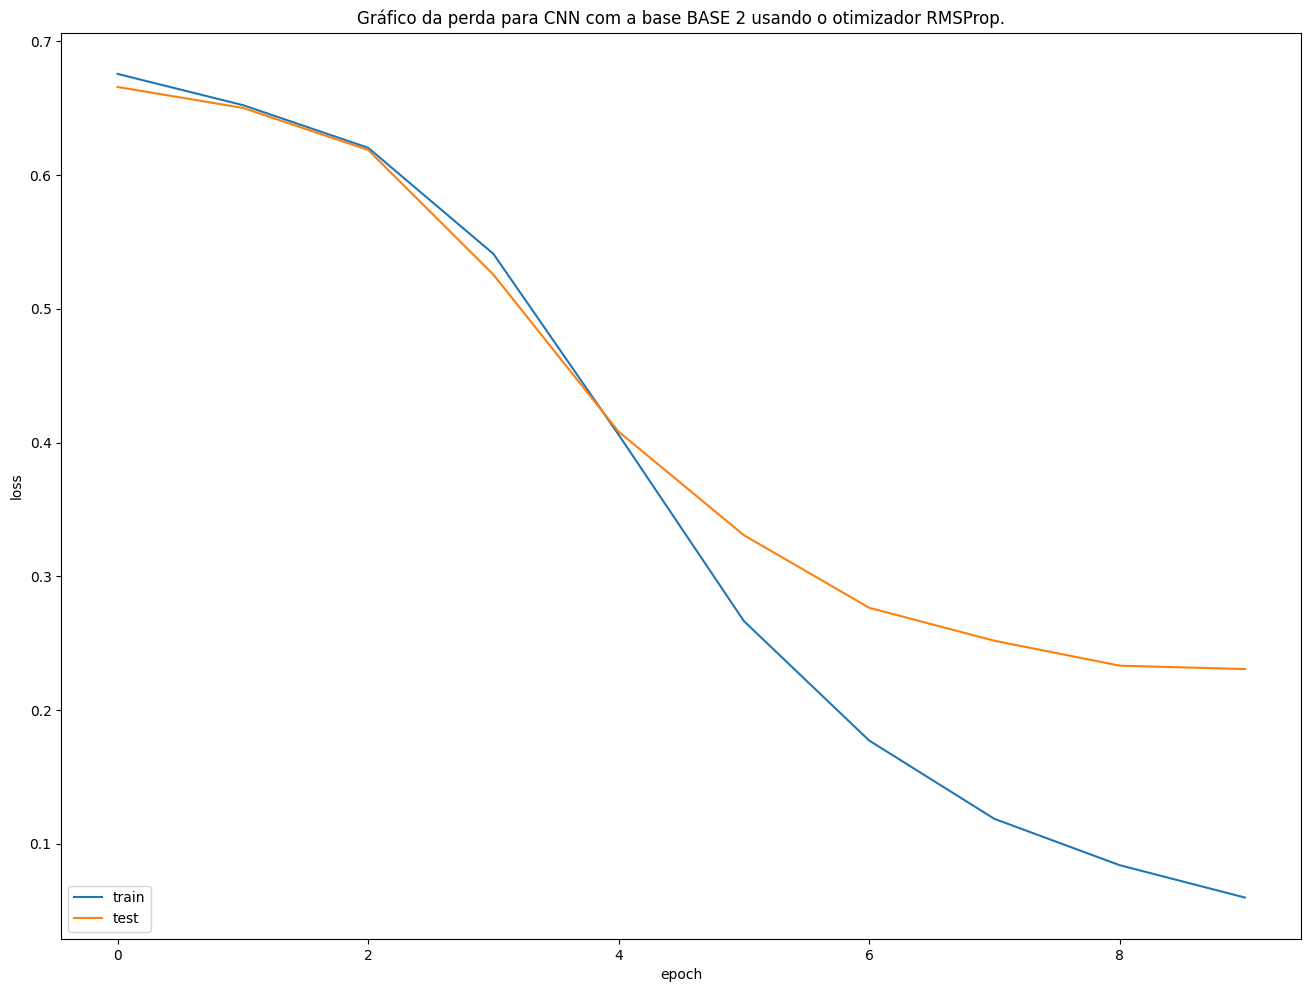

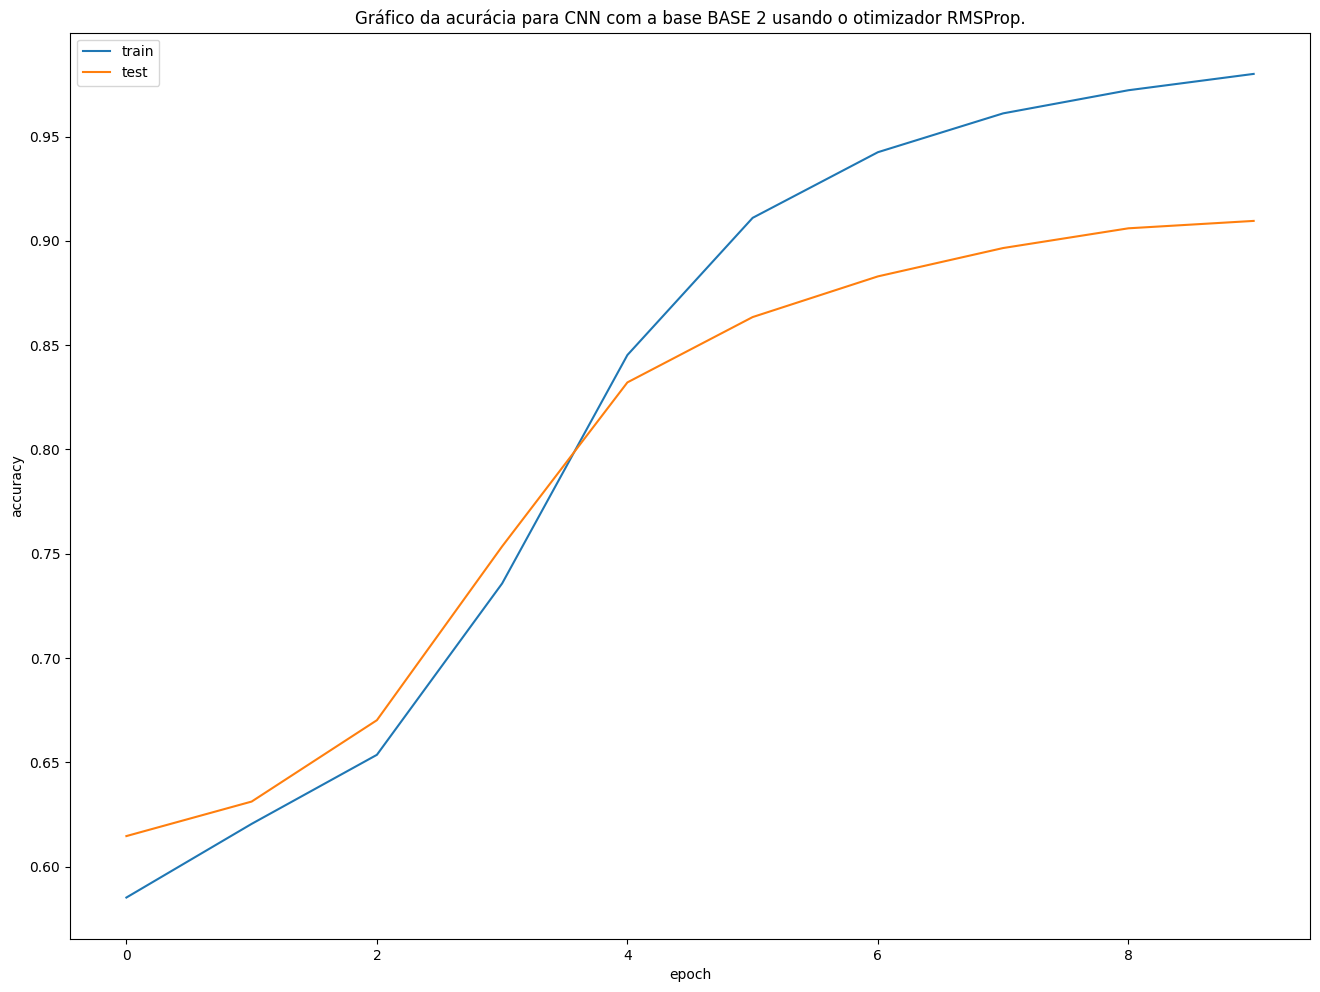

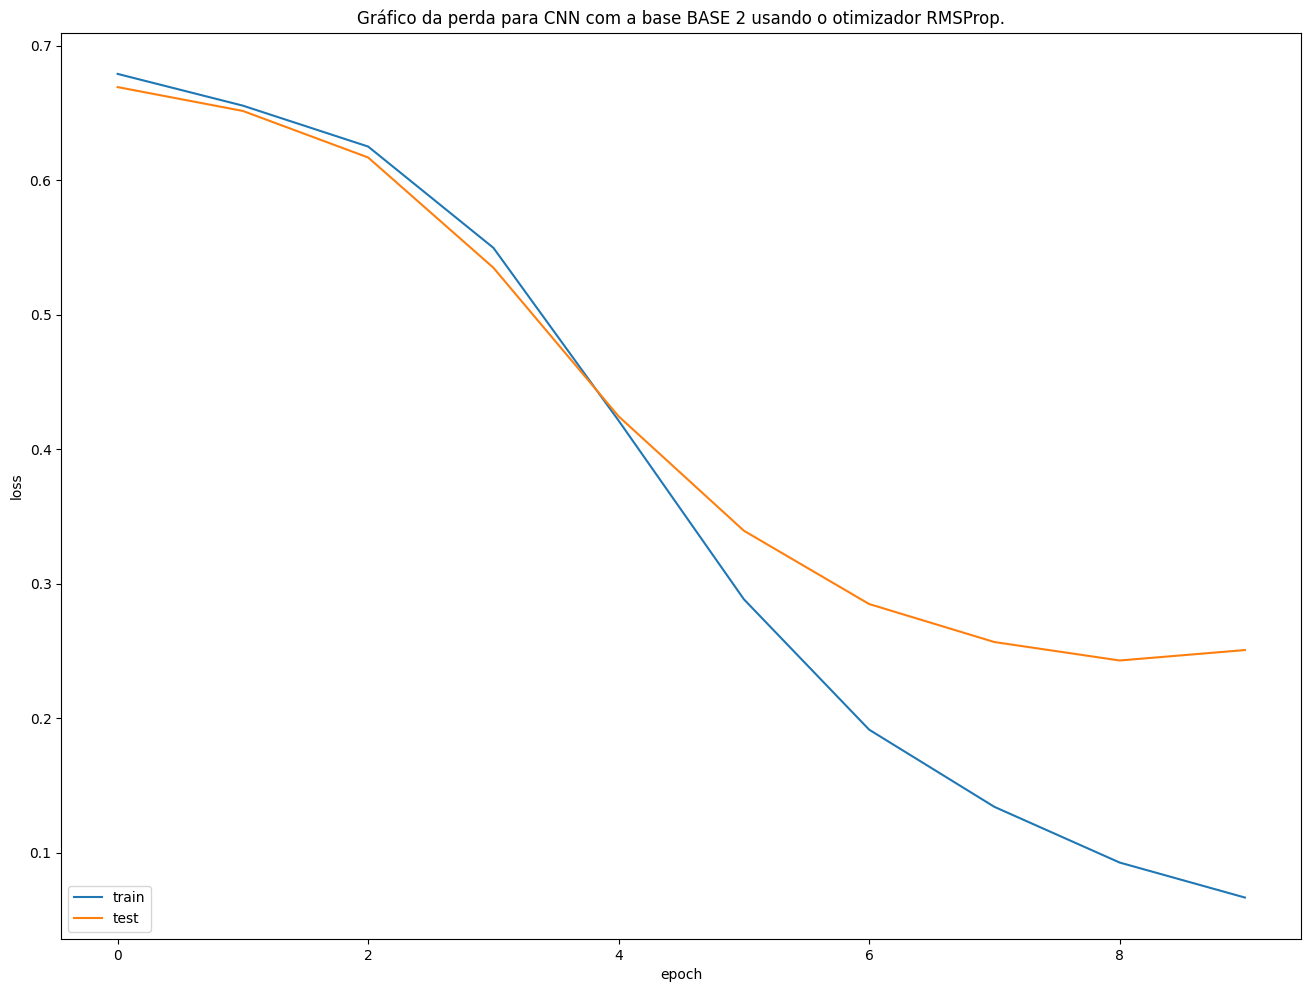

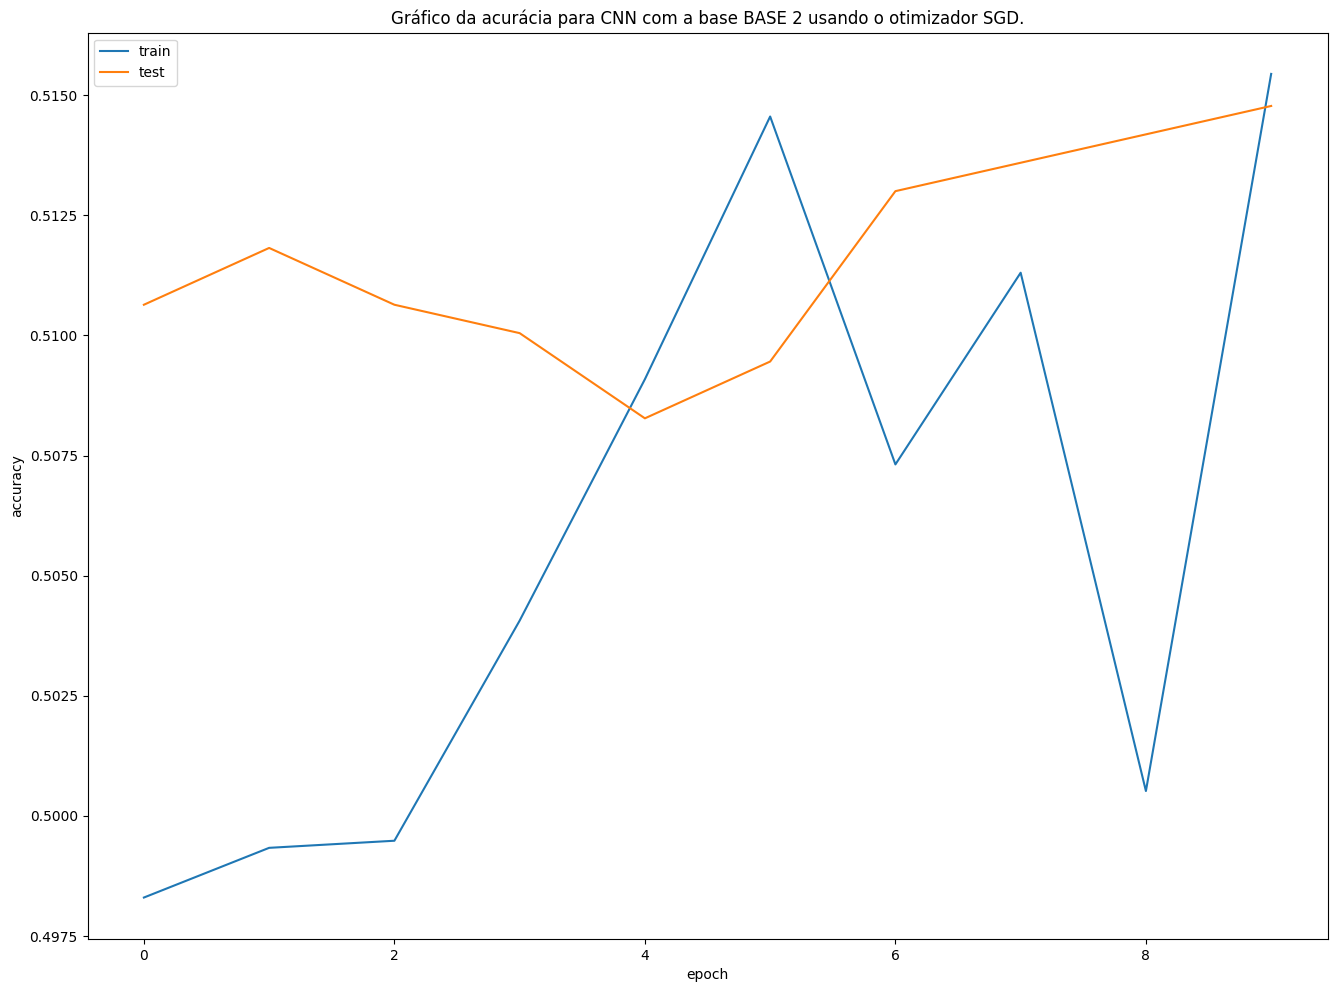

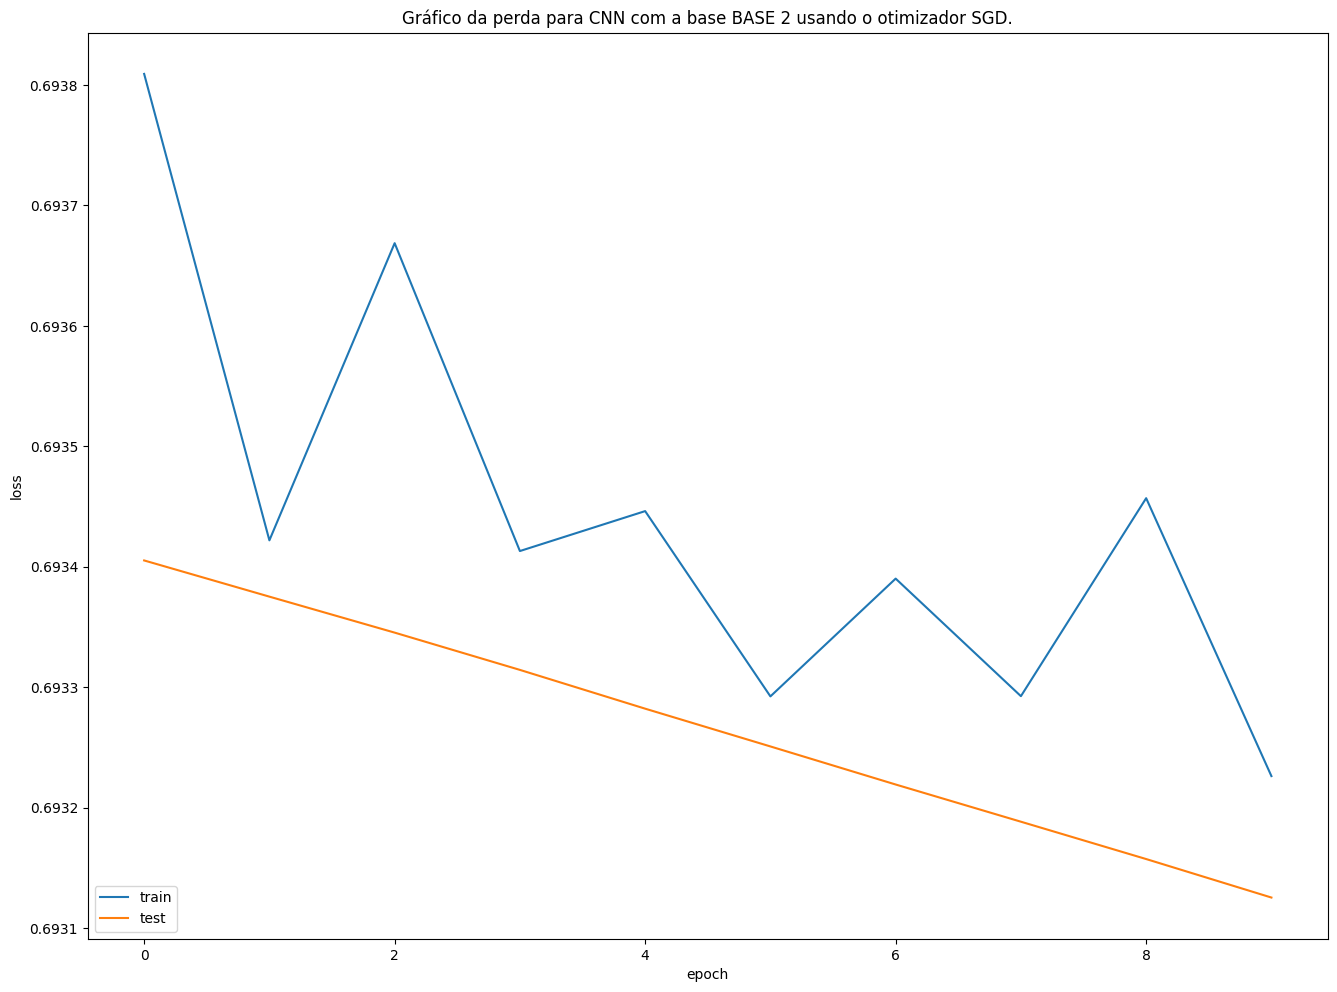

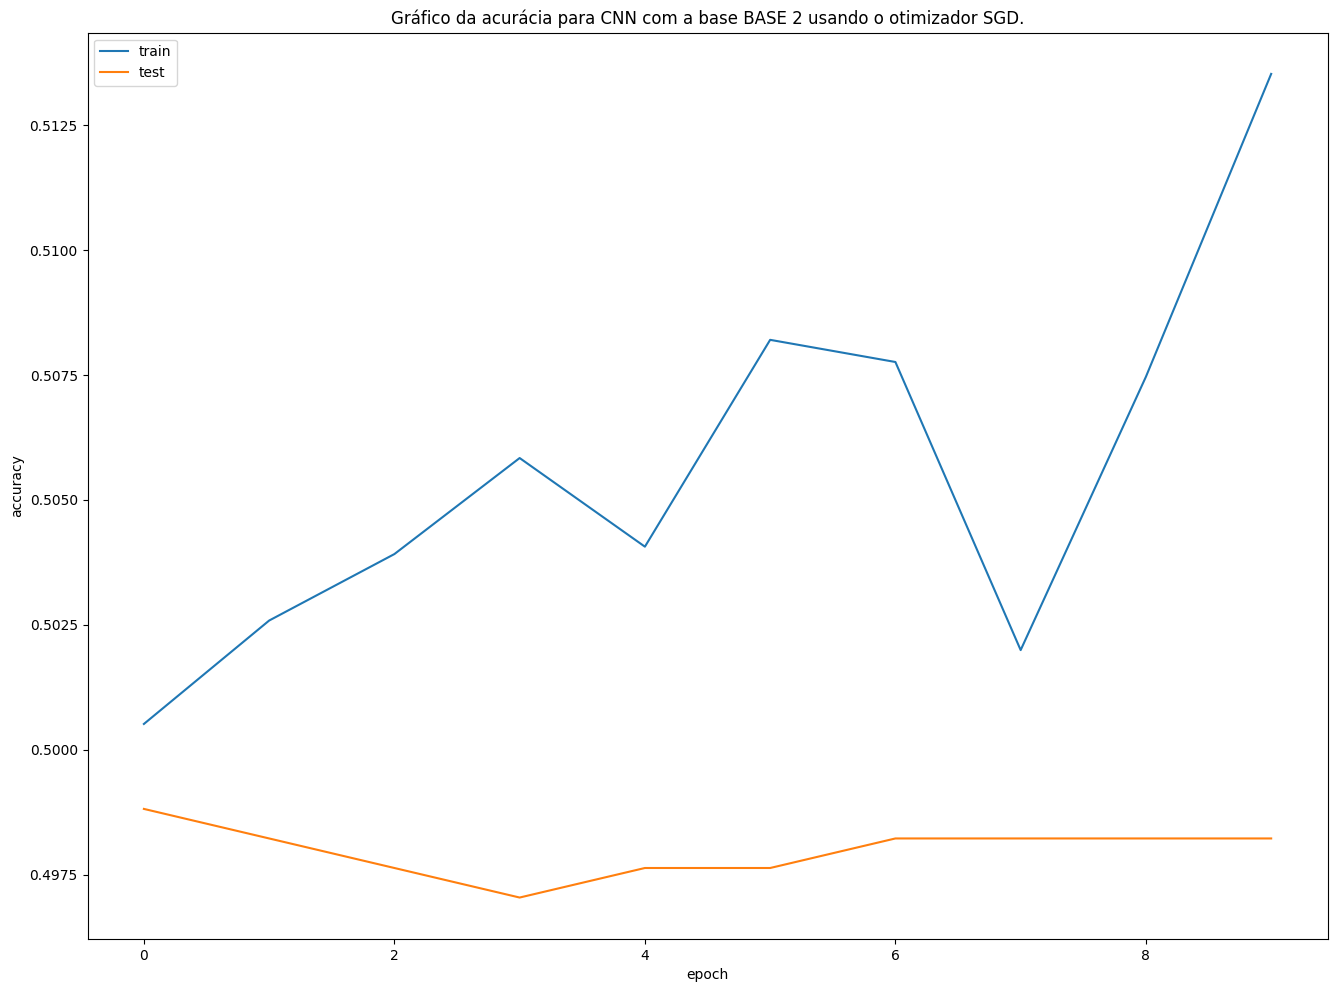

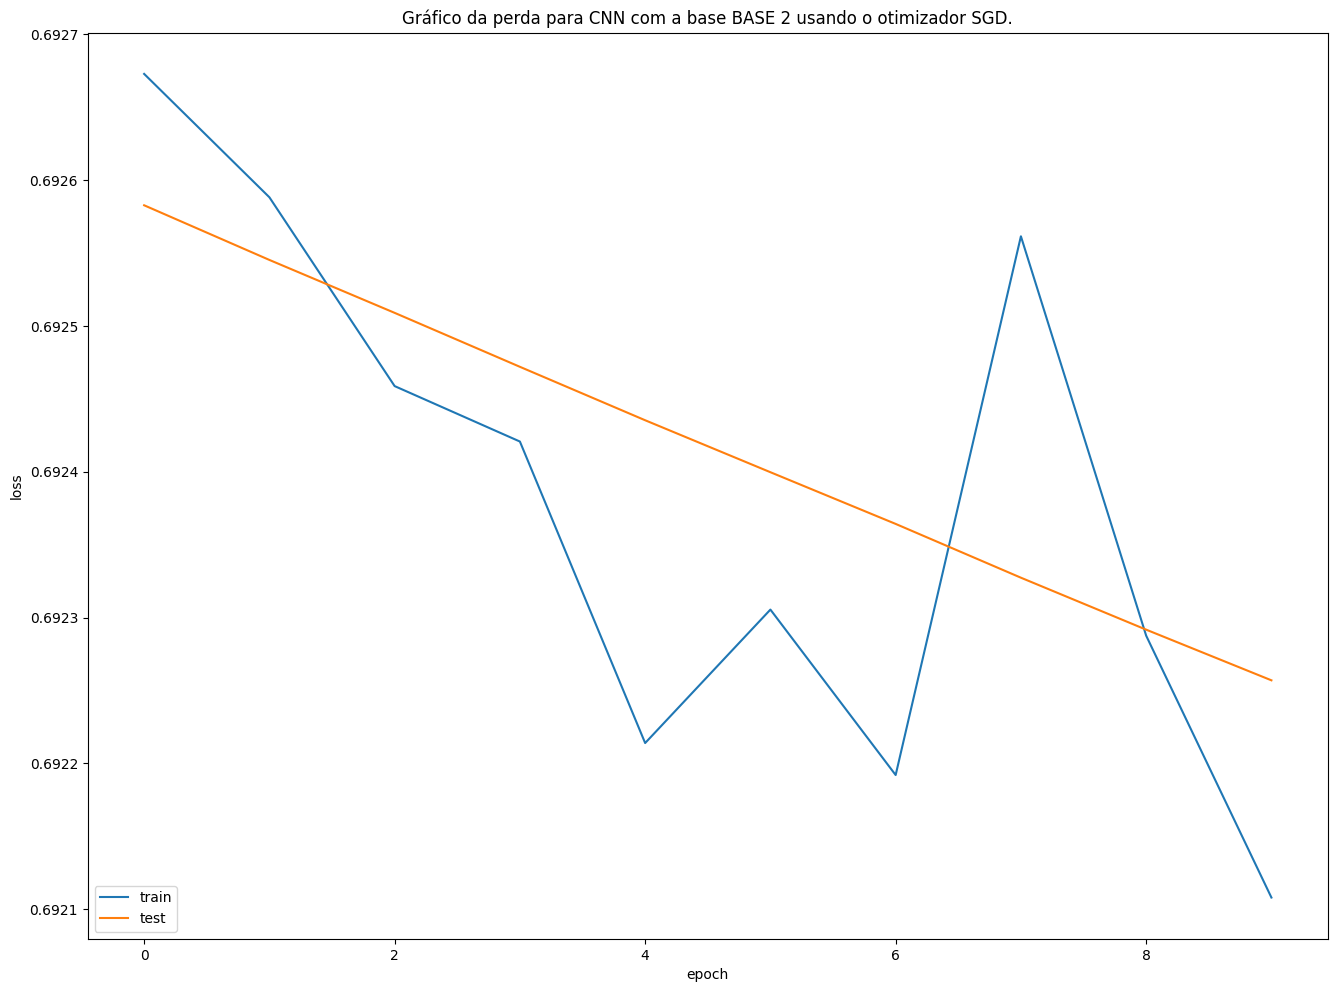

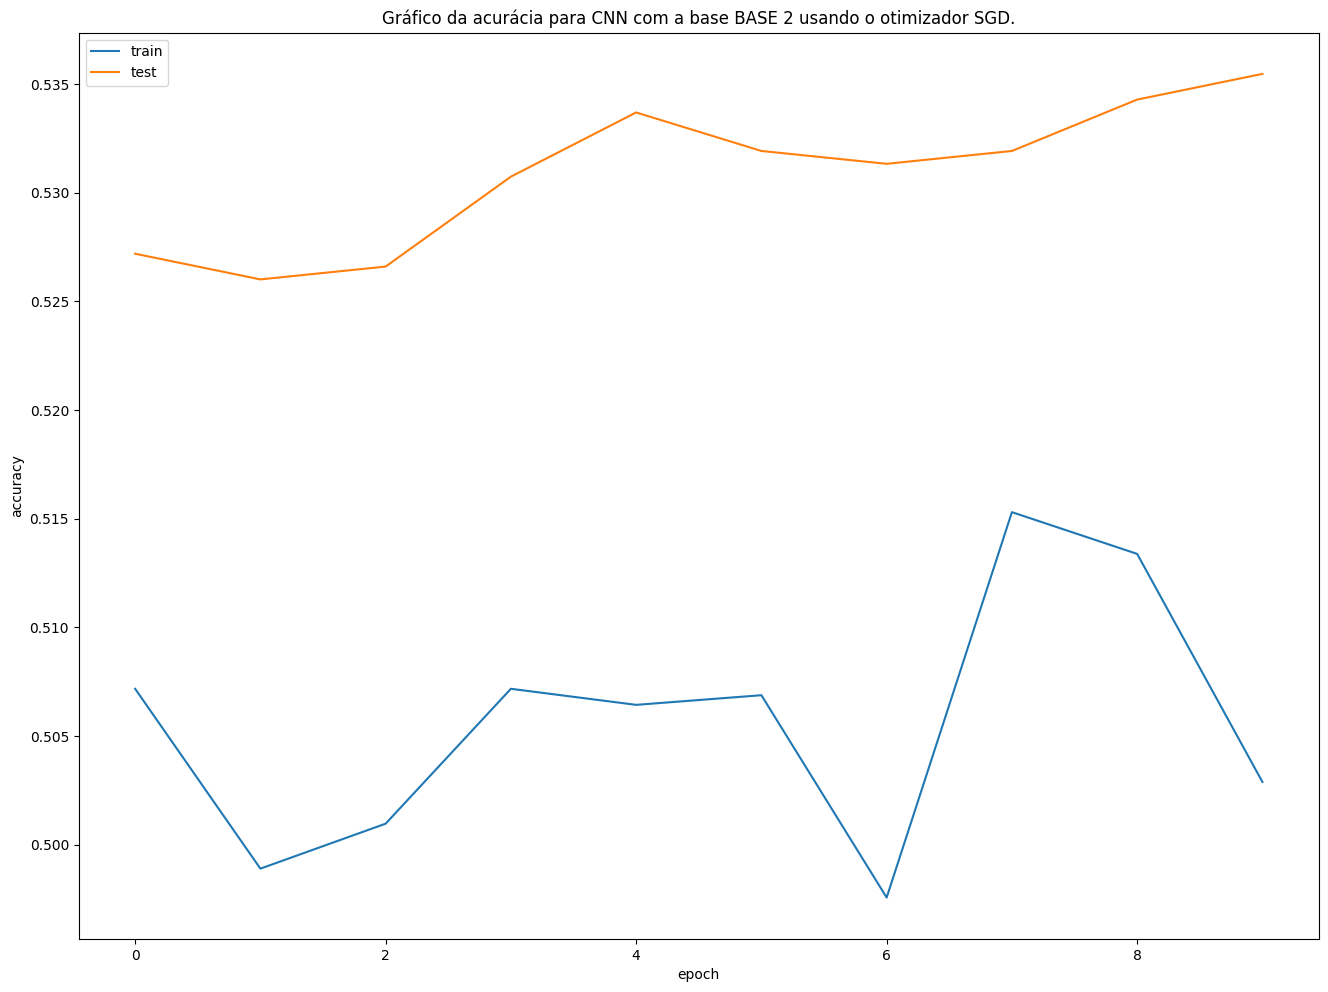

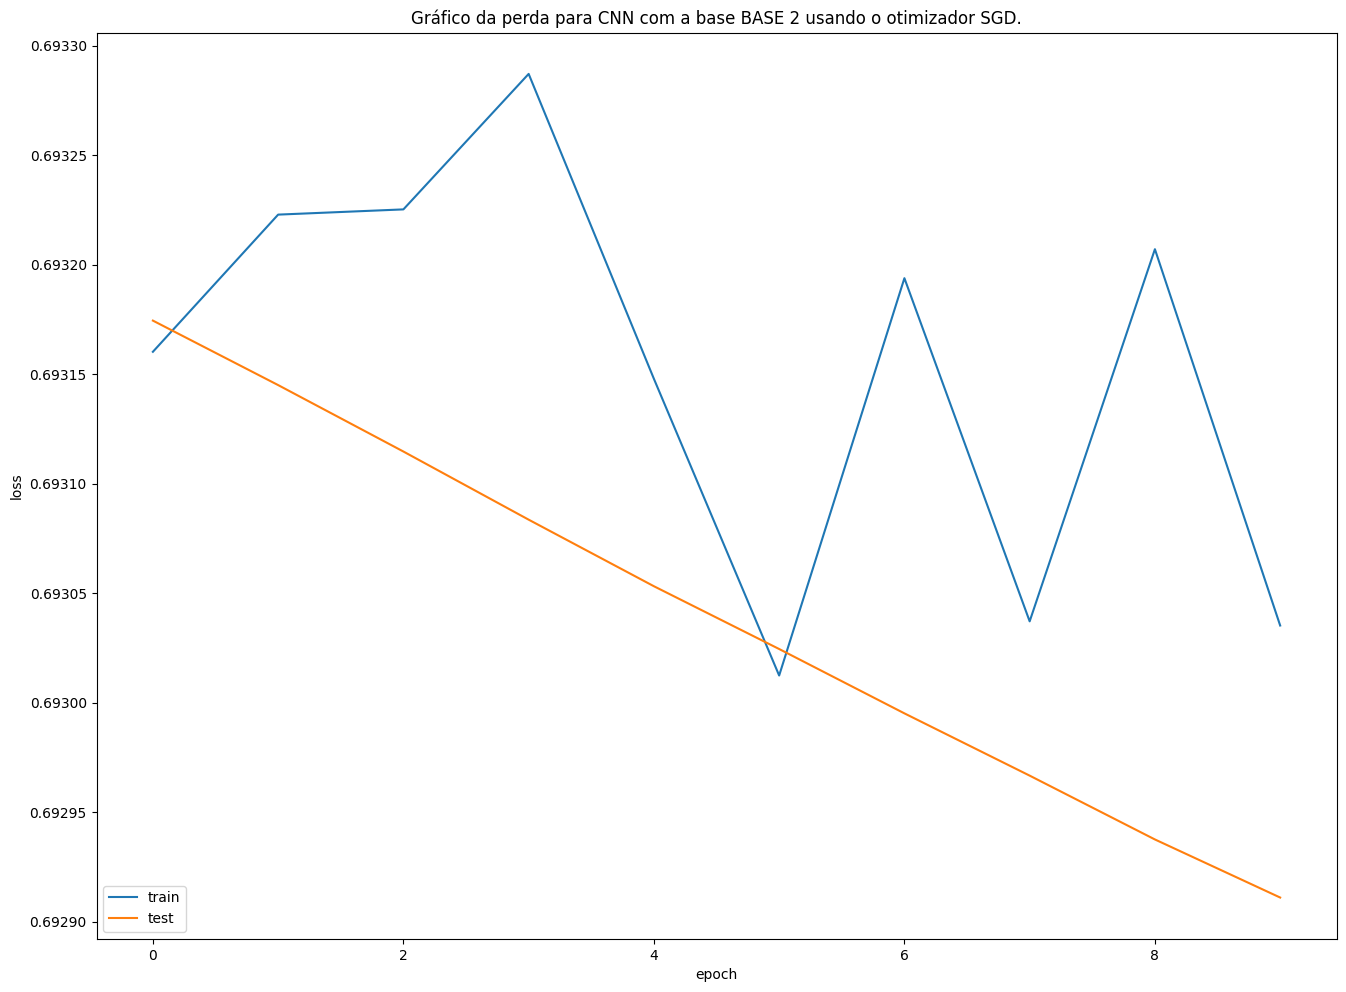

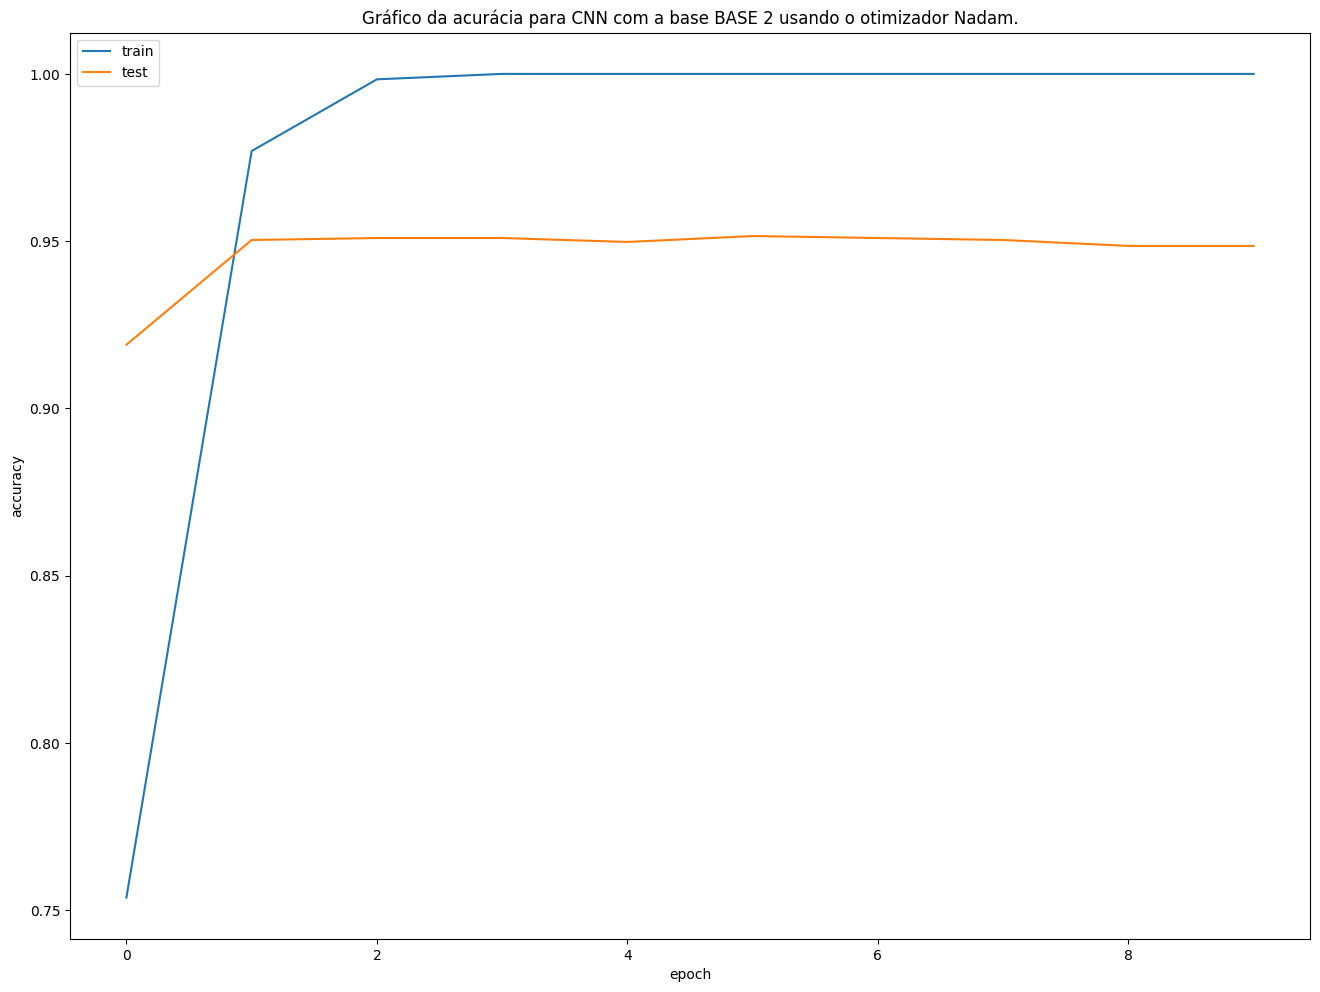

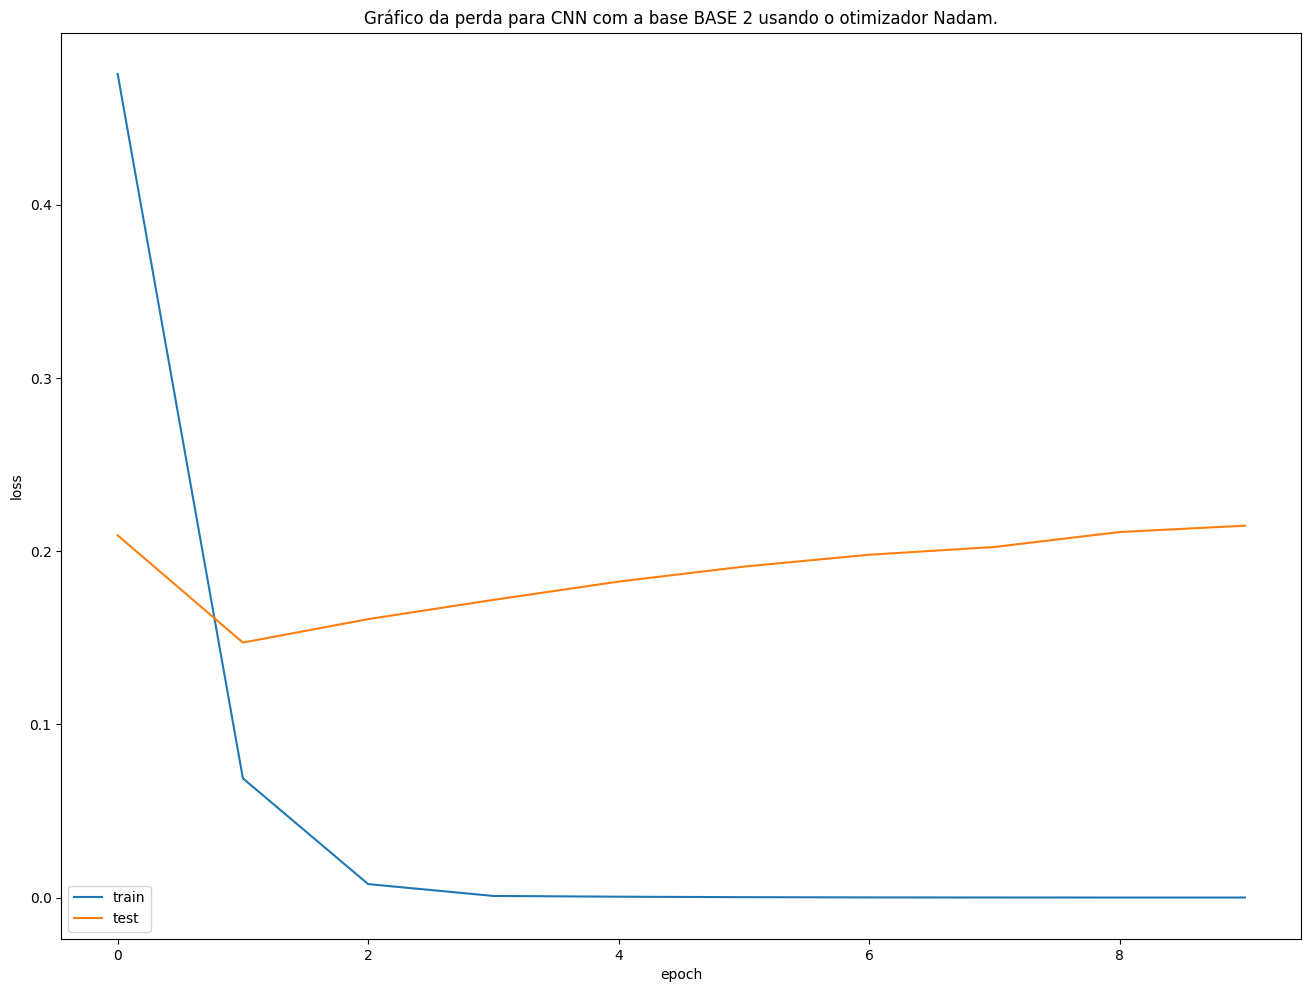

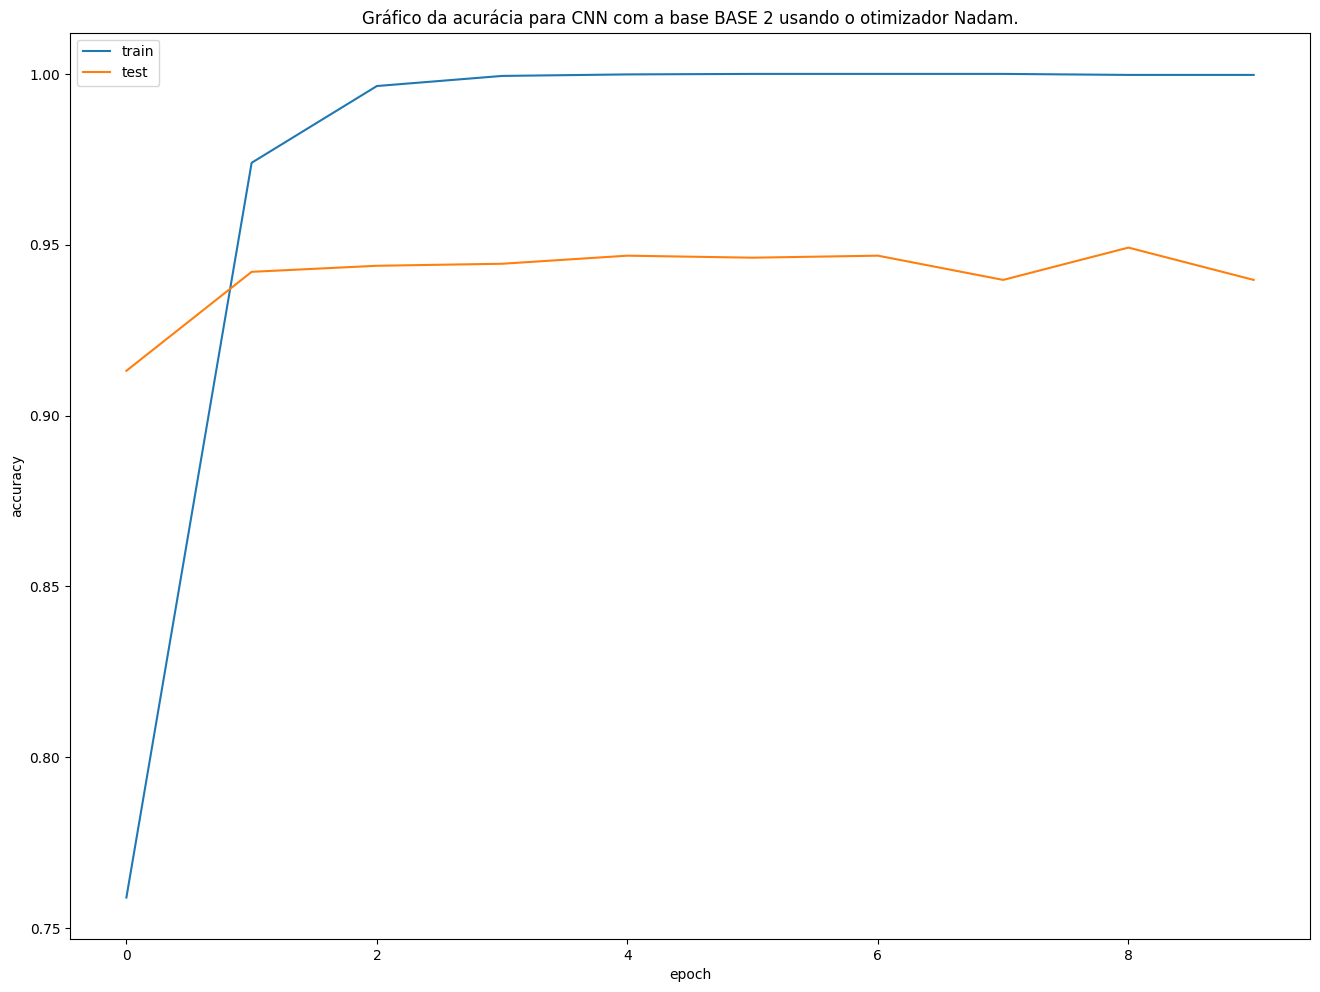

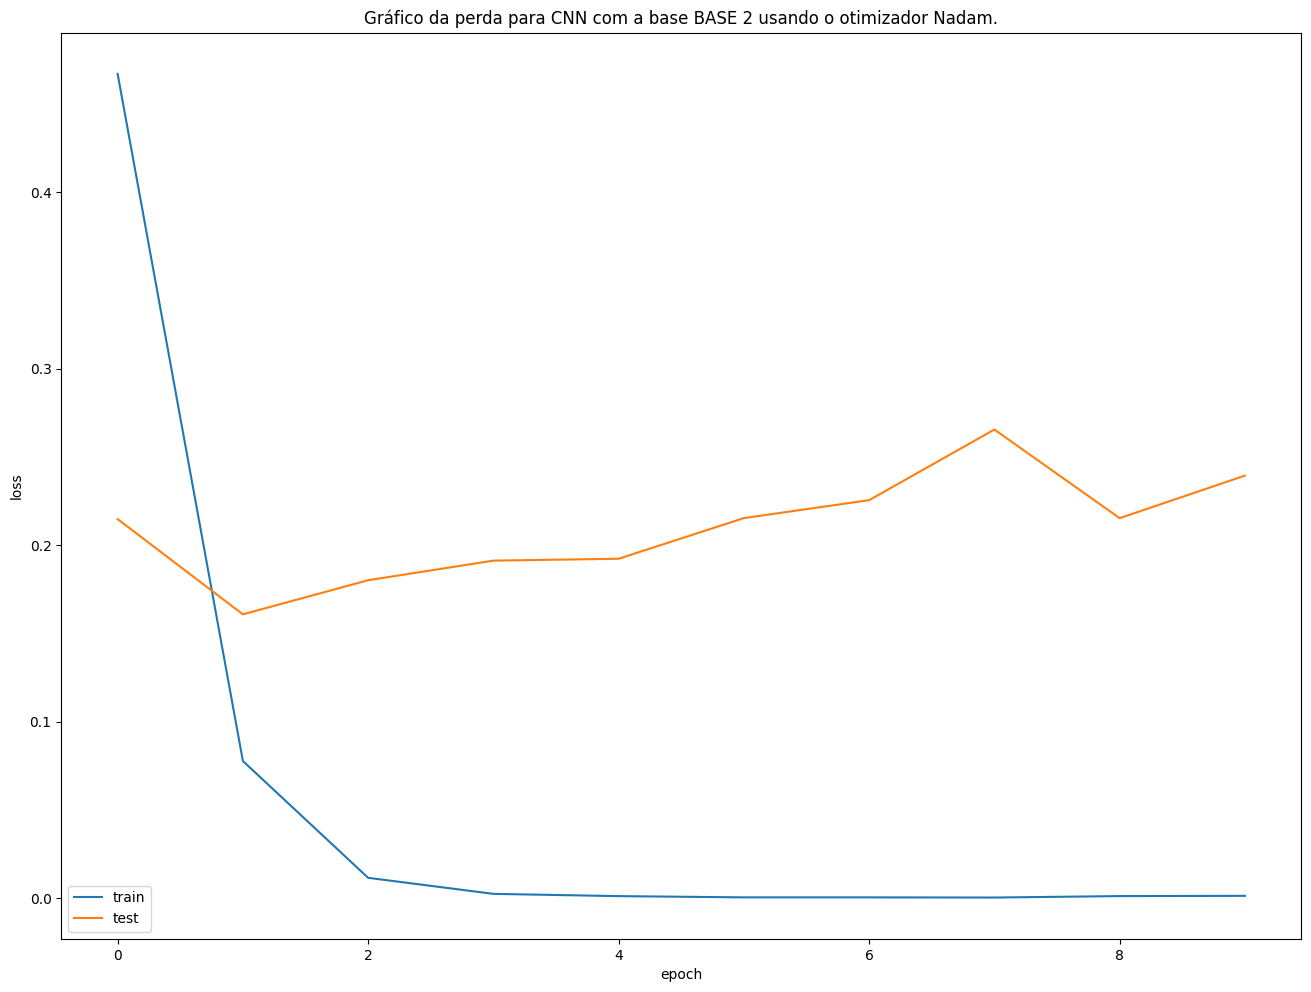

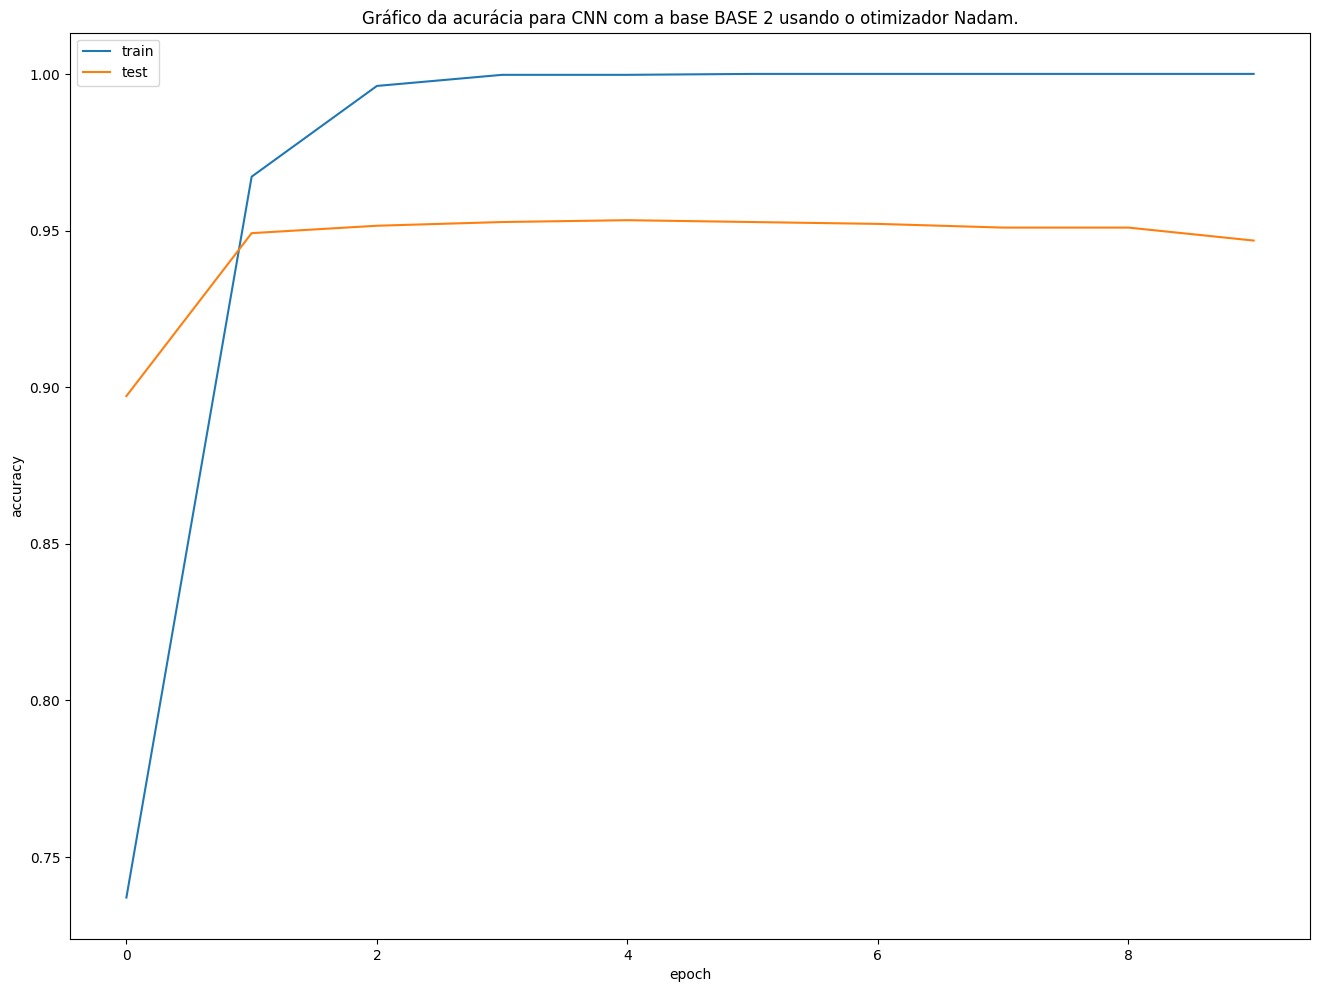

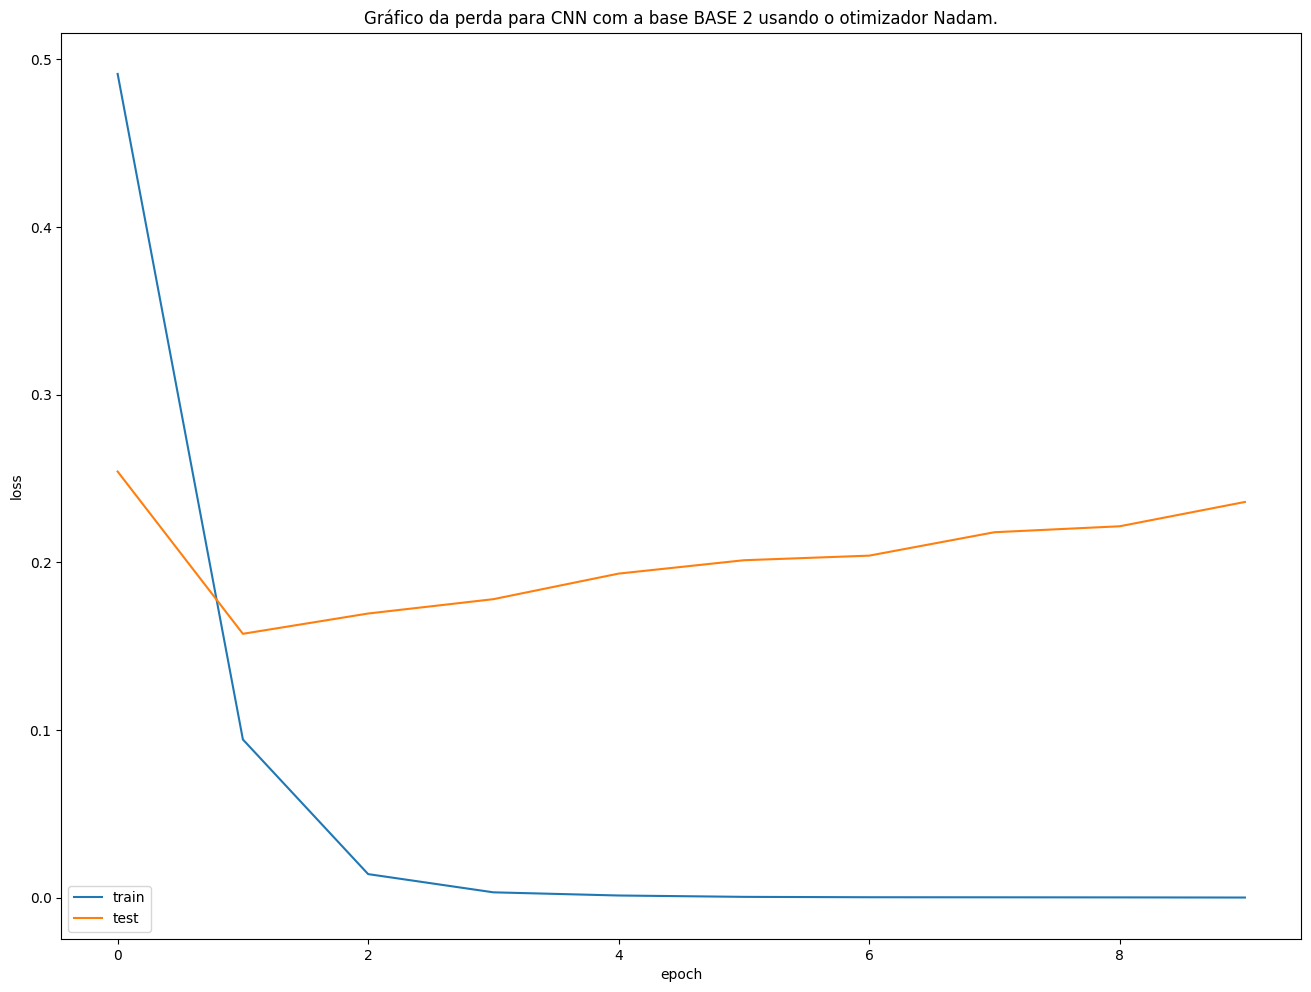

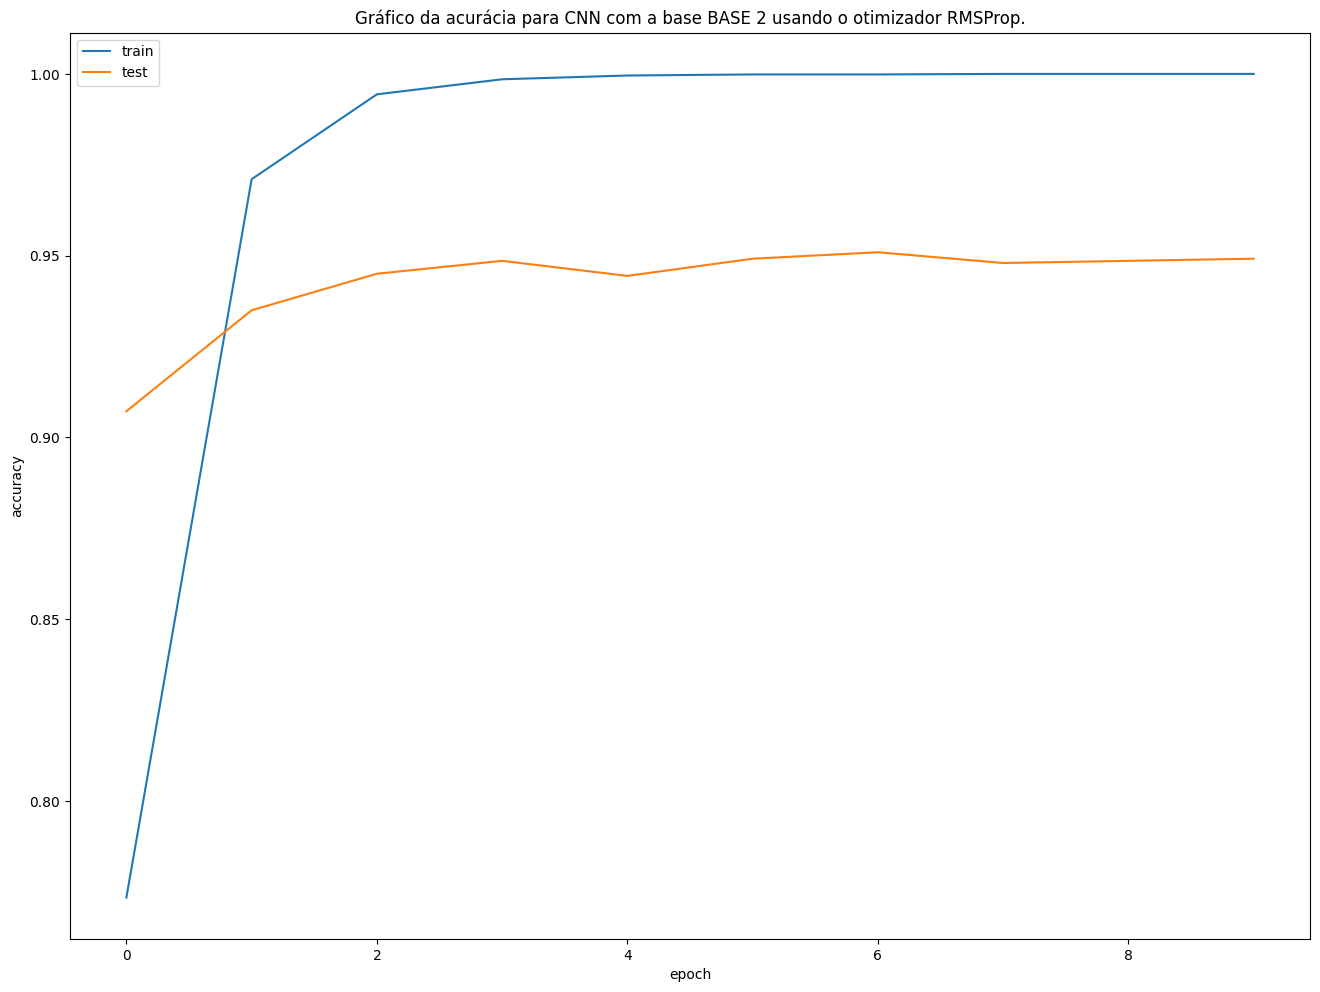

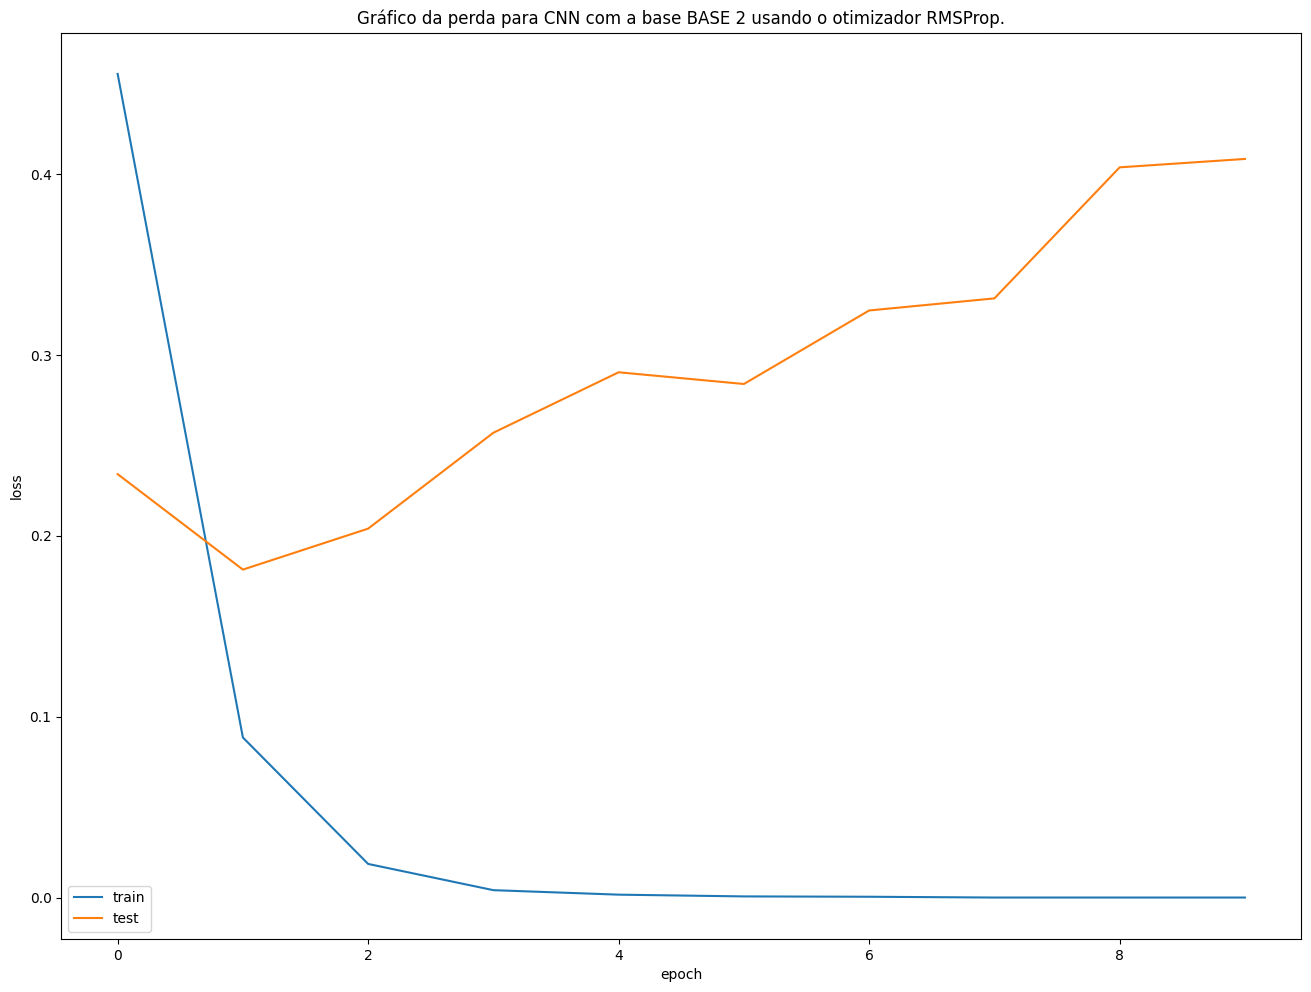

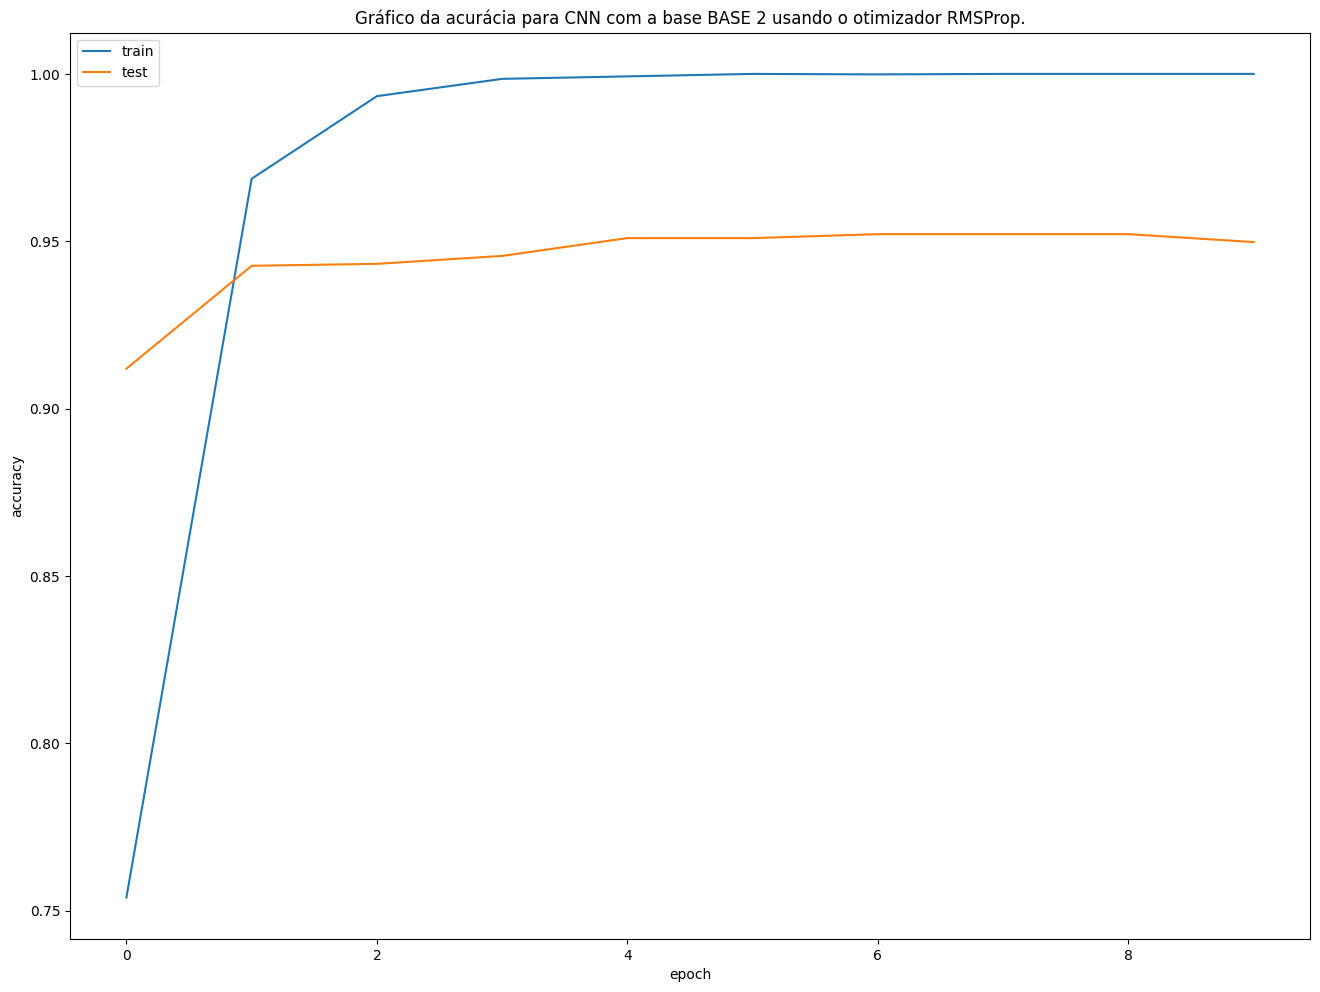

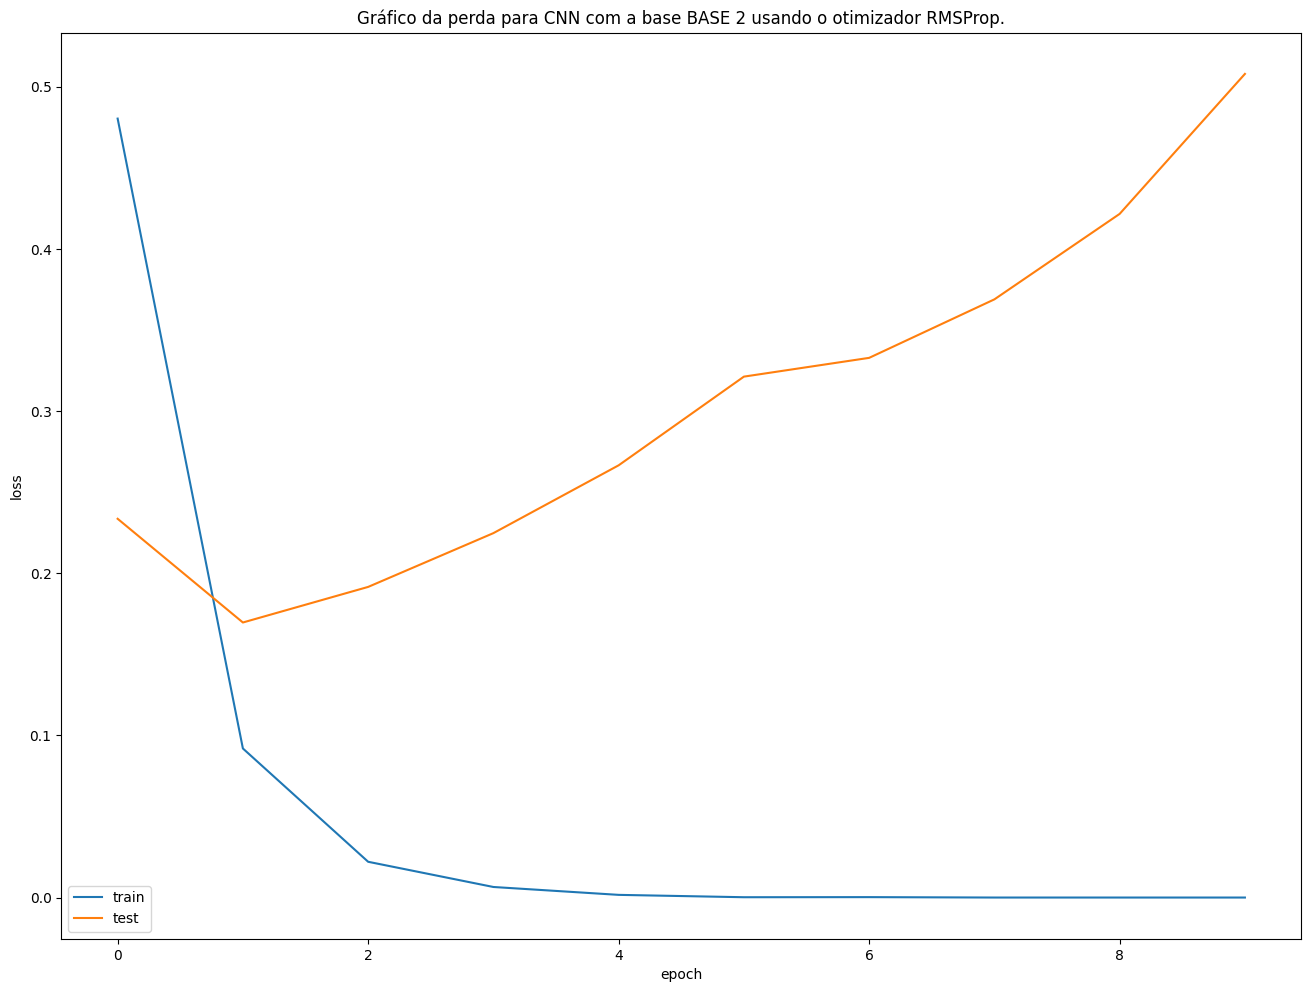

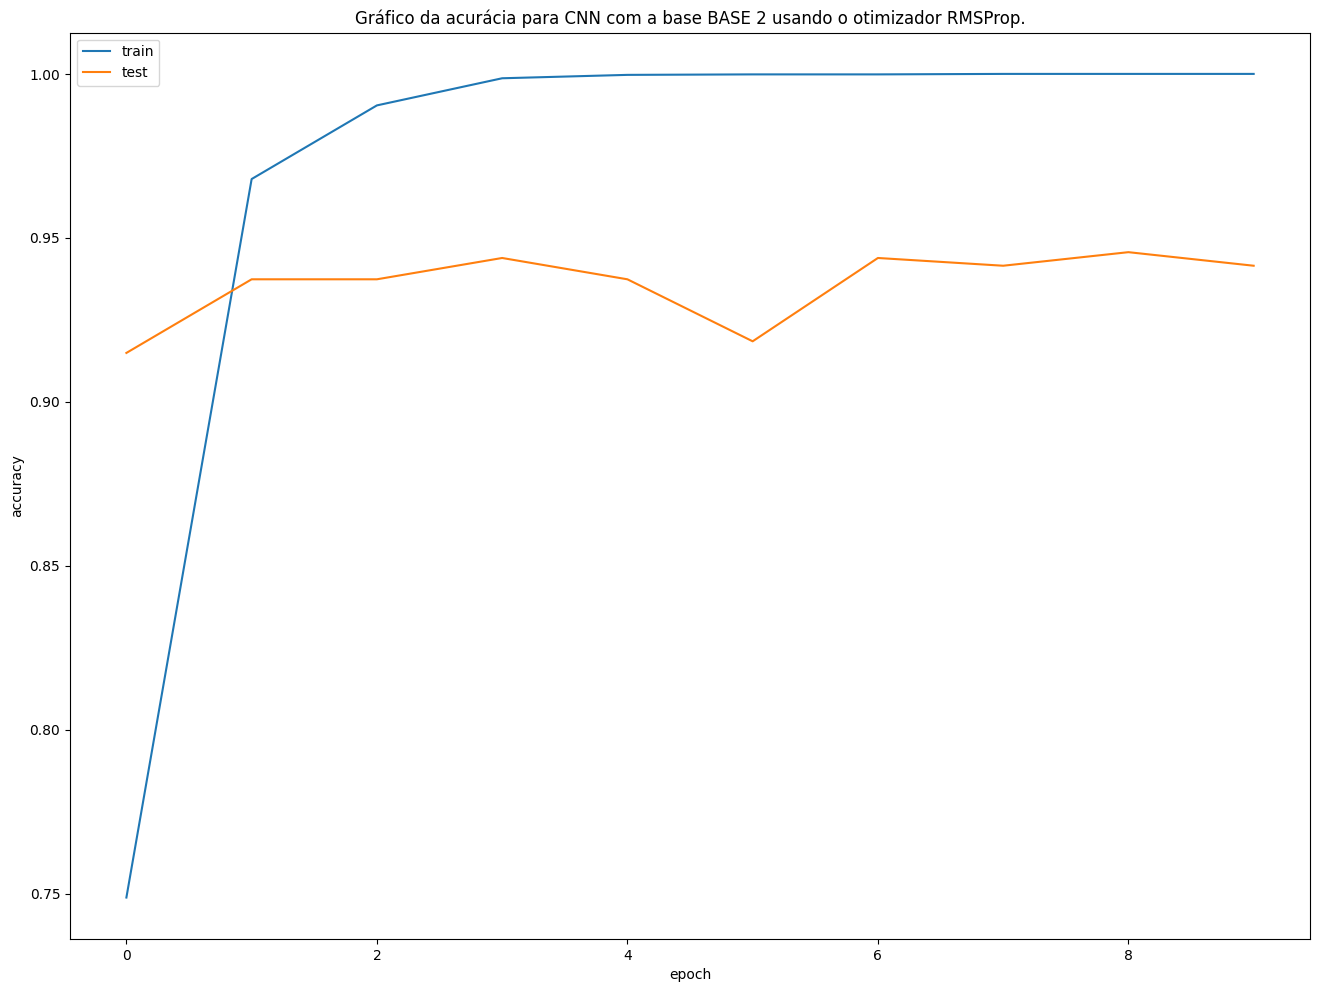

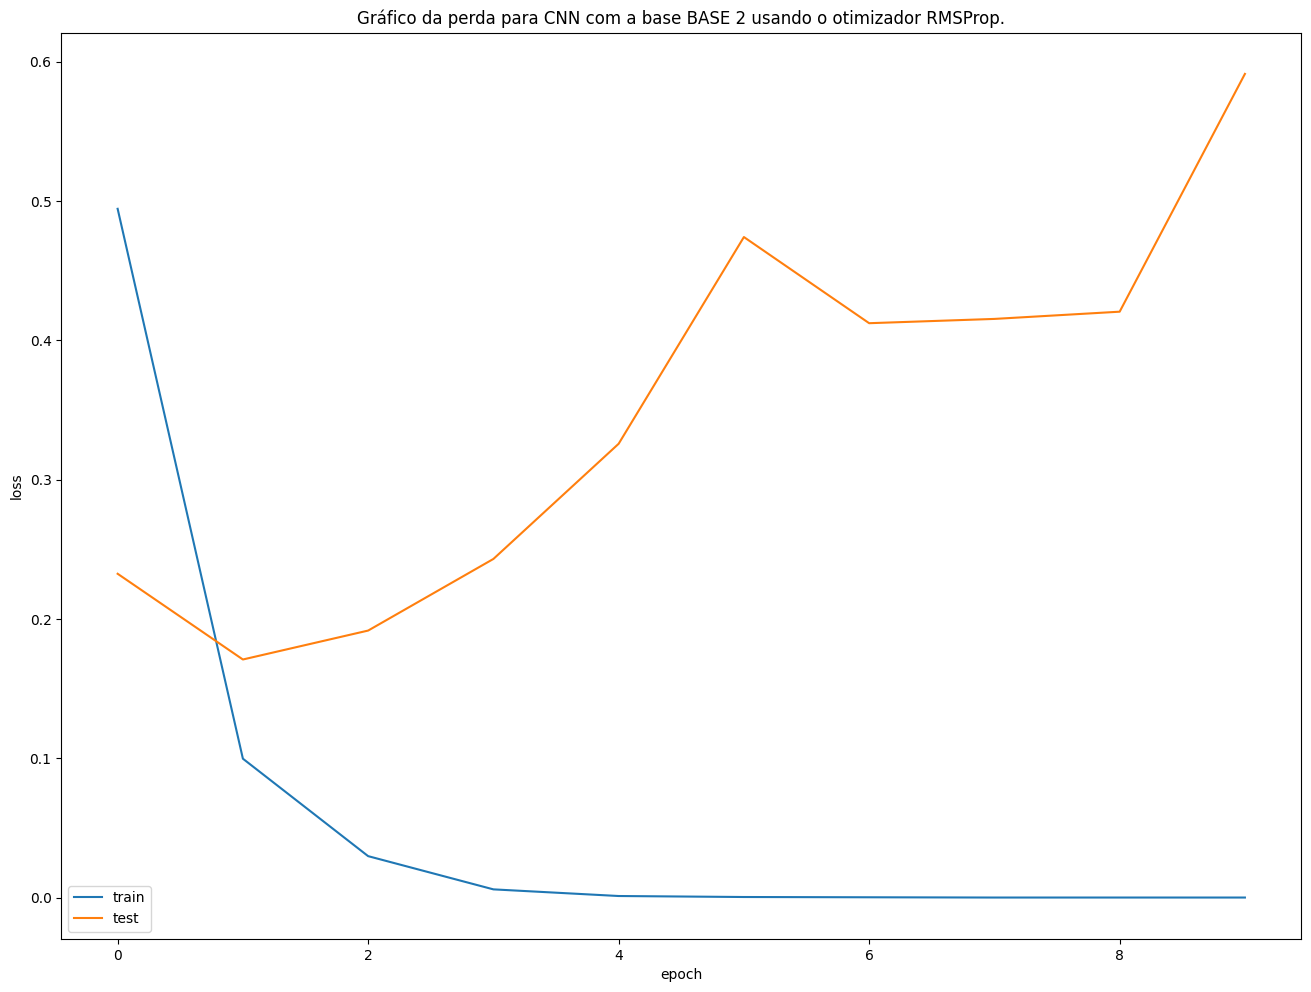

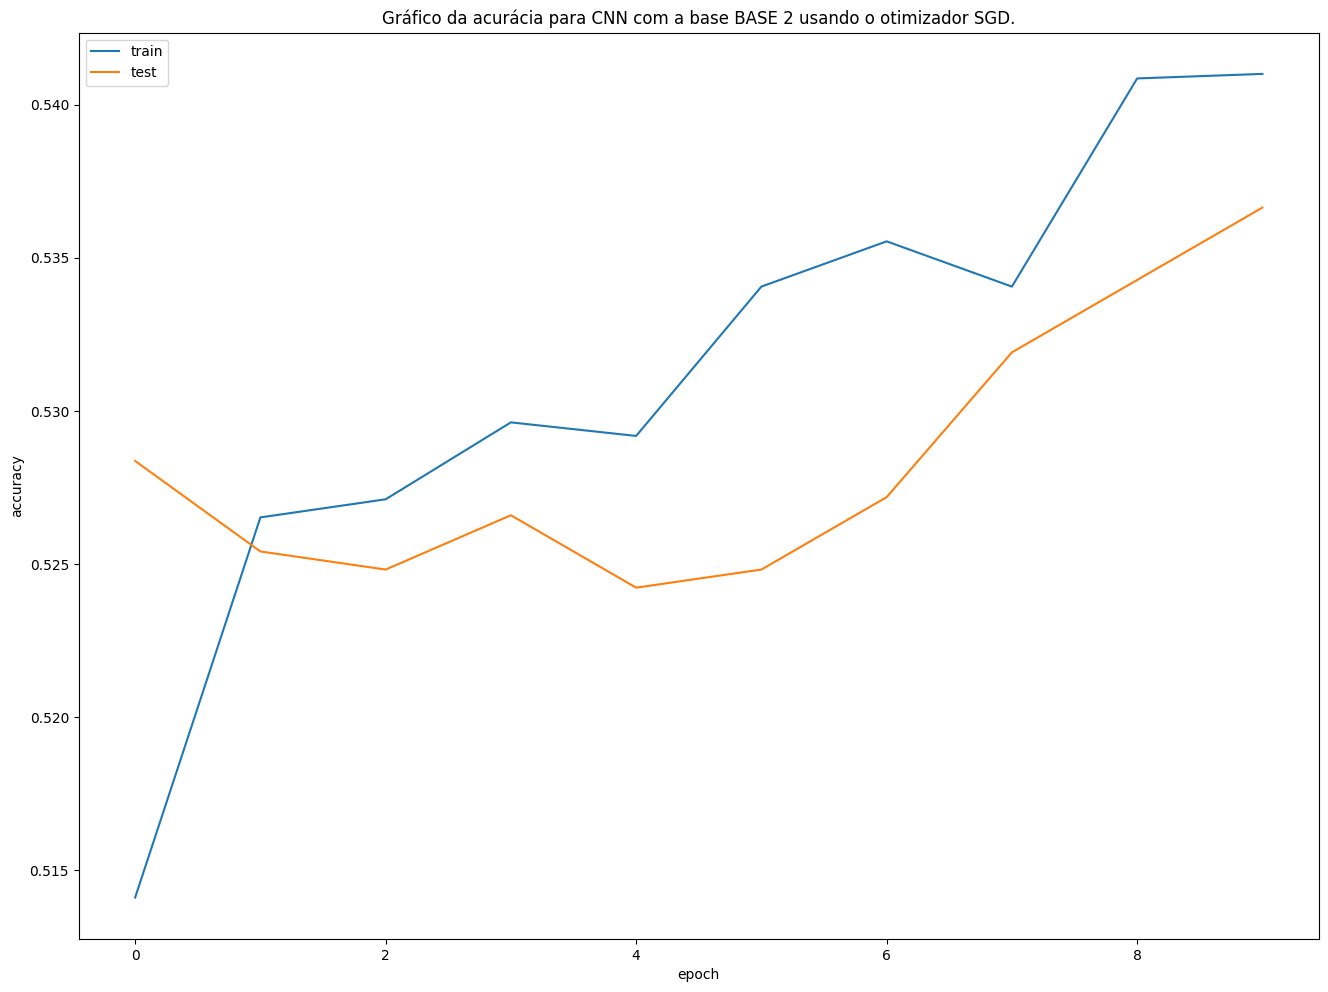

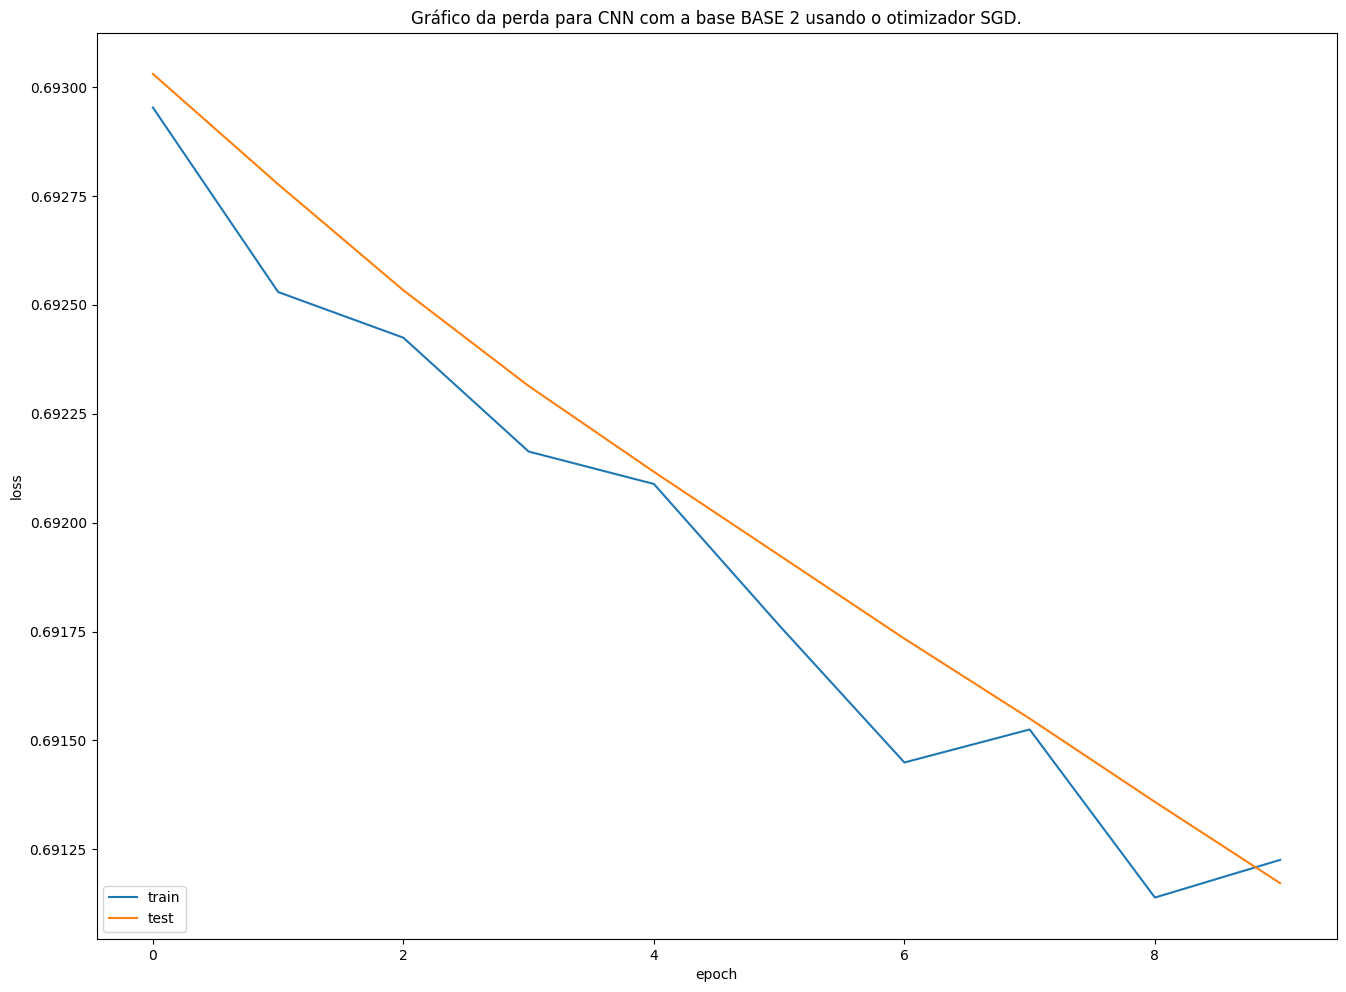

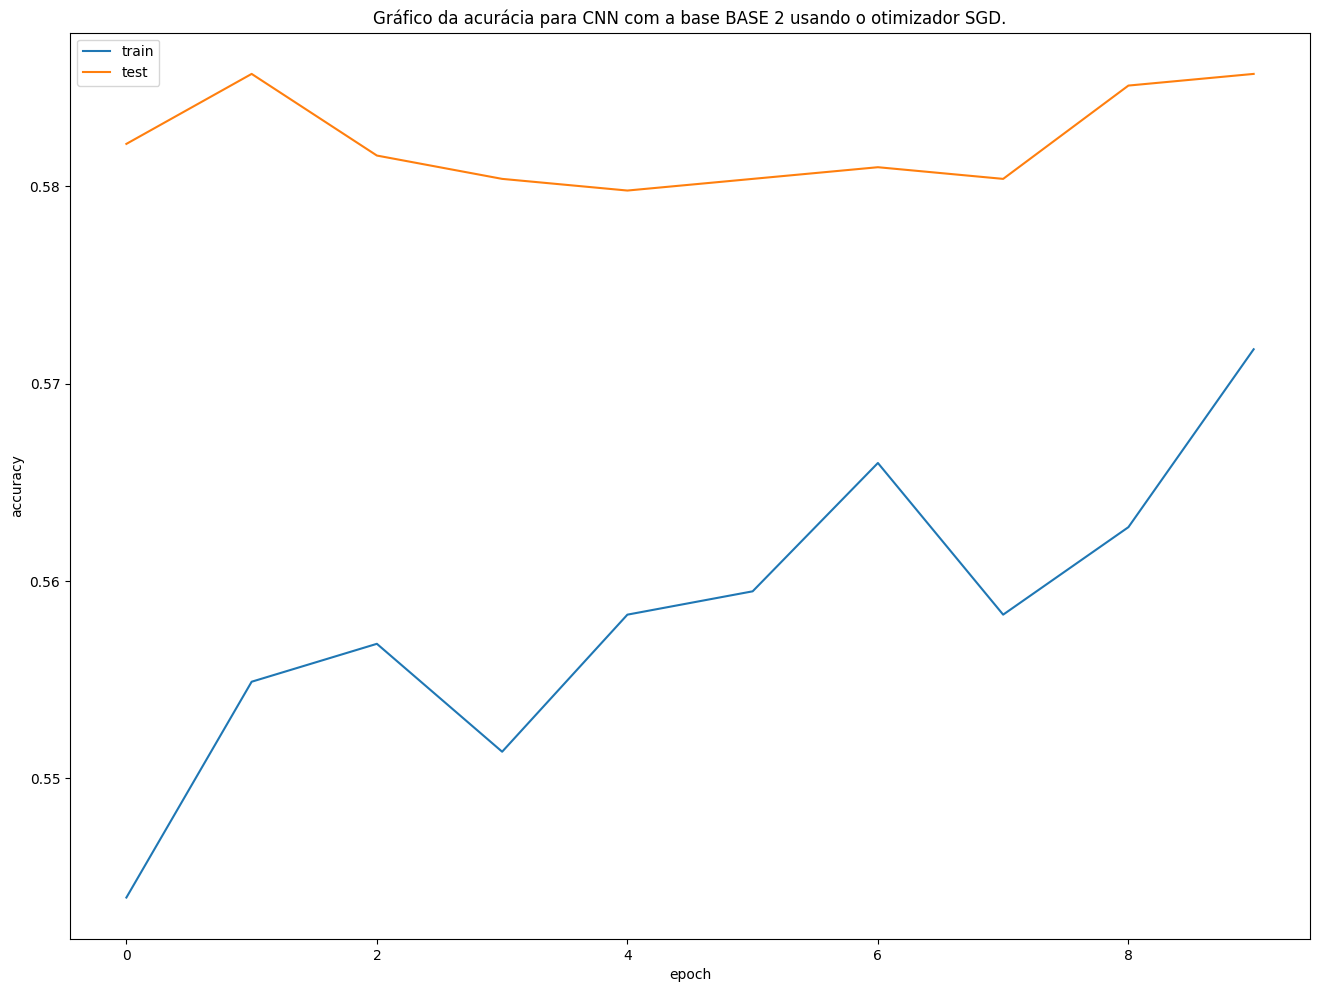

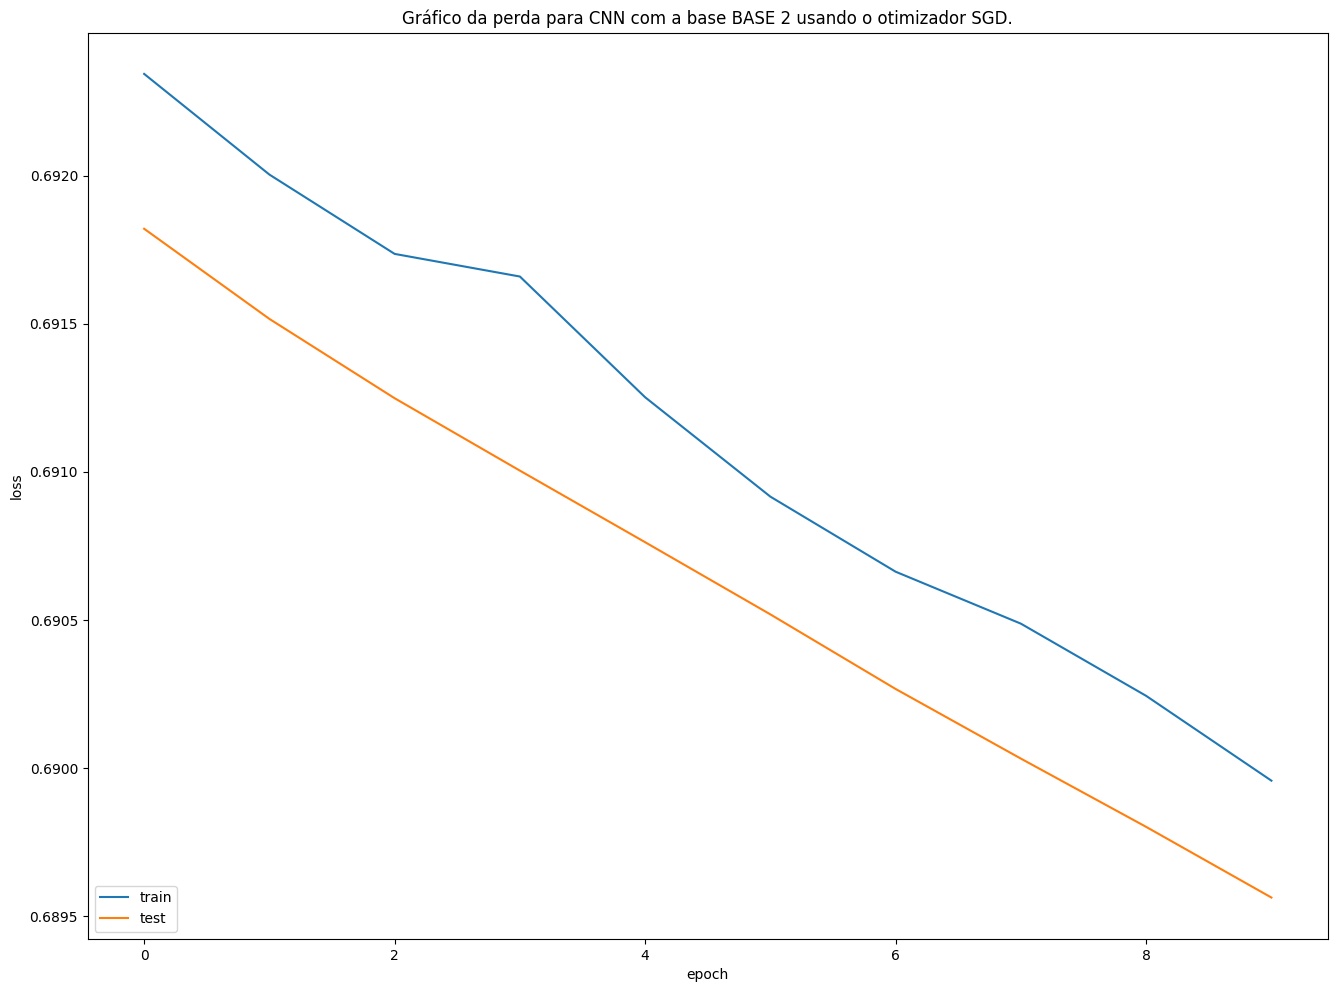

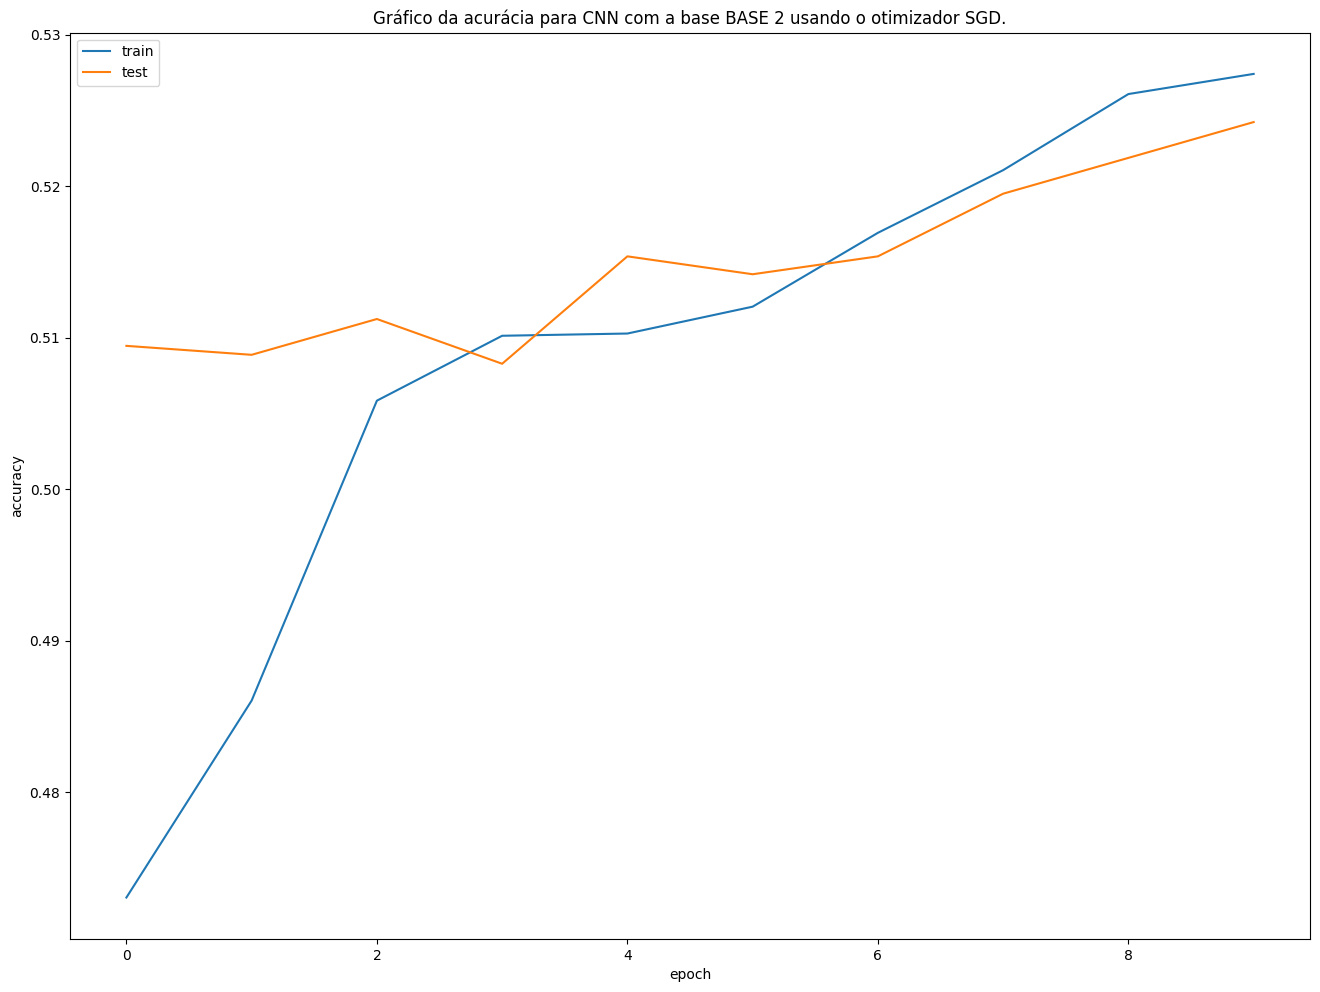

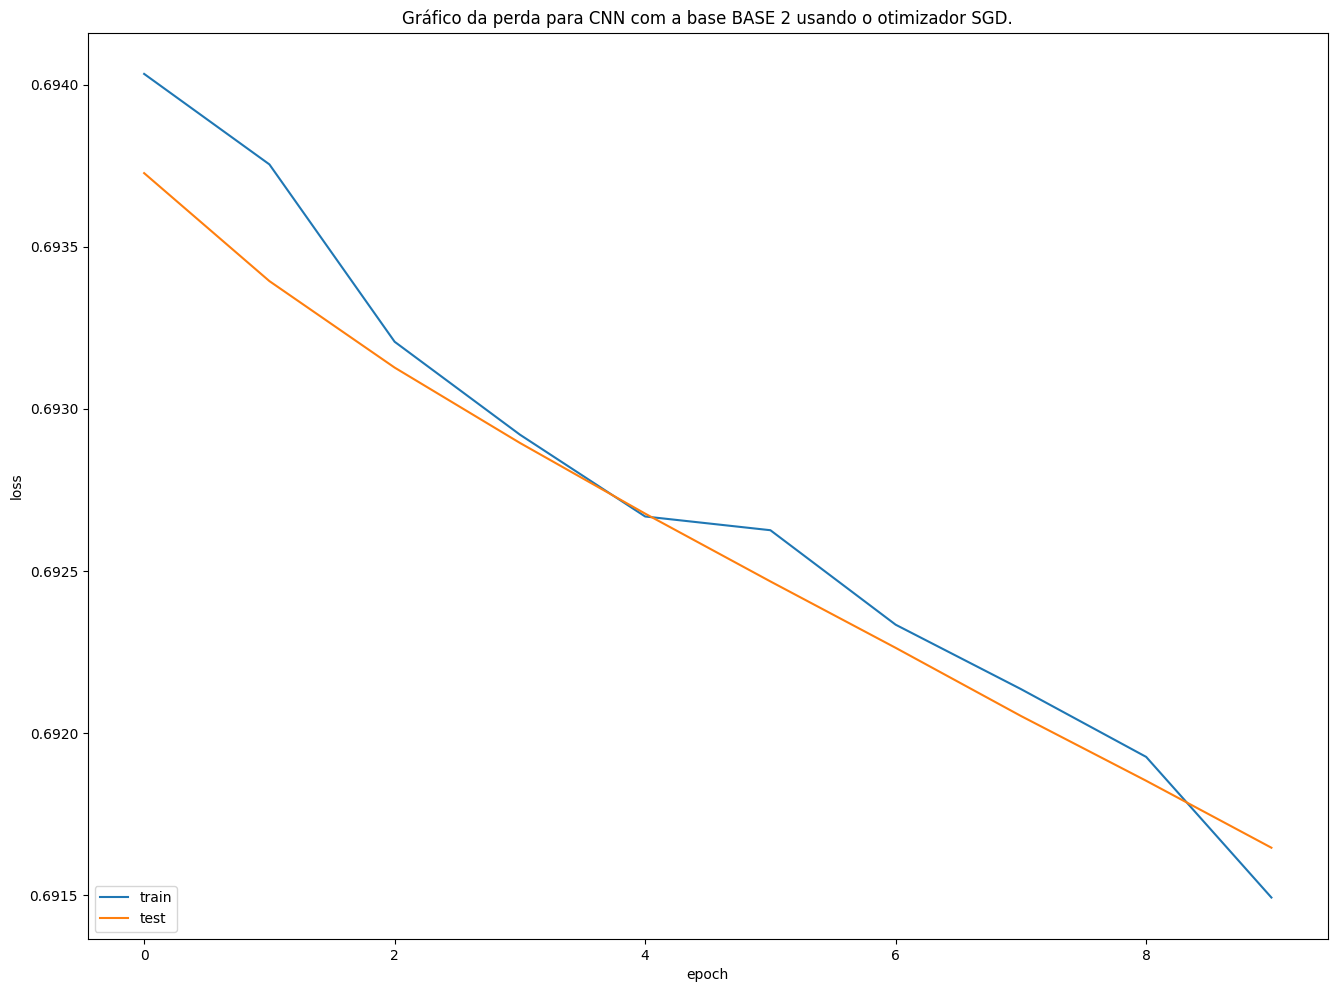

In [ ]:
for train_resume, rede, base, otimizador  in zip(resultados.train_resume, resultados.rede, resultados.base, resultados.otimizador):
  plot_accuracy(json.loads(train_resume), rede, base, otimizador)
  plot_loss(json.loads(train_resume), rede, base, otimizador)

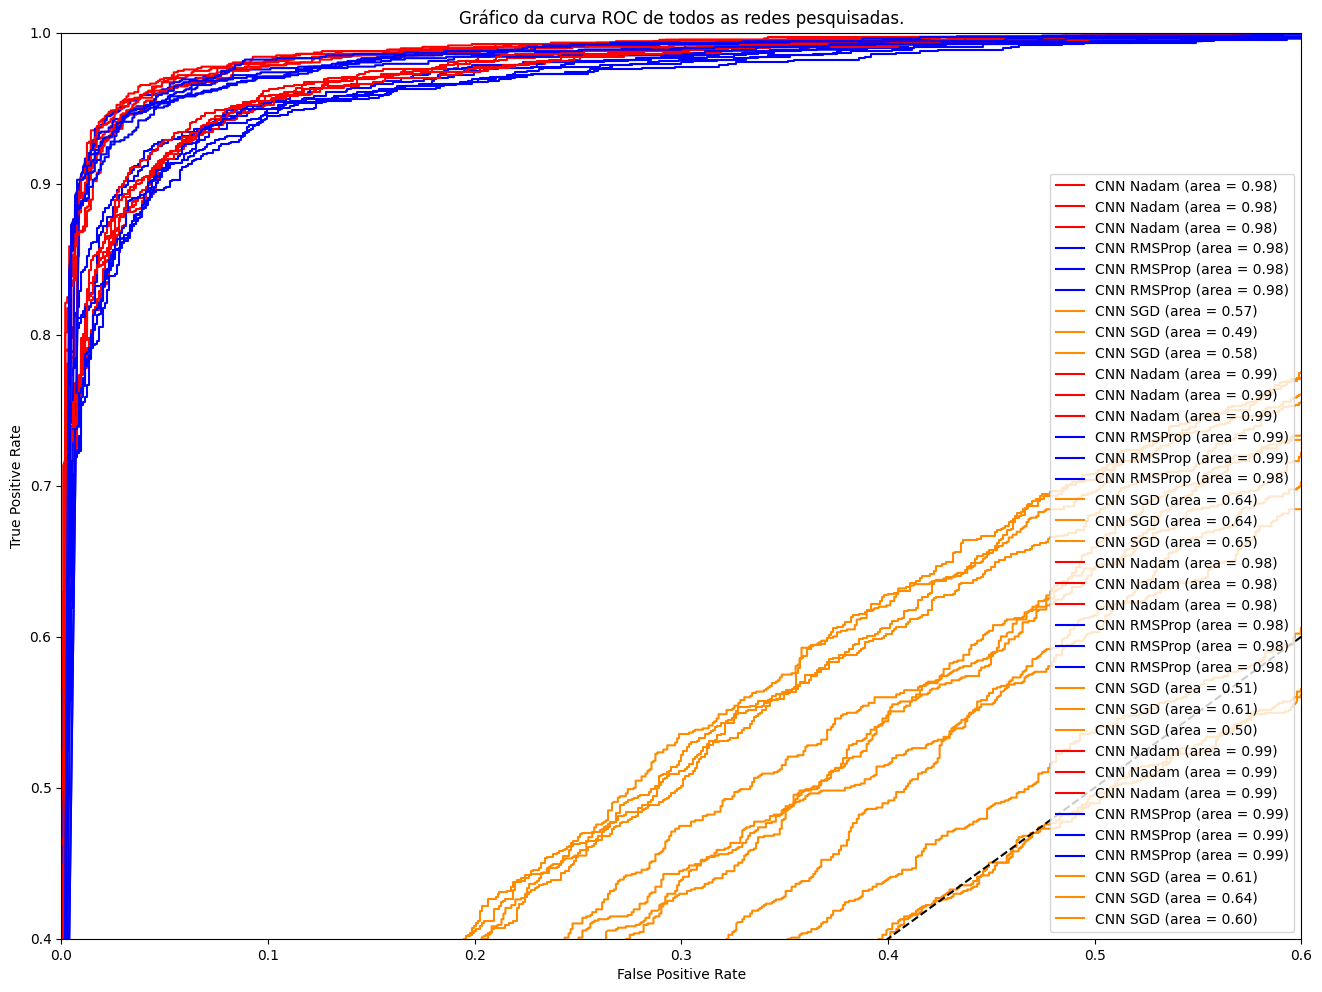

In [ ]:
roc_curve_list = []
for roc_curve, rede, otimizador  in zip(resultados.roc_curve, resultados.rede, resultados.otimizador):
  roc_curve = json.loads(roc_curve)
  roc_curve_list.append([roc_curve, rede, otimizador])

plot_roc_curve(roc_curve_list)

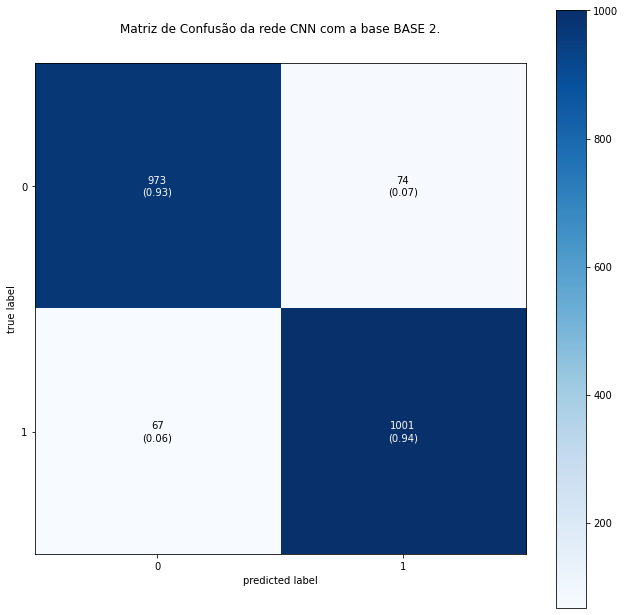

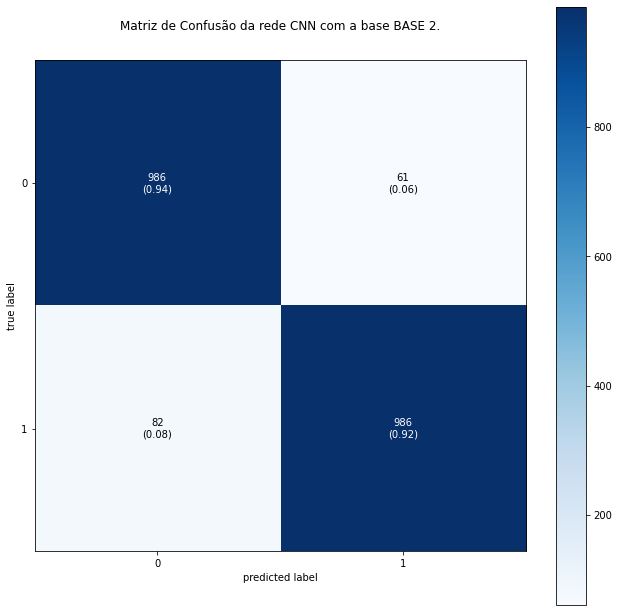

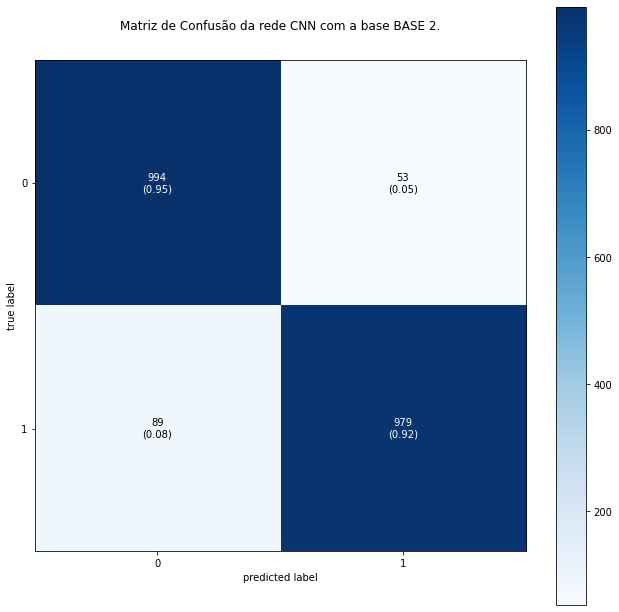

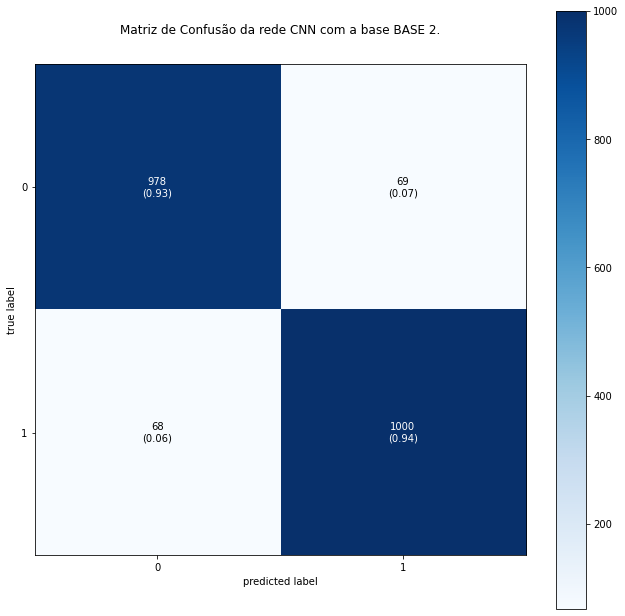

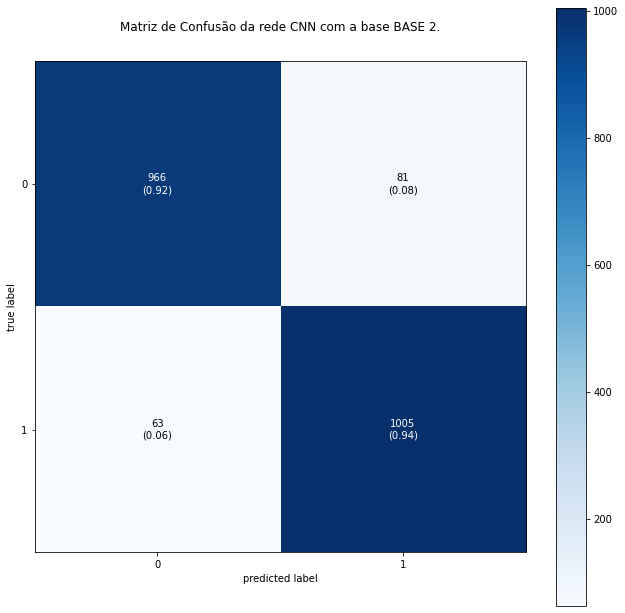

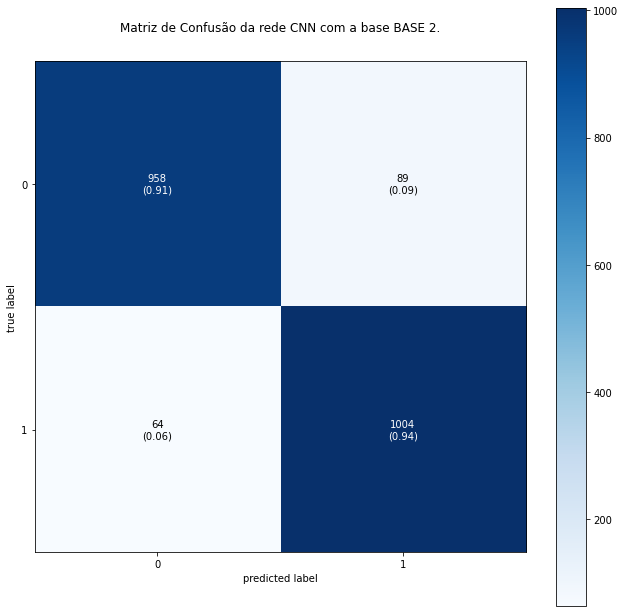

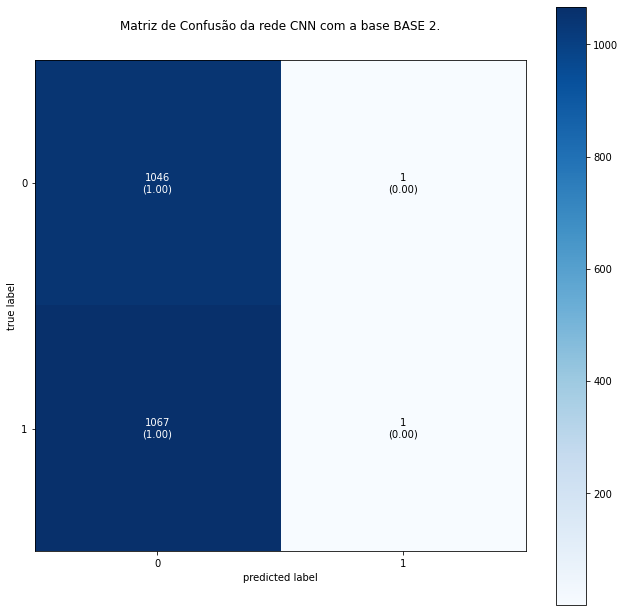

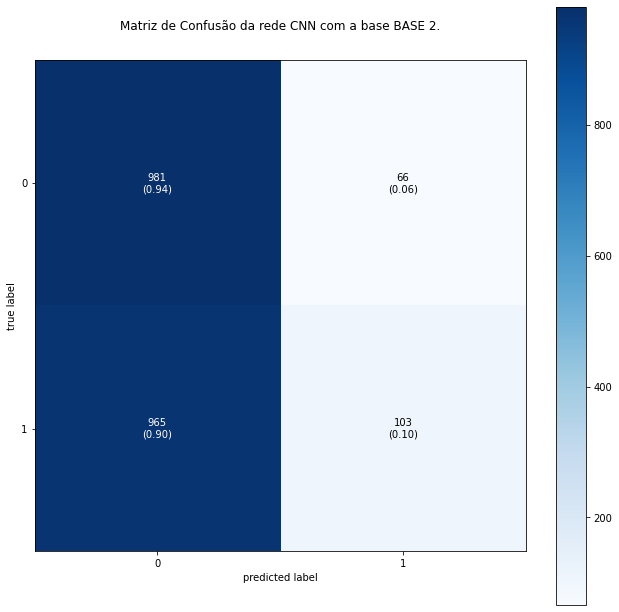

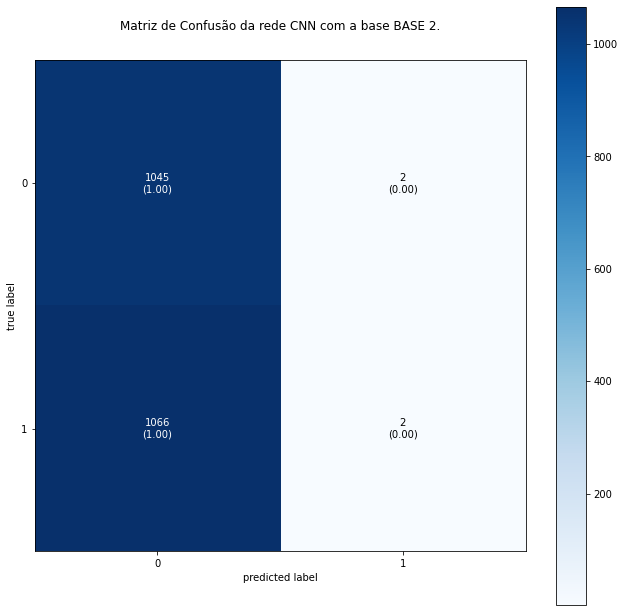

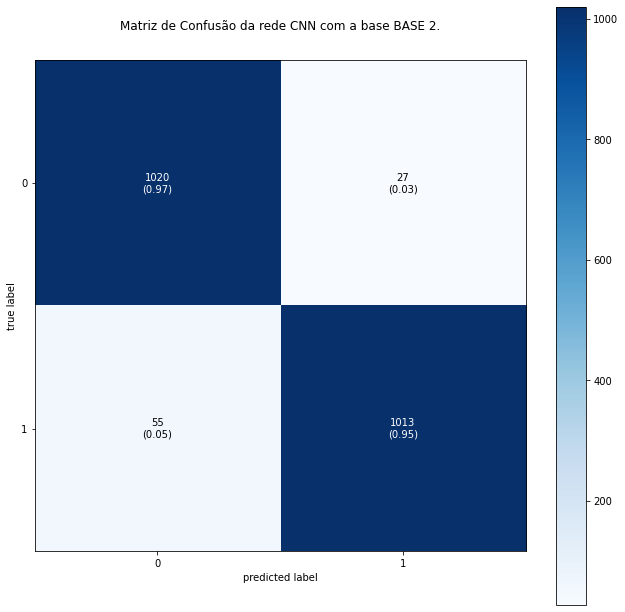

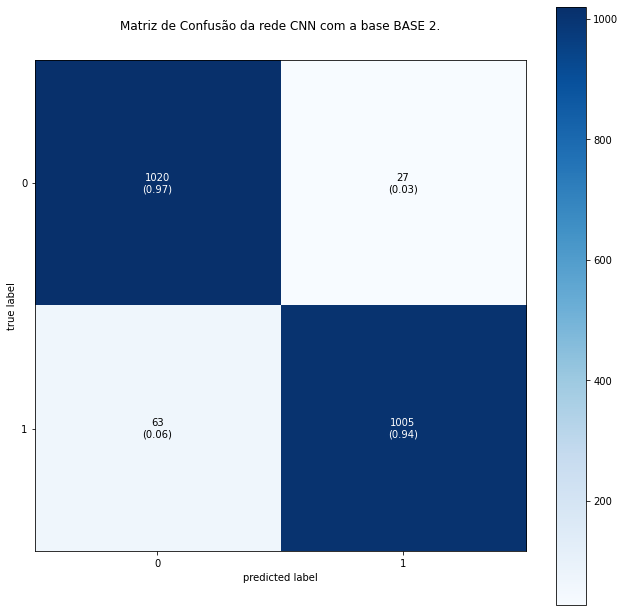

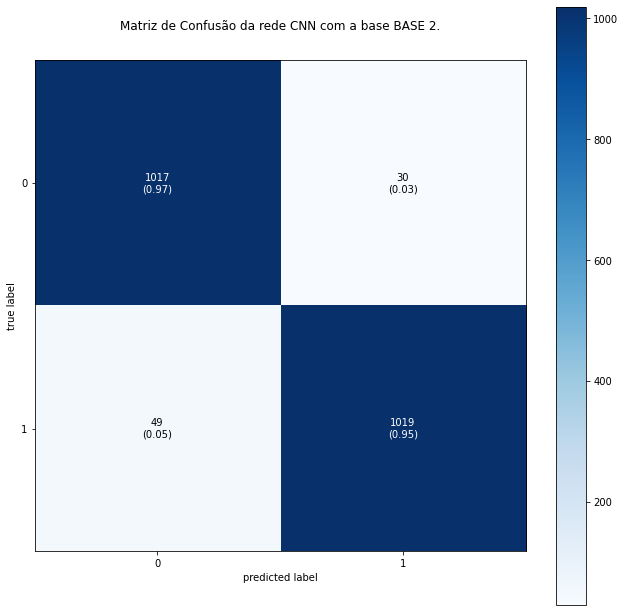

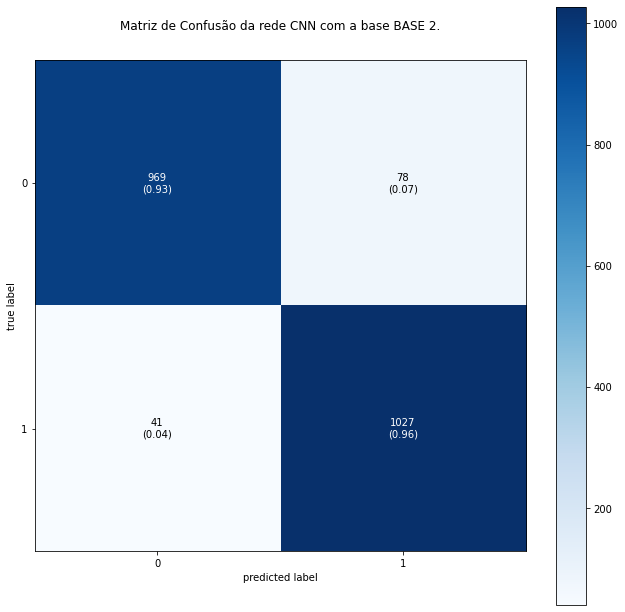

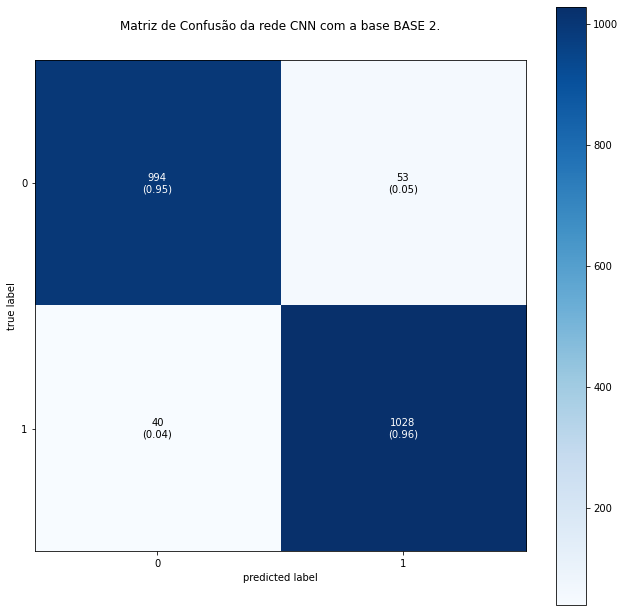

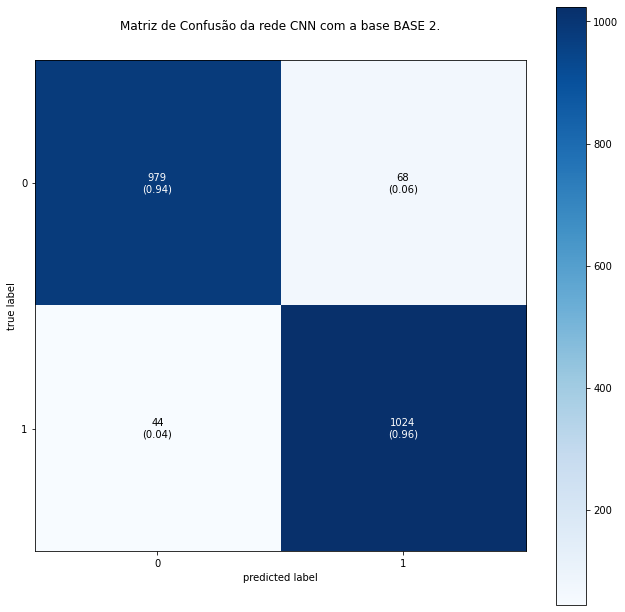

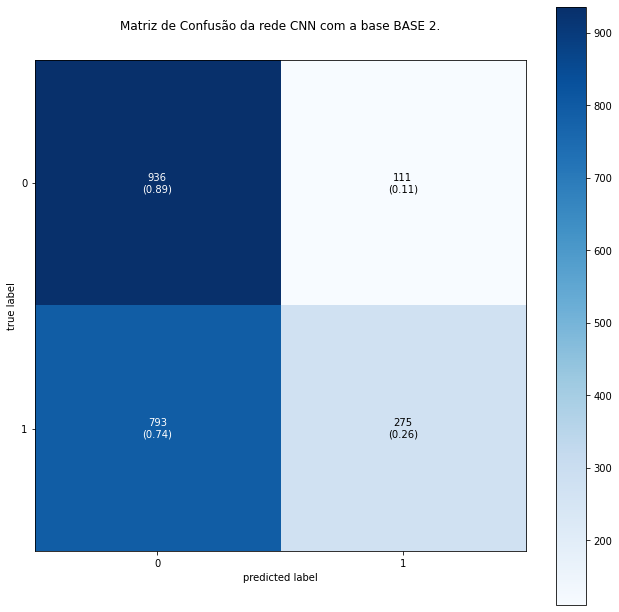

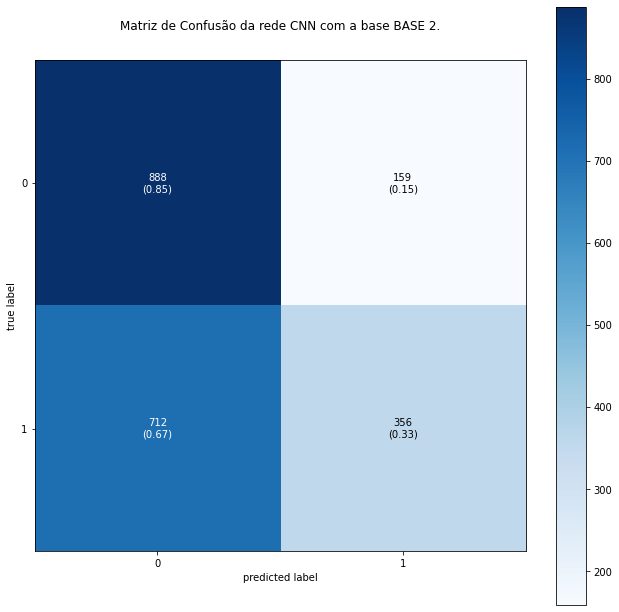

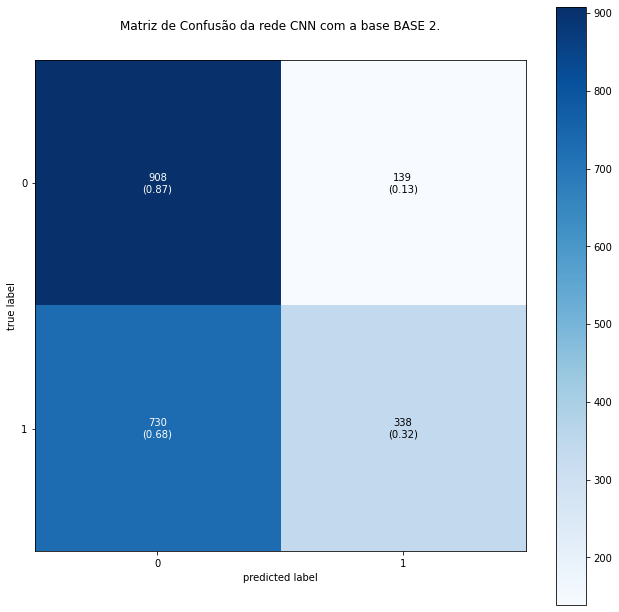

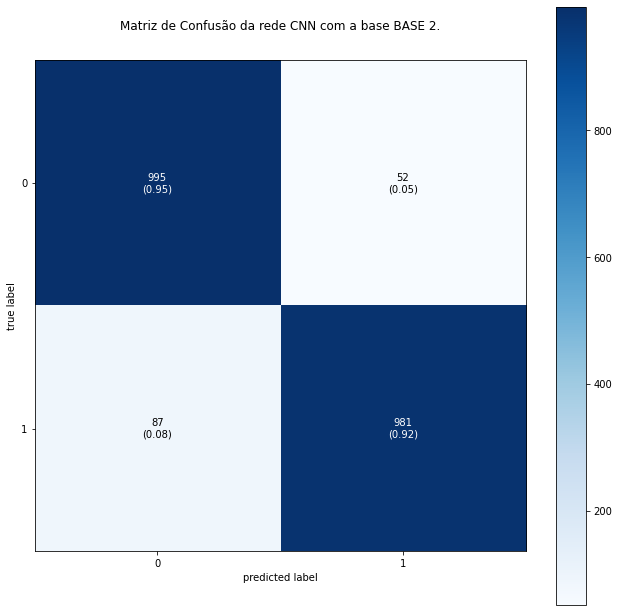

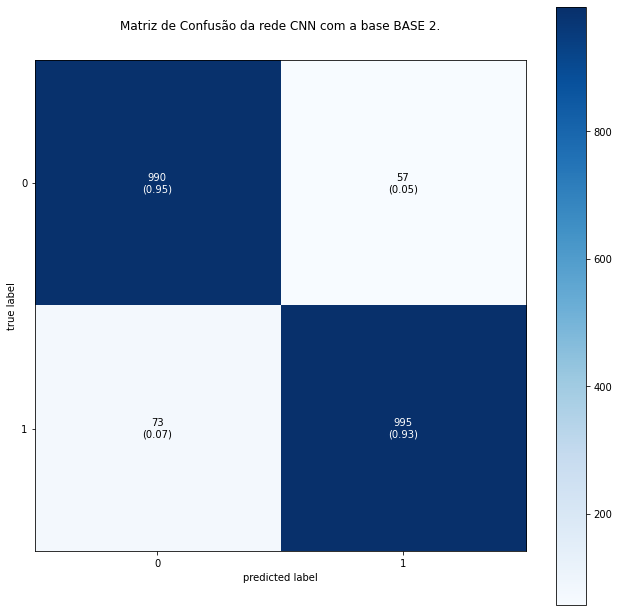

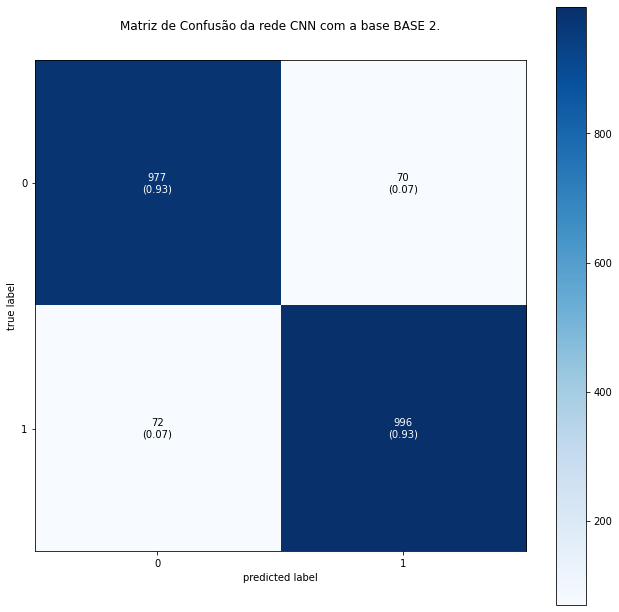

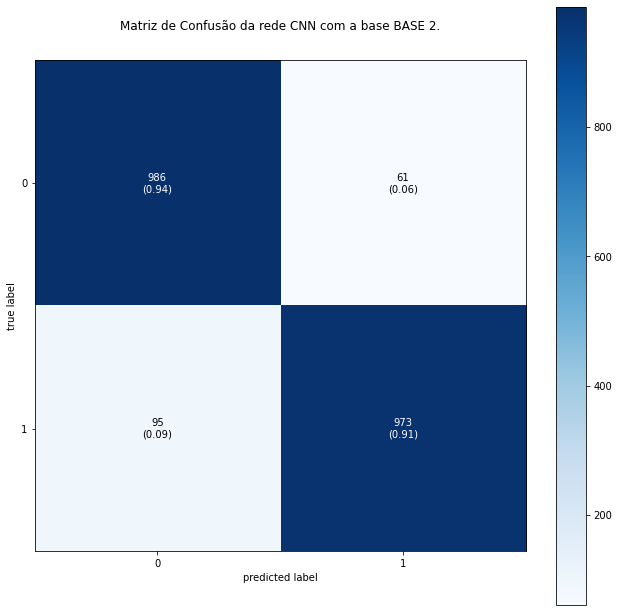

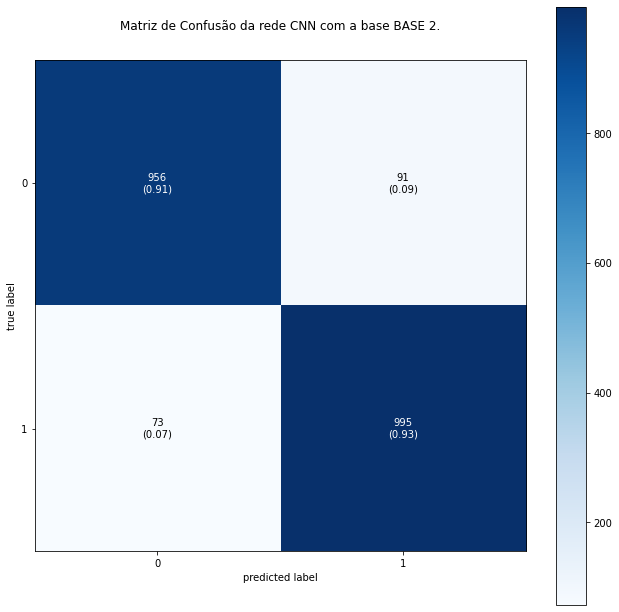

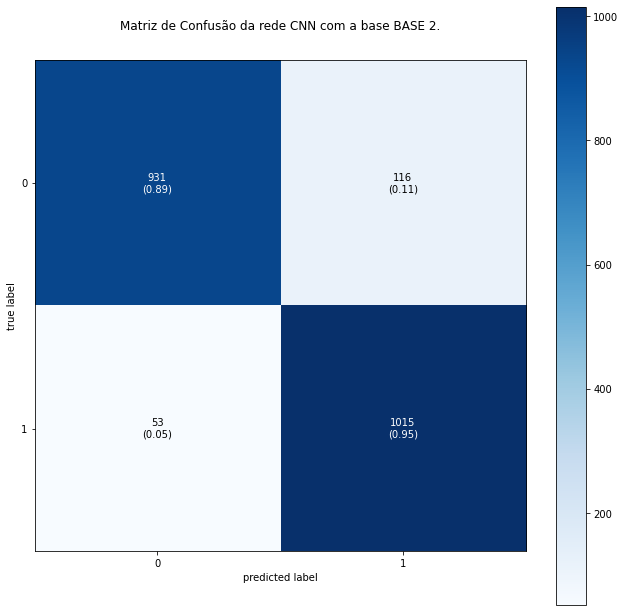

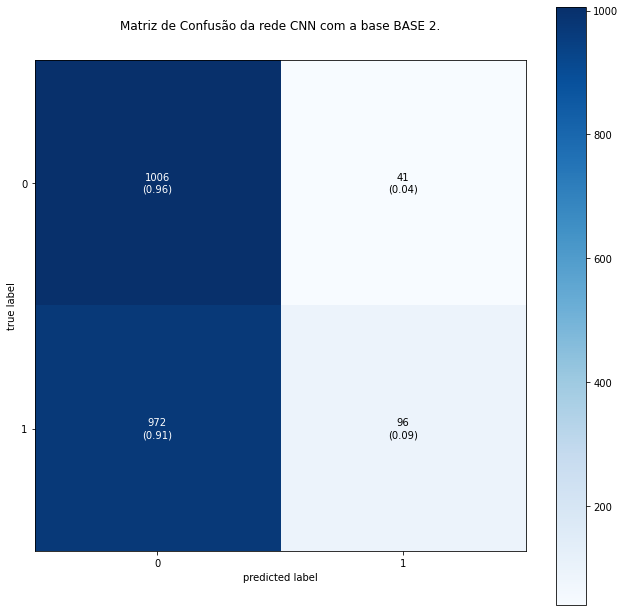

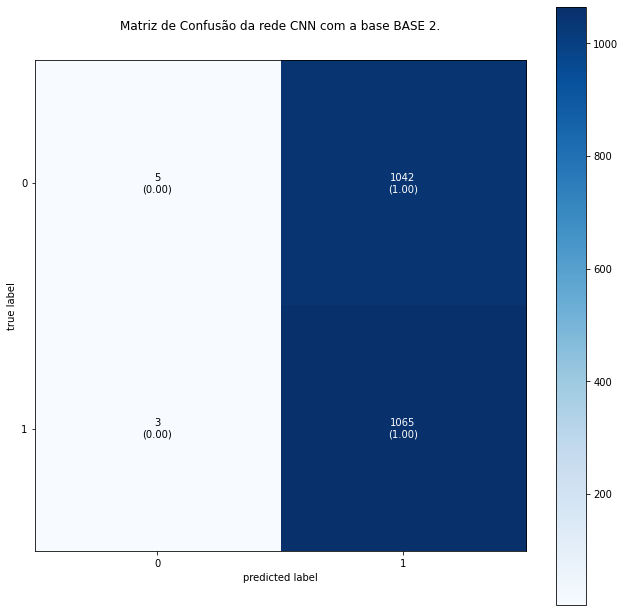

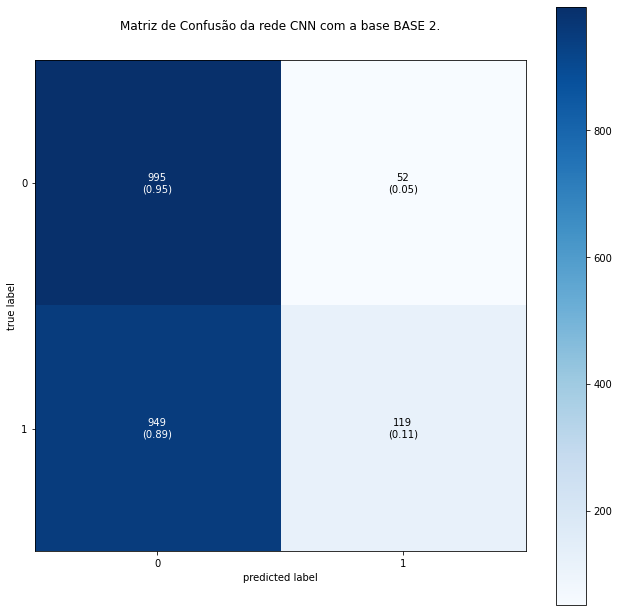

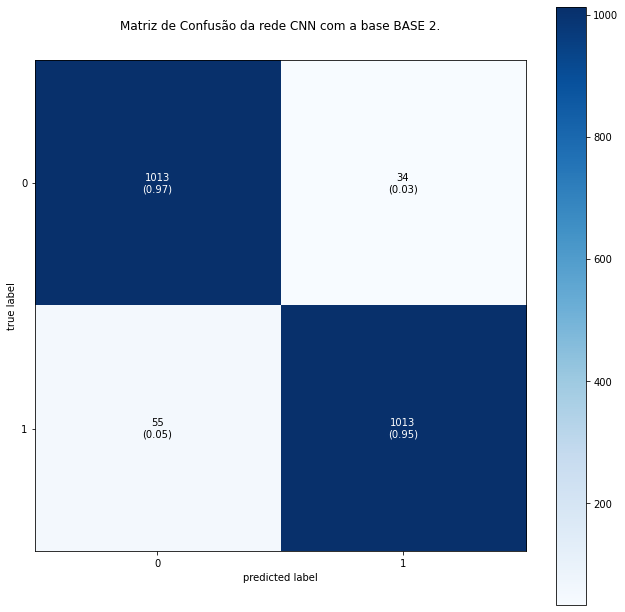

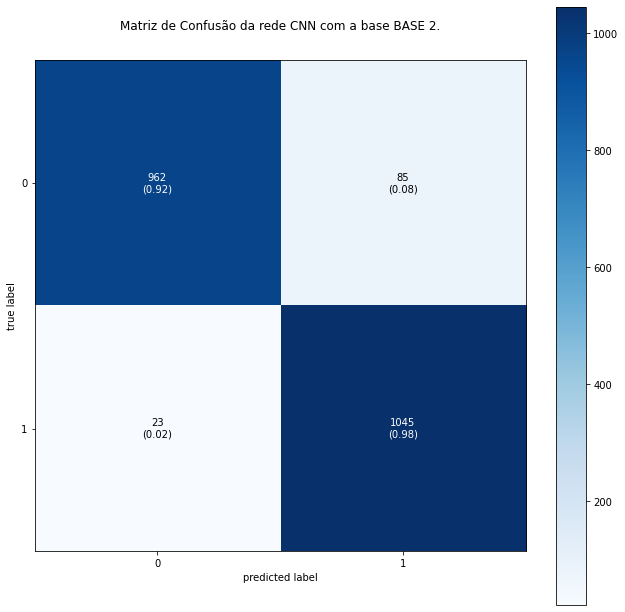

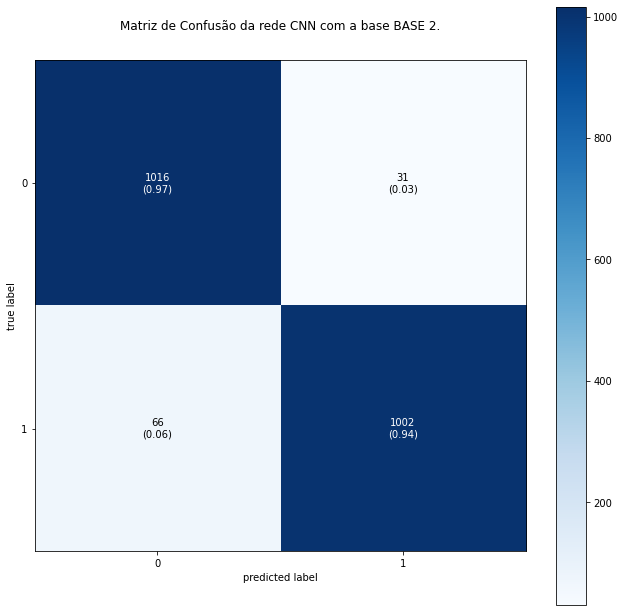

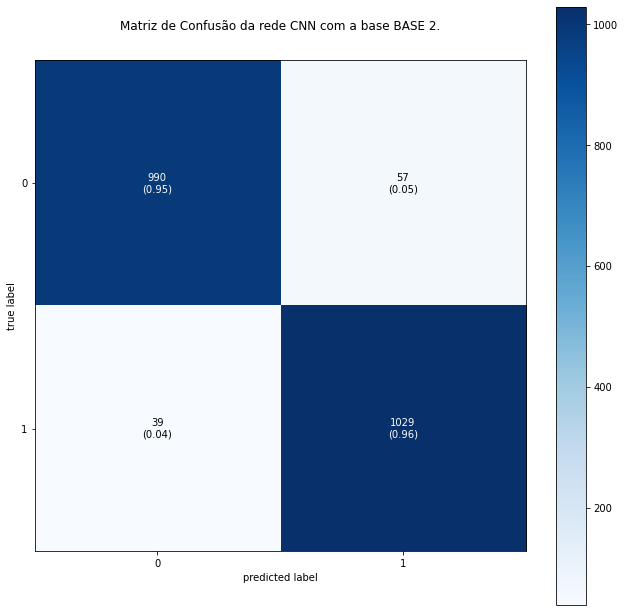

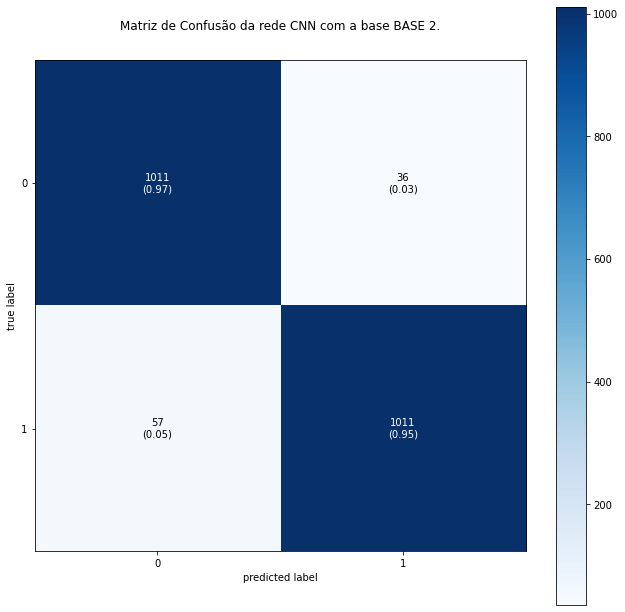

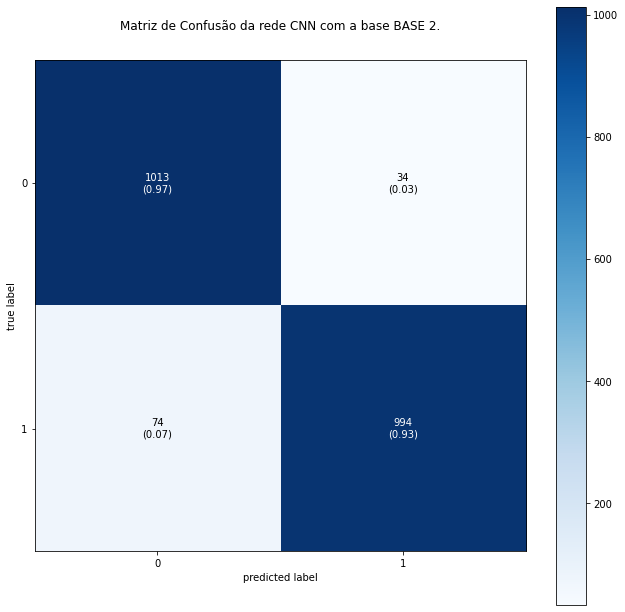

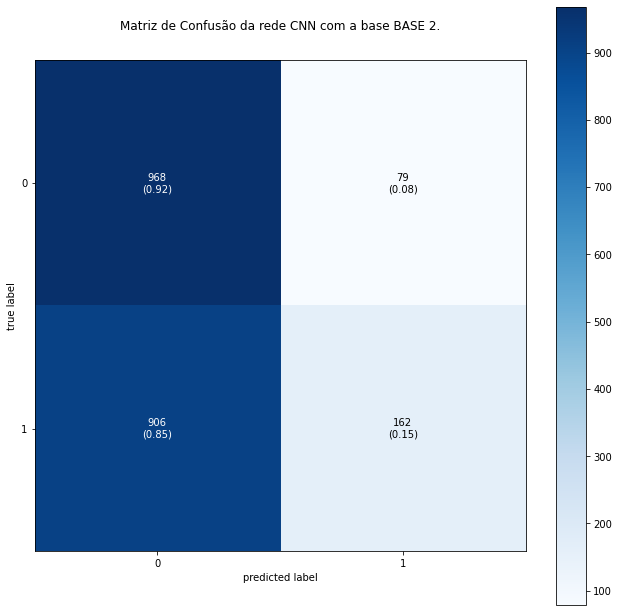

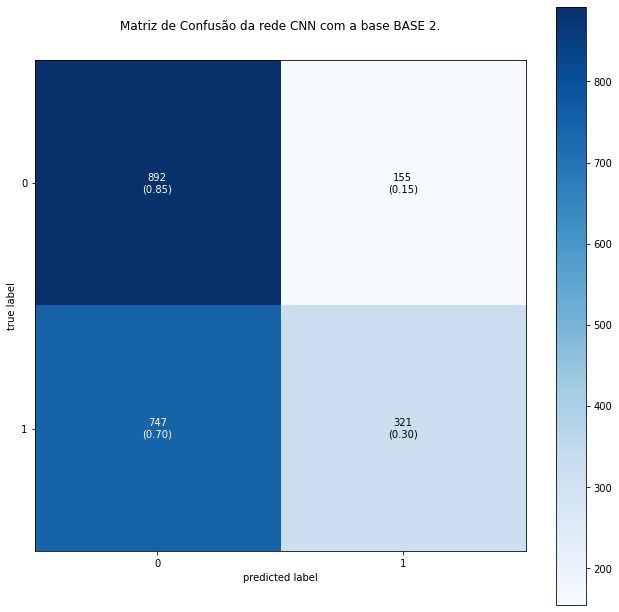

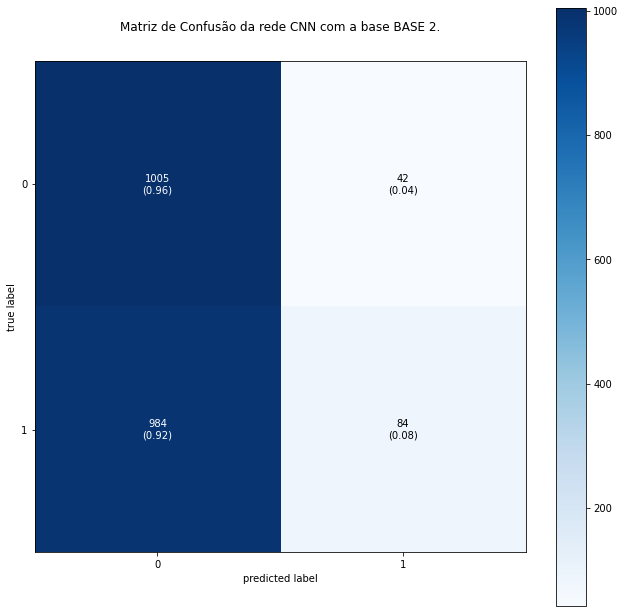

In [ ]:
for confusion_matrix, rede, base in zip(resultados.confusion_matrix, resultados.rede, resultados.base):
  confusion_matrix = json.loads(confusion_matrix)
  confusion_matrix = np.array([ [confusion_matrix["00"],confusion_matrix["01"]],
                                [confusion_matrix["10"],confusion_matrix["11"]] ])

  fig,ax = plot_confusion_matrix(figsize=(11, 11),
                                  conf_mat=confusion_matrix,
                                  colorbar=True,
                                  show_absolute=True,
                                  show_normed=True,
                                )
  plt.title('Matriz de Confusão da rede '+ rede + ' com a base '+ base + '.') 
  plt.show()

In [ ]:
# Tabela 1 - Todas Iterações (apendice)
# Tabela 2 - Melhores valores por Rede*Base (Resultados/conclusão)
# Tabela 3 - Medias das iterações por rede*base*otmizador (apendice)